## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Stem_bark_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Stem_bark_t_ha                                                    \
                    count       mean        std  min     25%    50%     75%   
Species_ID                                                                    
0                   371.0   7.894070   4.128113  0.3   4.900   7.70  10.350   
1                     7.0  34.728571  23.382095  8.3  13.950  35.70  52.750   
2                   120.0  11.320000   7.552123  0.8   6.375   9.45  15.250   
3                   115.0  15.307826   8.294197  2.1   7.950  15.30  21.450   
4                    66.0  11.296970   6.528234  1.6   6.500   9.25  16.575   
5                    68.0  29.010294  12.702287  2.5  18.400  29.70  39.675   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           23.2         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           65.7           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           38.8         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           41.1         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           28.7          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           48.8          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Stem_bark_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
10            5        0.0  18.2    19.6        18.3     159.0          101.8   
11            1        0.0   8.8     5.2        15.5     105.0           46.3   
12            1        0.0  10.2     6.7        16.2     122.0           54.1   
13            1        0.0  14.1    10.0        19.9     194.0           87.2   
14            1        0.0  19.4    15.9        26.8     299.0          133.9   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
10,5,0.0,18.2,19.6,18.3
11,1,0.0,8.8,5.2,15.5
12,1,0.0,10.2,6.7,16.2
13,1,0.0,14.1,10.0,19.9
14,1,0.0,19.4,15.9,26.8


In [11]:
# Columns in "y" data collections
y.head()

,LN_Stem_bark_t_ha
10,2.80
11,2.12
12,2.21
13,2.93
14,3.58


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8367640262858926, 0.8491886705423367, 0.835568587666086]
    Mean: 0.841
    Std: 0.006

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.30532681 0.35030148 0.31592365]
    Mean: 0.324
    Std: 0.019

 --------------------
Mean absolute error (MAE): 

    Scores: [0.22085788453678526, 0.21230154037954338, 0.23084119429609862]
    Mean: 0.221
    Std: 0.008

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8942960625751492                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.27892087021094436                # gamma
print('Gamma: ' + str(p2))

p3 = 0.11832141467878397                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 197         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7296434500976409                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8942960625751492
Gamma: 0.27892087021094436
Learning_rate: 0.11832141467878397
Max_depth: 3
N_estimators: 197
Subsample: 0.7296434500976409


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.68530	validation_1-rmse:1.63271


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50506	validation_1-rmse:1.45589
[2]	validation_0-rmse:1.34216	validation_1-rmse:1.29850
[3]	validation_0-rmse:1.19873	validation_1-rmse:1.16377
[4]	validation_0-rmse:1.07332	validation_1-rmse:1.04248
[5]	validation_0-rmse:0.96614	validation_1-rmse:0.94256
[6]	validation_0-rmse:0.86655	validation_1-rmse:0.84691
[7]	validation_0-rmse:0.78030	validation_1-rmse:0.76313
[8]	validation_0-rmse:0.70588	validation_1-rmse:0.69438
[9]	validation_0-rmse:0.64222	validation_1-rmse:0.63247
[10]	validation_0-rmse:0.58747	validation_1-rmse:0.58118
[11]	validation_0-rmse:0.54084	validation_1-rmse:0.53571
[12]	validation_0-rmse:0.49873	validation_1-rmse:0.49554
[13]	validation_0-rmse:0.46089	validation_1-rmse:0.46177
[14]	validation_0-rmse:0.43227	validation_1-rmse:0.43546
[15]	validation_0-rmse:0.40670	validation_1-rmse:0.41322
[16]	validation_0-rmse:0.38551	validation_1-rmse:0.39396
[17]	validation_0-rmse:0.36758	validation_1-rmse:0.37763
[18]	validation_0-rmse:0.35083	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67227	validation_1-rmse:1.68461


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49054	validation_1-rmse:1.50801
[2]	validation_0-rmse:1.32857	validation_1-rmse:1.34629
[3]	validation_0-rmse:1.18627	validation_1-rmse:1.20107
[4]	validation_0-rmse:1.06393	validation_1-rmse:1.07866
[5]	validation_0-rmse:0.95507	validation_1-rmse:0.97277
[6]	validation_0-rmse:0.86207	validation_1-rmse:0.88241
[7]	validation_0-rmse:0.77709	validation_1-rmse:0.79797
[8]	validation_0-rmse:0.70313	validation_1-rmse:0.72528
[9]	validation_0-rmse:0.64089	validation_1-rmse:0.66472
[10]	validation_0-rmse:0.58688	validation_1-rmse:0.61117
[11]	validation_0-rmse:0.54040	validation_1-rmse:0.56637
[12]	validation_0-rmse:0.49827	validation_1-rmse:0.52465
[13]	validation_0-rmse:0.46160	validation_1-rmse:0.48884
[14]	validation_0-rmse:0.43355	validation_1-rmse:0.46286
[15]	validation_0-rmse:0.40828	validation_1-rmse:0.43933
[16]	validation_0-rmse:0.38469	validation_1-rmse:0.41859
[17]	validation_0-rmse:0.36728	validation_1-rmse:0.40187
[18]	validation_0-rmse:0.35178	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66443	validation_1-rmse:1.70854
[1]	validation_0-rmse:1.48641	validation_1-rmse:1.53353


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32711	validation_1-rmse:1.37343
[3]	validation_0-rmse:1.18716	validation_1-rmse:1.23718
[4]	validation_0-rmse:1.06557	validation_1-rmse:1.11985
[5]	validation_0-rmse:0.95774	validation_1-rmse:1.01131
[6]	validation_0-rmse:0.86191	validation_1-rmse:0.91510
[7]	validation_0-rmse:0.77674	validation_1-rmse:0.82879
[8]	validation_0-rmse:0.70218	validation_1-rmse:0.75216
[9]	validation_0-rmse:0.63997	validation_1-rmse:0.69079
[10]	validation_0-rmse:0.58526	validation_1-rmse:0.63725
[11]	validation_0-rmse:0.53984	validation_1-rmse:0.59352
[12]	validation_0-rmse:0.49991	validation_1-rmse:0.55341
[13]	validation_0-rmse:0.46376	validation_1-rmse:0.51771
[14]	validation_0-rmse:0.43431	validation_1-rmse:0.49020
[15]	validation_0-rmse:0.40804	validation_1-rmse:0.46234
[16]	validation_0-rmse:0.38464	validation_1-rmse:0.43669
[17]	validation_0-rmse:0.36815	validation_1-rmse:0.41929
[18]	validation_0-rmse:0.35128	validation_1-rmse:0.40129
[19]	validation_0-rmse:0.33722	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65883	validation_1-rmse:1.73457
[1]	validation_0-rmse:1.47617	validation_1-rmse:1.55160
[2]	validation_0-rmse:1.31764	validation_1-rmse:1.38974
[3]	validation_0-rmse:1.17348	validation_1-rmse:1.24174
[4]	validation_0-rmse:1.05059	validation_1-rmse:1.11182
[5]	validation_0-rmse:0.94450	validation_1-rmse:1.00669
[6]	validation_0-rmse:0.84841	validation_1-rmse:0.91129
[7]	validation_0-rmse:0.76694	validation_1-rmse:0.82353
[8]	validation_0-rmse:0.69460	validation_1-rmse:0.74806
[9]	validation_0-rmse:0.63325	validation_1-rmse:0.68828
[10]	validation_0-rmse:0.57922	validation_1-rmse:0.63395
[11]	validation_0-rmse:0.53371	validation_1-rmse:0.58957
[12]	validation_0-rmse:0.49045	validation_1-rmse:0.54586
[13]	validation_0-rmse:0.45517	validation_1-rmse:0.50941
[14]	validation_0-rmse:0.42667	validation_1-rmse:0.48197
[15]	validation_0-rmse:0.40050	validation_1-rmse:0.45559
[16]	validation_0-rmse:0.37806	validation_1-rmse:0.43328
[17]	validation_0-rmse:0.36060	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69132	validation_1-rmse:1.59791
[1]	validation_0-rmse:1.50623	validation_1-rmse:1.42396


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34195	validation_1-rmse:1.27182
[3]	validation_0-rmse:1.19735	validation_1-rmse:1.13417
[4]	validation_0-rmse:1.07245	validation_1-rmse:1.01443
[5]	validation_0-rmse:0.96442	validation_1-rmse:0.91482
[6]	validation_0-rmse:0.86752	validation_1-rmse:0.82332
[7]	validation_0-rmse:0.78398	validation_1-rmse:0.74337
[8]	validation_0-rmse:0.71206	validation_1-rmse:0.67579
[9]	validation_0-rmse:0.65053	validation_1-rmse:0.61567
[10]	validation_0-rmse:0.59584	validation_1-rmse:0.56515
[11]	validation_0-rmse:0.54850	validation_1-rmse:0.51903
[12]	validation_0-rmse:0.50607	validation_1-rmse:0.47857
[13]	validation_0-rmse:0.47033	validation_1-rmse:0.44660
[14]	validation_0-rmse:0.44042	validation_1-rmse:0.41822
[15]	validation_0-rmse:0.41182	validation_1-rmse:0.39425
[16]	validation_0-rmse:0.38884	validation_1-rmse:0.37489
[17]	validation_0-rmse:0.37247	validation_1-rmse:0.36079
[18]	validation_0-rmse:0.35748	validation_1-rmse:0.34580
[19]	validation_0-rmse:0.34372	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68913	validation_1-rmse:1.61285
[1]	validation_0-rmse:1.50437	validation_1-rmse:1.43685
[2]	validation_0-rmse:1.34237	validation_1-rmse:1.28378
[3]	validation_0-rmse:1.19998	validation_1-rmse:1.15129
[4]	validation_0-rmse:1.07642	validation_1-rmse:1.03281
[5]	validation_0-rmse:0.96623	validation_1-rmse:0.92734
[6]	validation_0-rmse:0.86716	validation_1-rmse:0.83681
[7]	validation_0-rmse:0.78298	validation_1-rmse:0.75701
[8]	validation_0-rmse:0.70974	validation_1-rmse:0.68615
[9]	validation_0-rmse:0.64683	validation_1-rmse:0.62614
[10]	validation_0-rmse:0.59258	validation_1-rmse:0.57255
[11]	validation_0-rmse:0.54421	validation_1-rmse:0.52591
[12]	validation_0-rmse:0.50135	validation_1-rmse:0.48644
[13]	validation_0-rmse:0.46659	validation_1-rmse:0.45498
[14]	validation_0-rmse:0.43819	validation_1-rmse:0.42818
[15]	validation_0-rmse:0.41258	validation_1-rmse:0.40472
[16]	validation_0-rmse:0.39076	validation_1-rmse:0.38577
[17]	validation_0-rmse:0.37317	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64005	validation_1-rmse:1.79844
[1]	validation_0-rmse:1.46157	validation_1-rmse:1.60417
[2]	validation_0-rmse:1.30579	validation_1-rmse:1.43594
[3]	validation_0-rmse:1.16472	validation_1-rmse:1.28479
[4]	validation_0-rmse:1.04322	validation_1-rmse:1.15448
[5]	validation_0-rmse:0.94013	validation_1-rmse:1.04291
[6]	validation_0-rmse:0.84524	validation_1-rmse:0.93815
[7]	validation_0-rmse:0.76203	validation_1-rmse:0.84713
[8]	validation_0-rmse:0.69097	validation_1-rmse:0.77434
[9]	validation_0-rmse:0.63038	validation_1-rmse:0.71165
[10]	validation_0-rmse:0.57722	validation_1-rmse:0.65523
[11]	validation_0-rmse:0.53135	validation_1-rmse:0.60686
[12]	validation_0-rmse:0.48885	validation_1-rmse:0.55862
[13]	validation_0-rmse:0.45351	validation_1-rmse:0.52075
[14]	validation_0-rmse:0.42562	validation_1-rmse:0.49246
[15]	validation_0-rmse:0.40077	validation_1-rmse:0.46475
[16]	validation_0-rmse:0.37882	validation_1-rmse:0.44150
[17]	validation_0-rmse:0.36026	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69213	validation_1-rmse:1.60918
[1]	validation_0-rmse:1.50659	validation_1-rmse:1.43102
[2]	validation_0-rmse:1.34277	validation_1-rmse:1.27379
[3]	validation_0-rmse:1.19833	validation_1-rmse:1.14166
[4]	validation_0-rmse:1.07181	validation_1-rmse:1.01972
[5]	validation_0-rmse:0.96270	validation_1-rmse:0.91460
[6]	validation_0-rmse:0.86371	validation_1-rmse:0.82093
[7]	validation_0-rmse:0.77900	validation_1-rmse:0.74448
[8]	validation_0-rmse:0.70488	validation_1-rmse:0.67526
[9]	validation_0-rmse:0.64067	validation_1-rmse:0.61867
[10]	validation_0-rmse:0.58795	validation_1-rmse:0.57116
[11]	validation_0-rmse:0.53920	validation_1-rmse:0.53136
[12]	validation_0-rmse:0.49590	validation_1-rmse:0.49455
[13]	validation_0-rmse:0.45815	validation_1-rmse:0.46183
[14]	validation_0-rmse:0.43005	validation_1-rmse:0.43963
[15]	validation_0-rmse:0.40334	validation_1-rmse:0.41862
[16]	validation_0-rmse:0.38303	validation_1-rmse:0.40132
[17]	validation_0-rmse:0.36551	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67260	validation_1-rmse:1.69386


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48879	validation_1-rmse:1.50541
[2]	validation_0-rmse:1.32996	validation_1-rmse:1.35587
[3]	validation_0-rmse:1.18760	validation_1-rmse:1.21309
[4]	validation_0-rmse:1.06652	validation_1-rmse:1.09329
[5]	validation_0-rmse:0.95782	validation_1-rmse:0.98441
[6]	validation_0-rmse:0.85963	validation_1-rmse:0.88176
[7]	validation_0-rmse:0.77655	validation_1-rmse:0.80051
[8]	validation_0-rmse:0.70109	validation_1-rmse:0.72462
[9]	validation_0-rmse:0.63764	validation_1-rmse:0.66334
[10]	validation_0-rmse:0.58338	validation_1-rmse:0.61251
[11]	validation_0-rmse:0.53686	validation_1-rmse:0.56852
[12]	validation_0-rmse:0.49202	validation_1-rmse:0.52496
[13]	validation_0-rmse:0.45591	validation_1-rmse:0.49081
[14]	validation_0-rmse:0.42753	validation_1-rmse:0.46515
[15]	validation_0-rmse:0.39980	validation_1-rmse:0.43889
[16]	validation_0-rmse:0.37742	validation_1-rmse:0.41997
[17]	validation_0-rmse:0.36002	validation_1-rmse:0.40638
[18]	validation_0-rmse:0.34419	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67589	validation_1-rmse:1.69174
[1]	validation_0-rmse:1.49495	validation_1-rmse:1.51415
[2]	validation_0-rmse:1.33290	validation_1-rmse:1.35583
[3]	validation_0-rmse:1.19154	validation_1-rmse:1.21461
[4]	validation_0-rmse:1.06501	validation_1-rmse:1.08651
[5]	validation_0-rmse:0.95564	validation_1-rmse:0.97911
[6]	validation_0-rmse:0.85945	validation_1-rmse:0.88632
[7]	validation_0-rmse:0.77519	validation_1-rmse:0.80671
[8]	validation_0-rmse:0.70295	validation_1-rmse:0.73585
[9]	validation_0-rmse:0.63983	validation_1-rmse:0.67586
[10]	validation_0-rmse:0.58780	validation_1-rmse:0.62664
[11]	validation_0-rmse:0.54151	validation_1-rmse:0.58326
[12]	validation_0-rmse:0.49861	validation_1-rmse:0.54342
[13]	validation_0-rmse:0.46198	validation_1-rmse:0.50828
[14]	validation_0-rmse:0.43245	validation_1-rmse:0.48015
[15]	validation_0-rmse:0.40644	validation_1-rmse:0.45754
[16]	validation_0-rmse:0.38236	validation_1-rmse:0.43408
[17]	validation_0-rmse:0.36567	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68570	validation_1-rmse:1.63045
[1]	validation_0-rmse:1.49994	validation_1-rmse:1.45333
[2]	validation_0-rmse:1.33785	validation_1-rmse:1.29492
[3]	validation_0-rmse:1.19321	validation_1-rmse:1.15433
[4]	validation_0-rmse:1.06634	validation_1-rmse:1.03382
[5]	validation_0-rmse:0.95862	validation_1-rmse:0.93114
[6]	validation_0-rmse:0.86322	validation_1-rmse:0.84232
[7]	validation_0-rmse:0.77914	validation_1-rmse:0.76574
[8]	validation_0-rmse:0.70763	validation_1-rmse:0.69983
[9]	validation_0-rmse:0.64678	validation_1-rmse:0.64636
[10]	validation_0-rmse:0.59159	validation_1-rmse:0.59649
[11]	validation_0-rmse:0.54385	validation_1-rmse:0.55629
[12]	validation_0-rmse:0.49887	validation_1-rmse:0.51867
[13]	validation_0-rmse:0.46137	validation_1-rmse:0.49043
[14]	validation_0-rmse:0.43020	validation_1-rmse:0.46598
[15]	validation_0-rmse:0.40208	validation_1-rmse:0.44510
[16]	validation_0-rmse:0.37897	validation_1-rmse:0.42821
[17]	validation_0-rmse:0.35964	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66992	validation_1-rmse:1.70121
[1]	validation_0-rmse:1.48619	validation_1-rmse:1.52284
[2]	validation_0-rmse:1.32692	validation_1-rmse:1.36581
[3]	validation_0-rmse:1.18591	validation_1-rmse:1.22459
[4]	validation_0-rmse:1.06498	validation_1-rmse:1.10426
[5]	validation_0-rmse:0.95798	validation_1-rmse:0.99691
[6]	validation_0-rmse:0.86058	validation_1-rmse:0.90060
[7]	validation_0-rmse:0.77917	validation_1-rmse:0.82305


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70442	validation_1-rmse:0.75073
[9]	validation_0-rmse:0.64303	validation_1-rmse:0.69014
[10]	validation_0-rmse:0.58838	validation_1-rmse:0.63713
[11]	validation_0-rmse:0.54305	validation_1-rmse:0.59229
[12]	validation_0-rmse:0.49963	validation_1-rmse:0.54829
[13]	validation_0-rmse:0.46192	validation_1-rmse:0.51082
[14]	validation_0-rmse:0.43350	validation_1-rmse:0.48351
[15]	validation_0-rmse:0.40658	validation_1-rmse:0.45675
[16]	validation_0-rmse:0.38465	validation_1-rmse:0.43337
[17]	validation_0-rmse:0.36746	validation_1-rmse:0.41644
[18]	validation_0-rmse:0.35049	validation_1-rmse:0.39880
[19]	validation_0-rmse:0.33800	validation_1-rmse:0.38538
[20]	validation_0-rmse:0.32788	validation_1-rmse:0.37546
[21]	validation_0-rmse:0.31868	validation_1-rmse:0.36600
[22]	validation_0-rmse:0.31023	validation_1-rmse:0.35880
[23]	validation_0-rmse:0.30348	validation_1-rmse:0.35294
[24]	validation_0-rmse:0.29792	validation_1-rmse:0.34698
[25]	validation_0-rmse:0.29221	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68351	validation_1-rmse:1.64691
[1]	validation_0-rmse:1.50129	validation_1-rmse:1.47116
[2]	validation_0-rmse:1.33988	validation_1-rmse:1.31355
[3]	validation_0-rmse:1.19449	validation_1-rmse:1.17352
[4]	validation_0-rmse:1.07138	validation_1-rmse:1.05611
[5]	validation_0-rmse:0.96322	validation_1-rmse:0.95618


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.86433	validation_1-rmse:0.85909
[7]	validation_0-rmse:0.78093	validation_1-rmse:0.77816
[8]	validation_0-rmse:0.70497	validation_1-rmse:0.70364
[9]	validation_0-rmse:0.64332	validation_1-rmse:0.64642
[10]	validation_0-rmse:0.59011	validation_1-rmse:0.59629
[11]	validation_0-rmse:0.54363	validation_1-rmse:0.55301
[12]	validation_0-rmse:0.50326	validation_1-rmse:0.51488
[13]	validation_0-rmse:0.46864	validation_1-rmse:0.48011
[14]	validation_0-rmse:0.43900	validation_1-rmse:0.45298
[15]	validation_0-rmse:0.41425	validation_1-rmse:0.43168
[16]	validation_0-rmse:0.39041	validation_1-rmse:0.40932
[17]	validation_0-rmse:0.37304	validation_1-rmse:0.39365
[18]	validation_0-rmse:0.35640	validation_1-rmse:0.37928
[19]	validation_0-rmse:0.34304	validation_1-rmse:0.36650
[20]	validation_0-rmse:0.33165	validation_1-rmse:0.35630
[21]	validation_0-rmse:0.32224	validation_1-rmse:0.34858
[22]	validation_0-rmse:0.31425	validation_1-rmse:0.34058
[23]	validation_0-rmse:0.30782	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66491	validation_1-rmse:1.71378
[1]	validation_0-rmse:1.48335	validation_1-rmse:1.53002
[2]	validation_0-rmse:1.32212	validation_1-rmse:1.36748
[3]	validation_0-rmse:1.18274	validation_1-rmse:1.22820
[4]	validation_0-rmse:1.05735	validation_1-rmse:1.10072
[5]	validation_0-rmse:0.95232	validation_1-rmse:0.99458


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85796	validation_1-rmse:0.90072
[7]	validation_0-rmse:0.77420	validation_1-rmse:0.81525
[8]	validation_0-rmse:0.70262	validation_1-rmse:0.74207
[9]	validation_0-rmse:0.63922	validation_1-rmse:0.68096
[10]	validation_0-rmse:0.58577	validation_1-rmse:0.62772
[11]	validation_0-rmse:0.54050	validation_1-rmse:0.58005
[12]	validation_0-rmse:0.49741	validation_1-rmse:0.53693
[13]	validation_0-rmse:0.46201	validation_1-rmse:0.49879
[14]	validation_0-rmse:0.43441	validation_1-rmse:0.46958
[15]	validation_0-rmse:0.40606	validation_1-rmse:0.43933
[16]	validation_0-rmse:0.38591	validation_1-rmse:0.41851
[17]	validation_0-rmse:0.36789	validation_1-rmse:0.39880
[18]	validation_0-rmse:0.35080	validation_1-rmse:0.38025
[19]	validation_0-rmse:0.33916	validation_1-rmse:0.36910
[20]	validation_0-rmse:0.32840	validation_1-rmse:0.35901
[21]	validation_0-rmse:0.31833	validation_1-rmse:0.34982
[22]	validation_0-rmse:0.31065	validation_1-rmse:0.34031
[23]	validation_0-rmse:0.30473	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67950	validation_1-rmse:1.65754
[1]	validation_0-rmse:1.49421	validation_1-rmse:1.46902
[2]	validation_0-rmse:1.33261	validation_1-rmse:1.30513
[3]	validation_0-rmse:1.18997	validation_1-rmse:1.16237
[4]	validation_0-rmse:1.06217	validation_1-rmse:1.03445
[5]	validation_0-rmse:0.95236	validation_1-rmse:0.92047
[6]	validation_0-rmse:0.85786	validation_1-rmse:0.82618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77287	validation_1-rmse:0.74405
[8]	validation_0-rmse:0.70102	validation_1-rmse:0.67337
[9]	validation_0-rmse:0.63815	validation_1-rmse:0.61356
[10]	validation_0-rmse:0.58358	validation_1-rmse:0.56238
[11]	validation_0-rmse:0.53531	validation_1-rmse:0.51836
[12]	validation_0-rmse:0.49192	validation_1-rmse:0.48151
[13]	validation_0-rmse:0.45582	validation_1-rmse:0.45077
[14]	validation_0-rmse:0.42550	validation_1-rmse:0.42812
[15]	validation_0-rmse:0.40046	validation_1-rmse:0.40847
[16]	validation_0-rmse:0.37834	validation_1-rmse:0.39222
[17]	validation_0-rmse:0.35939	validation_1-rmse:0.37866
[18]	validation_0-rmse:0.34283	validation_1-rmse:0.36864
[19]	validation_0-rmse:0.32907	validation_1-rmse:0.35986
[20]	validation_0-rmse:0.31730	validation_1-rmse:0.35270
[21]	validation_0-rmse:0.30742	validation_1-rmse:0.34631
[22]	validation_0-rmse:0.30028	validation_1-rmse:0.34334
[23]	validation_0-rmse:0.29430	validation_1-rmse:0.34214
[24]	validation_0-rmse:0.28883	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68124	validation_1-rmse:1.65600
[1]	validation_0-rmse:1.50016	validation_1-rmse:1.47891
[2]	validation_0-rmse:1.33756	validation_1-rmse:1.31825
[3]	validation_0-rmse:1.19529	validation_1-rmse:1.17806
[4]	validation_0-rmse:1.06852	validation_1-rmse:1.05432
[5]	validation_0-rmse:0.96117	validation_1-rmse:0.95151


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.86439	validation_1-rmse:0.85686
[7]	validation_0-rmse:0.77846	validation_1-rmse:0.77428
[8]	validation_0-rmse:0.70422	validation_1-rmse:0.70374
[9]	validation_0-rmse:0.64196	validation_1-rmse:0.64423
[10]	validation_0-rmse:0.58666	validation_1-rmse:0.59348
[11]	validation_0-rmse:0.53979	validation_1-rmse:0.55210
[12]	validation_0-rmse:0.49741	validation_1-rmse:0.51213
[13]	validation_0-rmse:0.46097	validation_1-rmse:0.48090
[14]	validation_0-rmse:0.42982	validation_1-rmse:0.45535
[15]	validation_0-rmse:0.40198	validation_1-rmse:0.43049
[16]	validation_0-rmse:0.37896	validation_1-rmse:0.41332
[17]	validation_0-rmse:0.36035	validation_1-rmse:0.39754
[18]	validation_0-rmse:0.34594	validation_1-rmse:0.38531
[19]	validation_0-rmse:0.33289	validation_1-rmse:0.37366
[20]	validation_0-rmse:0.32232	validation_1-rmse:0.36404
[21]	validation_0-rmse:0.31326	validation_1-rmse:0.35494
[22]	validation_0-rmse:0.30561	validation_1-rmse:0.34957
[23]	validation_0-rmse:0.29927	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68421	validation_1-rmse:1.63973
[1]	validation_0-rmse:1.49976	validation_1-rmse:1.46310
[2]	validation_0-rmse:1.33608	validation_1-rmse:1.31198
[3]	validation_0-rmse:1.19276	validation_1-rmse:1.17725
[4]	validation_0-rmse:1.06663	validation_1-rmse:1.05888
[5]	validation_0-rmse:0.95903	validation_1-rmse:0.95925
[6]	validation_0-rmse:0.86280	validation_1-rmse:0.86785
[7]	validation_0-rmse:0.77796	validation_1-rmse:0.78796
[8]	validation_0-rmse:0.70341	validation_1-rmse:0.71839
[9]	validation_0-rmse:0.64220	validation_1-rmse:0.65824
[10]	validation_0-rmse:0.58778	validation_1-rmse:0.60941


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.54144	validation_1-rmse:0.56471
[12]	validation_0-rmse:0.50105	validation_1-rmse:0.52605
[13]	validation_0-rmse:0.46305	validation_1-rmse:0.49248
[14]	validation_0-rmse:0.43360	validation_1-rmse:0.46450
[15]	validation_0-rmse:0.40854	validation_1-rmse:0.43953
[16]	validation_0-rmse:0.38531	validation_1-rmse:0.42069
[17]	validation_0-rmse:0.36680	validation_1-rmse:0.40533
[18]	validation_0-rmse:0.34957	validation_1-rmse:0.38930
[19]	validation_0-rmse:0.33541	validation_1-rmse:0.37669
[20]	validation_0-rmse:0.32467	validation_1-rmse:0.36825
[21]	validation_0-rmse:0.31516	validation_1-rmse:0.35958
[22]	validation_0-rmse:0.30756	validation_1-rmse:0.35249
[23]	validation_0-rmse:0.30130	validation_1-rmse:0.34747
[24]	validation_0-rmse:0.29552	validation_1-rmse:0.34122
[25]	validation_0-rmse:0.29059	validation_1-rmse:0.33572
[26]	validation_0-rmse:0.28629	validation_1-rmse:0.33191
[27]	validation_0-rmse:0.28329	validation_1-rmse:0.32985
[28]	validation_0-rmse:0.27991	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69596	validation_1-rmse:1.58784
[1]	validation_0-rmse:1.51070	validation_1-rmse:1.40552
[2]	validation_0-rmse:1.34486	validation_1-rmse:1.24659
[3]	validation_0-rmse:1.20509	validation_1-rmse:1.11010
[4]	validation_0-rmse:1.07598	validation_1-rmse:0.99251
[5]	validation_0-rmse:0.96566	validation_1-rmse:0.88909
[6]	validation_0-rmse:0.86863	validation_1-rmse:0.79876
[7]	validation_0-rmse:0.78034	validation_1-rmse:0.72310
[8]	validation_0-rmse:0.70662	validation_1-rmse:0.65688
[9]	validation_0-rmse:0.64242	validation_1-rmse:0.59883


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.58912	validation_1-rmse:0.55235
[11]	validation_0-rmse:0.54106	validation_1-rmse:0.51062
[12]	validation_0-rmse:0.49773	validation_1-rmse:0.47431
[13]	validation_0-rmse:0.45998	validation_1-rmse:0.44496
[14]	validation_0-rmse:0.43066	validation_1-rmse:0.42275
[15]	validation_0-rmse:0.40494	validation_1-rmse:0.40424
[16]	validation_0-rmse:0.38227	validation_1-rmse:0.38728
[17]	validation_0-rmse:0.36462	validation_1-rmse:0.37696
[18]	validation_0-rmse:0.34715	validation_1-rmse:0.36626
[19]	validation_0-rmse:0.33328	validation_1-rmse:0.35706
[20]	validation_0-rmse:0.32269	validation_1-rmse:0.35043
[21]	validation_0-rmse:0.31317	validation_1-rmse:0.34392
[22]	validation_0-rmse:0.30654	validation_1-rmse:0.33983
[23]	validation_0-rmse:0.29999	validation_1-rmse:0.33752
[24]	validation_0-rmse:0.29506	validation_1-rmse:0.33468
[25]	validation_0-rmse:0.29028	validation_1-rmse:0.33266
[26]	validation_0-rmse:0.28713	validation_1-rmse:0.33124
[27]	validation_0-rmse:0.28369	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68412	validation_1-rmse:1.64826
[1]	validation_0-rmse:1.50285	validation_1-rmse:1.47475
[2]	validation_0-rmse:1.34108	validation_1-rmse:1.31299
[3]	validation_0-rmse:1.19612	validation_1-rmse:1.17150
[4]	validation_0-rmse:1.07294	validation_1-rmse:1.05055
[5]	validation_0-rmse:0.96581	validation_1-rmse:0.94885
[6]	validation_0-rmse:0.86738	validation_1-rmse:0.85126
[7]	validation_0-rmse:0.78166	validation_1-rmse:0.77224
[8]	validation_0-rmse:0.70765	validation_1-rmse:0.70374
[9]	validation_0-rmse:0.64329	validation_1-rmse:0.64283
[10]	validation_0-rmse:0.58833	validation_1-rmse:0.59415


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.54046	validation_1-rmse:0.55094
[12]	validation_0-rmse:0.49788	validation_1-rmse:0.51202
[13]	validation_0-rmse:0.45976	validation_1-rmse:0.47898
[14]	validation_0-rmse:0.42895	validation_1-rmse:0.45241
[15]	validation_0-rmse:0.40255	validation_1-rmse:0.43145
[16]	validation_0-rmse:0.38056	validation_1-rmse:0.41278
[17]	validation_0-rmse:0.36319	validation_1-rmse:0.40059
[18]	validation_0-rmse:0.34798	validation_1-rmse:0.38881
[19]	validation_0-rmse:0.33336	validation_1-rmse:0.37656
[20]	validation_0-rmse:0.32232	validation_1-rmse:0.36951
[21]	validation_0-rmse:0.31240	validation_1-rmse:0.36160
[22]	validation_0-rmse:0.30458	validation_1-rmse:0.35493
[23]	validation_0-rmse:0.29779	validation_1-rmse:0.35076
[24]	validation_0-rmse:0.29296	validation_1-rmse:0.34847
[25]	validation_0-rmse:0.28772	validation_1-rmse:0.34469
[26]	validation_0-rmse:0.28422	validation_1-rmse:0.34249
[27]	validation_0-rmse:0.28072	validation_1-rmse:0.34099
[28]	validation_0-rmse:0.27731	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66753	validation_1-rmse:1.71394
[1]	validation_0-rmse:1.48397	validation_1-rmse:1.52326
[2]	validation_0-rmse:1.32599	validation_1-rmse:1.36321
[3]	validation_0-rmse:1.18104	validation_1-rmse:1.21410
[4]	validation_0-rmse:1.05729	validation_1-rmse:1.08871


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.94934	validation_1-rmse:0.97873
[6]	validation_0-rmse:0.85259	validation_1-rmse:0.87994
[7]	validation_0-rmse:0.77025	validation_1-rmse:0.79860
[8]	validation_0-rmse:0.69984	validation_1-rmse:0.72742
[9]	validation_0-rmse:0.63706	validation_1-rmse:0.66780
[10]	validation_0-rmse:0.58414	validation_1-rmse:0.61525
[11]	validation_0-rmse:0.53645	validation_1-rmse:0.56903
[12]	validation_0-rmse:0.49431	validation_1-rmse:0.52631
[13]	validation_0-rmse:0.45846	validation_1-rmse:0.48993
[14]	validation_0-rmse:0.43011	validation_1-rmse:0.46284
[15]	validation_0-rmse:0.40428	validation_1-rmse:0.43673
[16]	validation_0-rmse:0.38313	validation_1-rmse:0.41441
[17]	validation_0-rmse:0.36444	validation_1-rmse:0.39703
[18]	validation_0-rmse:0.34832	validation_1-rmse:0.38190
[19]	validation_0-rmse:0.33561	validation_1-rmse:0.36870
[20]	validation_0-rmse:0.32658	validation_1-rmse:0.36009
[21]	validation_0-rmse:0.31789	validation_1-rmse:0.35167
[22]	validation_0-rmse:0.30965	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66816	validation_1-rmse:1.69914
[1]	validation_0-rmse:1.48697	validation_1-rmse:1.51207
[2]	validation_0-rmse:1.32439	validation_1-rmse:1.35073
[3]	validation_0-rmse:1.18209	validation_1-rmse:1.20644
[4]	validation_0-rmse:1.05967	validation_1-rmse:1.08510
[5]	validation_0-rmse:0.95249	validation_1-rmse:0.97910
[6]	validation_0-rmse:0.85676	validation_1-rmse:0.88222
[7]	validation_0-rmse:0.77441	validation_1-rmse:0.79822
[8]	validation_0-rmse:0.70031	validation_1-rmse:0.72458


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63842	validation_1-rmse:0.66391
[10]	validation_0-rmse:0.58309	validation_1-rmse:0.60562
[11]	validation_0-rmse:0.53740	validation_1-rmse:0.56279
[12]	validation_0-rmse:0.49534	validation_1-rmse:0.52305
[13]	validation_0-rmse:0.46041	validation_1-rmse:0.48824
[14]	validation_0-rmse:0.43281	validation_1-rmse:0.46234
[15]	validation_0-rmse:0.40829	validation_1-rmse:0.43536
[16]	validation_0-rmse:0.38491	validation_1-rmse:0.41109
[17]	validation_0-rmse:0.36873	validation_1-rmse:0.39288
[18]	validation_0-rmse:0.35266	validation_1-rmse:0.37875
[19]	validation_0-rmse:0.33895	validation_1-rmse:0.36664
[20]	validation_0-rmse:0.32952	validation_1-rmse:0.35580
[21]	validation_0-rmse:0.32016	validation_1-rmse:0.34652
[22]	validation_0-rmse:0.31273	validation_1-rmse:0.33938
[23]	validation_0-rmse:0.30583	validation_1-rmse:0.33396
[24]	validation_0-rmse:0.29984	validation_1-rmse:0.32694
[25]	validation_0-rmse:0.29520	validation_1-rmse:0.32325
[26]	validation_0-rmse:0.29120	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66660	validation_1-rmse:1.70986
[1]	validation_0-rmse:1.48496	validation_1-rmse:1.52415
[2]	validation_0-rmse:1.32586	validation_1-rmse:1.35949
[3]	validation_0-rmse:1.18462	validation_1-rmse:1.21270
[4]	validation_0-rmse:1.06127	validation_1-rmse:1.09128
[5]	validation_0-rmse:0.95419	validation_1-rmse:0.98779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85434	validation_1-rmse:0.88643
[7]	validation_0-rmse:0.77130	validation_1-rmse:0.80264
[8]	validation_0-rmse:0.69757	validation_1-rmse:0.72890
[9]	validation_0-rmse:0.63597	validation_1-rmse:0.66953
[10]	validation_0-rmse:0.58324	validation_1-rmse:0.61728
[11]	validation_0-rmse:0.53680	validation_1-rmse:0.57135
[12]	validation_0-rmse:0.49334	validation_1-rmse:0.52978
[13]	validation_0-rmse:0.45650	validation_1-rmse:0.49249
[14]	validation_0-rmse:0.42835	validation_1-rmse:0.46688
[15]	validation_0-rmse:0.40113	validation_1-rmse:0.44287
[16]	validation_0-rmse:0.37844	validation_1-rmse:0.42241
[17]	validation_0-rmse:0.36224	validation_1-rmse:0.40776
[18]	validation_0-rmse:0.34583	validation_1-rmse:0.39468
[19]	validation_0-rmse:0.33214	validation_1-rmse:0.38432
[20]	validation_0-rmse:0.32240	validation_1-rmse:0.37368
[21]	validation_0-rmse:0.31252	validation_1-rmse:0.36432
[22]	validation_0-rmse:0.30417	validation_1-rmse:0.35851
[23]	validation_0-rmse:0.29834	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67655	validation_1-rmse:1.65197
[1]	validation_0-rmse:1.49169	validation_1-rmse:1.46529


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32759	validation_1-rmse:1.30091
[3]	validation_0-rmse:1.18522	validation_1-rmse:1.15809
[4]	validation_0-rmse:1.06052	validation_1-rmse:1.03363
[5]	validation_0-rmse:0.95108	validation_1-rmse:0.92290
[6]	validation_0-rmse:0.85448	validation_1-rmse:0.82937
[7]	validation_0-rmse:0.76944	validation_1-rmse:0.74768
[8]	validation_0-rmse:0.69833	validation_1-rmse:0.67803
[9]	validation_0-rmse:0.63750	validation_1-rmse:0.61811
[10]	validation_0-rmse:0.58336	validation_1-rmse:0.56659
[11]	validation_0-rmse:0.53873	validation_1-rmse:0.52415
[12]	validation_0-rmse:0.49496	validation_1-rmse:0.48415
[13]	validation_0-rmse:0.45764	validation_1-rmse:0.45120
[14]	validation_0-rmse:0.42827	validation_1-rmse:0.42788
[15]	validation_0-rmse:0.40126	validation_1-rmse:0.40578
[16]	validation_0-rmse:0.37882	validation_1-rmse:0.38914
[17]	validation_0-rmse:0.36149	validation_1-rmse:0.37579
[18]	validation_0-rmse:0.34500	validation_1-rmse:0.36350
[19]	validation_0-rmse:0.33196	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65985	validation_1-rmse:1.74247
[1]	validation_0-rmse:1.47816	validation_1-rmse:1.55358
[2]	validation_0-rmse:1.31781	validation_1-rmse:1.39176
[3]	validation_0-rmse:1.17481	validation_1-rmse:1.24346
[4]	validation_0-rmse:1.05271	validation_1-rmse:1.11978
[5]	validation_0-rmse:0.94786	validation_1-rmse:1.01395
[6]	validation_0-rmse:0.85046	validation_1-rmse:0.91519
[7]	validation_0-rmse:0.76732	validation_1-rmse:0.82909


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.69540	validation_1-rmse:0.75599
[9]	validation_0-rmse:0.63220	validation_1-rmse:0.69528
[10]	validation_0-rmse:0.57871	validation_1-rmse:0.64407
[11]	validation_0-rmse:0.53254	validation_1-rmse:0.59711
[12]	validation_0-rmse:0.49254	validation_1-rmse:0.55790
[13]	validation_0-rmse:0.45722	validation_1-rmse:0.52194
[14]	validation_0-rmse:0.42834	validation_1-rmse:0.49321
[15]	validation_0-rmse:0.40222	validation_1-rmse:0.46706
[16]	validation_0-rmse:0.37986	validation_1-rmse:0.44391
[17]	validation_0-rmse:0.36238	validation_1-rmse:0.42584
[18]	validation_0-rmse:0.34495	validation_1-rmse:0.40896
[19]	validation_0-rmse:0.33302	validation_1-rmse:0.39852
[20]	validation_0-rmse:0.32322	validation_1-rmse:0.38723
[21]	validation_0-rmse:0.31347	validation_1-rmse:0.37686
[22]	validation_0-rmse:0.30684	validation_1-rmse:0.37072
[23]	validation_0-rmse:0.30098	validation_1-rmse:0.36640
[24]	validation_0-rmse:0.29616	validation_1-rmse:0.36236
[25]	validation_0-rmse:0.29054	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67913	validation_1-rmse:1.66011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49809	validation_1-rmse:1.47640
[2]	validation_0-rmse:1.33787	validation_1-rmse:1.31586
[3]	validation_0-rmse:1.19379	validation_1-rmse:1.17065
[4]	validation_0-rmse:1.06641	validation_1-rmse:1.04424
[5]	validation_0-rmse:0.95868	validation_1-rmse:0.93752
[6]	validation_0-rmse:0.86581	validation_1-rmse:0.84346
[7]	validation_0-rmse:0.77952	validation_1-rmse:0.75742
[8]	validation_0-rmse:0.70554	validation_1-rmse:0.68349
[9]	validation_0-rmse:0.64230	validation_1-rmse:0.62783
[10]	validation_0-rmse:0.58693	validation_1-rmse:0.57624
[11]	validation_0-rmse:0.54186	validation_1-rmse:0.53432
[12]	validation_0-rmse:0.49711	validation_1-rmse:0.49394
[13]	validation_0-rmse:0.46117	validation_1-rmse:0.46286
[14]	validation_0-rmse:0.43157	validation_1-rmse:0.44042
[15]	validation_0-rmse:0.40395	validation_1-rmse:0.41658
[16]	validation_0-rmse:0.38129	validation_1-rmse:0.39838
[17]	validation_0-rmse:0.36352	validation_1-rmse:0.38371
[18]	validation_0-rmse:0.34734	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67067	validation_1-rmse:1.69769
[1]	validation_0-rmse:1.49033	validation_1-rmse:1.51327


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33201	validation_1-rmse:1.35459
[3]	validation_0-rmse:1.18691	validation_1-rmse:1.20704
[4]	validation_0-rmse:1.06515	validation_1-rmse:1.08437
[5]	validation_0-rmse:0.96009	validation_1-rmse:0.97590
[6]	validation_0-rmse:0.86559	validation_1-rmse:0.88092
[7]	validation_0-rmse:0.77854	validation_1-rmse:0.79526
[8]	validation_0-rmse:0.70238	validation_1-rmse:0.72025
[9]	validation_0-rmse:0.63970	validation_1-rmse:0.65948
[10]	validation_0-rmse:0.58727	validation_1-rmse:0.60674
[11]	validation_0-rmse:0.54041	validation_1-rmse:0.56195
[12]	validation_0-rmse:0.49626	validation_1-rmse:0.52276
[13]	validation_0-rmse:0.45967	validation_1-rmse:0.48905
[14]	validation_0-rmse:0.43100	validation_1-rmse:0.46426
[15]	validation_0-rmse:0.40305	validation_1-rmse:0.44060
[16]	validation_0-rmse:0.37907	validation_1-rmse:0.42131
[17]	validation_0-rmse:0.36194	validation_1-rmse:0.40648
[18]	validation_0-rmse:0.34602	validation_1-rmse:0.39315
[19]	validation_0-rmse:0.33224	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68272	validation_1-rmse:1.64353
[1]	validation_0-rmse:1.49700	validation_1-rmse:1.46005
[2]	validation_0-rmse:1.33513	validation_1-rmse:1.30211
[3]	validation_0-rmse:1.18908	validation_1-rmse:1.16256
[4]	validation_0-rmse:1.06575	validation_1-rmse:1.04497
[5]	validation_0-rmse:0.95794	validation_1-rmse:0.94325
[6]	validation_0-rmse:0.85933	validation_1-rmse:0.85173
[7]	validation_0-rmse:0.77489	validation_1-rmse:0.77469
[8]	validation_0-rmse:0.69831	validation_1-rmse:0.70542
[9]	validation_0-rmse:0.63395	validation_1-rmse:0.64802
[10]	validation_0-rmse:0.57954	validation_1-rmse:0.60107
[11]	validation_0-rmse:0.53235	validation_1-rmse:0.56162
[12]	validation_0-rmse:0.48888	validation_1-rmse:0.52653
[13]	validation_0-rmse:0.45080	validation_1-rmse:0.49663
[14]	validation_0-rmse:0.42103	validation_1-rmse:0.47322
[15]	validation_0-rmse:0.39415	validation_1-rmse:0.45421
[16]	validation_0-rmse:0.37178	validation_1-rmse:0.43763
[17]	validation_0-rmse:0.35468	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68628	validation_1-rmse:1.61928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50202	validation_1-rmse:1.44391
[2]	validation_0-rmse:1.34117	validation_1-rmse:1.28899
[3]	validation_0-rmse:1.19748	validation_1-rmse:1.14918
[4]	validation_0-rmse:1.07199	validation_1-rmse:1.02708
[5]	validation_0-rmse:0.96440	validation_1-rmse:0.92591
[6]	validation_0-rmse:0.86540	validation_1-rmse:0.83005
[7]	validation_0-rmse:0.78003	validation_1-rmse:0.75178
[8]	validation_0-rmse:0.70432	validation_1-rmse:0.68187
[9]	validation_0-rmse:0.64208	validation_1-rmse:0.62317
[10]	validation_0-rmse:0.58714	validation_1-rmse:0.57446
[11]	validation_0-rmse:0.53876	validation_1-rmse:0.53056
[12]	validation_0-rmse:0.49579	validation_1-rmse:0.49195
[13]	validation_0-rmse:0.45918	validation_1-rmse:0.46033
[14]	validation_0-rmse:0.42895	validation_1-rmse:0.43373
[15]	validation_0-rmse:0.40263	validation_1-rmse:0.41174
[16]	validation_0-rmse:0.38065	validation_1-rmse:0.39510
[17]	validation_0-rmse:0.36337	validation_1-rmse:0.38238
[18]	validation_0-rmse:0.34713	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69413	validation_1-rmse:1.59904
[1]	validation_0-rmse:1.50916	validation_1-rmse:1.42594


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34800	validation_1-rmse:1.27764
[3]	validation_0-rmse:1.20406	validation_1-rmse:1.14905
[4]	validation_0-rmse:1.07824	validation_1-rmse:1.02968
[5]	validation_0-rmse:0.96891	validation_1-rmse:0.93136
[6]	validation_0-rmse:0.87211	validation_1-rmse:0.84573
[7]	validation_0-rmse:0.78681	validation_1-rmse:0.77201
[8]	validation_0-rmse:0.71272	validation_1-rmse:0.70774
[9]	validation_0-rmse:0.64849	validation_1-rmse:0.65292
[10]	validation_0-rmse:0.59345	validation_1-rmse:0.60461
[11]	validation_0-rmse:0.54704	validation_1-rmse:0.56708
[12]	validation_0-rmse:0.50295	validation_1-rmse:0.52905
[13]	validation_0-rmse:0.46723	validation_1-rmse:0.49897
[14]	validation_0-rmse:0.43774	validation_1-rmse:0.47562
[15]	validation_0-rmse:0.40966	validation_1-rmse:0.45145
[16]	validation_0-rmse:0.38653	validation_1-rmse:0.42937
[17]	validation_0-rmse:0.36999	validation_1-rmse:0.41446
[18]	validation_0-rmse:0.35267	validation_1-rmse:0.40101
[19]	validation_0-rmse:0.34024	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66396	validation_1-rmse:1.71624
[1]	validation_0-rmse:1.48463	validation_1-rmse:1.52960
[2]	validation_0-rmse:1.32162	validation_1-rmse:1.36270
[3]	validation_0-rmse:1.18006	validation_1-rmse:1.22088
[4]	validation_0-rmse:1.05793	validation_1-rmse:1.09765
[5]	validation_0-rmse:0.95120	validation_1-rmse:0.98790
[6]	validation_0-rmse:0.85427	validation_1-rmse:0.89084
[7]	validation_0-rmse:0.76882	validation_1-rmse:0.80670
[8]	validation_0-rmse:0.69514	validation_1-rmse:0.73146
[9]	validation_0-rmse:0.63324	validation_1-rmse:0.66842
[10]	validation_0-rmse:0.58013	validation_1-rmse:0.61363
[11]	validation_0-rmse:0.53380	validation_1-rmse:0.56713
[12]	validation_0-rmse:0.49322	validation_1-rmse:0.52475
[13]	validation_0-rmse:0.45679	validation_1-rmse:0.48917
[14]	validation_0-rmse:0.42857	validation_1-rmse:0.46075
[15]	validation_0-rmse:0.40246	validation_1-rmse:0.43388
[16]	validation_0-rmse:0.38010	validation_1-rmse:0.41209
[17]	validation_0-rmse:0.36262	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65230	validation_1-rmse:1.77664
[1]	validation_0-rmse:1.47213	validation_1-rmse:1.60013
[2]	validation_0-rmse:1.31187	validation_1-rmse:1.43774
[3]	validation_0-rmse:1.17391	validation_1-rmse:1.30161
[4]	validation_0-rmse:1.05189	validation_1-rmse:1.17980
[5]	validation_0-rmse:0.94359	validation_1-rmse:1.07497
[6]	validation_0-rmse:0.84926	validation_1-rmse:0.98421
[7]	validation_0-rmse:0.76639	validation_1-rmse:0.90135
[8]	validation_0-rmse:0.69257	validation_1-rmse:0.82326
[9]	validation_0-rmse:0.63055	validation_1-rmse:0.76324
[10]	validation_0-rmse:0.57745	validation_1-rmse:0.71293
[11]	validation_0-rmse:0.53103	validation_1-rmse:0.66643
[12]	validation_0-rmse:0.48919	validation_1-rmse:0.62295
[13]	validation_0-rmse:0.45331	validation_1-rmse:0.58502
[14]	validation_0-rmse:0.42515	validation_1-rmse:0.55672
[15]	validation_0-rmse:0.39758	validation_1-rmse:0.52626
[16]	validation_0-rmse:0.37581	validation_1-rmse:0.50484
[17]	validation_0-rmse:0.35958	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68166	validation_1-rmse:1.64131


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49891	validation_1-rmse:1.46035
[2]	validation_0-rmse:1.33950	validation_1-rmse:1.30242
[3]	validation_0-rmse:1.19794	validation_1-rmse:1.16278
[4]	validation_0-rmse:1.07323	validation_1-rmse:1.04397
[5]	validation_0-rmse:0.96305	validation_1-rmse:0.93393
[6]	validation_0-rmse:0.86816	validation_1-rmse:0.84559
[7]	validation_0-rmse:0.78103	validation_1-rmse:0.75832
[8]	validation_0-rmse:0.70845	validation_1-rmse:0.68795
[9]	validation_0-rmse:0.64708	validation_1-rmse:0.62846
[10]	validation_0-rmse:0.59097	validation_1-rmse:0.57358
[11]	validation_0-rmse:0.54353	validation_1-rmse:0.53111
[12]	validation_0-rmse:0.49801	validation_1-rmse:0.49080
[13]	validation_0-rmse:0.46063	validation_1-rmse:0.45585
[14]	validation_0-rmse:0.43280	validation_1-rmse:0.43249
[15]	validation_0-rmse:0.40502	validation_1-rmse:0.40985
[16]	validation_0-rmse:0.38237	validation_1-rmse:0.39167
[17]	validation_0-rmse:0.36449	validation_1-rmse:0.37668
[18]	validation_0-rmse:0.34864	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67772	validation_1-rmse:1.65503


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49348	validation_1-rmse:1.47383
[2]	validation_0-rmse:1.33602	validation_1-rmse:1.31895
[3]	validation_0-rmse:1.19233	validation_1-rmse:1.18050
[4]	validation_0-rmse:1.06926	validation_1-rmse:1.06094
[5]	validation_0-rmse:0.95802	validation_1-rmse:0.95647
[6]	validation_0-rmse:0.85997	validation_1-rmse:0.86210
[7]	validation_0-rmse:0.77622	validation_1-rmse:0.77971
[8]	validation_0-rmse:0.70249	validation_1-rmse:0.70836
[9]	validation_0-rmse:0.64056	validation_1-rmse:0.64963
[10]	validation_0-rmse:0.58683	validation_1-rmse:0.59861
[11]	validation_0-rmse:0.53921	validation_1-rmse:0.55418
[12]	validation_0-rmse:0.49698	validation_1-rmse:0.51456
[13]	validation_0-rmse:0.45902	validation_1-rmse:0.47836
[14]	validation_0-rmse:0.42868	validation_1-rmse:0.45058
[15]	validation_0-rmse:0.40366	validation_1-rmse:0.42565
[16]	validation_0-rmse:0.38098	validation_1-rmse:0.40458
[17]	validation_0-rmse:0.36305	validation_1-rmse:0.38857
[18]	validation_0-rmse:0.34855	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68397	validation_1-rmse:1.63879
[1]	validation_0-rmse:1.49945	validation_1-rmse:1.45856
[2]	validation_0-rmse:1.34107	validation_1-rmse:1.30721
[3]	validation_0-rmse:1.19667	validation_1-rmse:1.16504
[4]	validation_0-rmse:1.07004	validation_1-rmse:1.04663
[5]	validation_0-rmse:0.96017	validation_1-rmse:0.94492
[6]	validation_0-rmse:0.86476	validation_1-rmse:0.85740
[7]	validation_0-rmse:0.77876	validation_1-rmse:0.77888
[8]	validation_0-rmse:0.70707	validation_1-rmse:0.71070
[9]	validation_0-rmse:0.64571	validation_1-rmse:0.65592
[10]	validation_0-rmse:0.58991	validation_1-rmse:0.60181
[11]	validation_0-rmse:0.54176	validation_1-rmse:0.55894
[12]	validation_0-rmse:0.49959	validation_1-rmse:0.52074
[13]	validation_0-rmse:0.46060	validation_1-rmse:0.48601
[14]	validation_0-rmse:0.43177	validation_1-rmse:0.46319
[15]	validation_0-rmse:0.40380	validation_1-rmse:0.43898
[16]	validation_0-rmse:0.38136	validation_1-rmse:0.41858
[17]	validation_0-rmse:0.36368	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68687	validation_1-rmse:1.63338
[1]	validation_0-rmse:1.50488	validation_1-rmse:1.45980
[2]	validation_0-rmse:1.34119	validation_1-rmse:1.30334
[3]	validation_0-rmse:1.19783	validation_1-rmse:1.16523
[4]	validation_0-rmse:1.07467	validation_1-rmse:1.04815
[5]	validation_0-rmse:0.96694	validation_1-rmse:0.94753
[6]	validation_0-rmse:0.86859	validation_1-rmse:0.85458
[7]	validation_0-rmse:0.78534	validation_1-rmse:0.77452
[8]	validation_0-rmse:0.71041	validation_1-rmse:0.70155
[9]	validation_0-rmse:0.64682	validation_1-rmse:0.64396
[10]	validation_0-rmse:0.59145	validation_1-rmse:0.59177
[11]	validation_0-rmse:0.54502	validation_1-rmse:0.54944
[12]	validation_0-rmse:0.50104	validation_1-rmse:0.51026
[13]	validation_0-rmse:0.46430	validation_1-rmse:0.47561
[14]	validation_0-rmse:0.43463	validation_1-rmse:0.45057
[15]	validation_0-rmse:0.40716	validation_1-rmse:0.42791
[16]	validation_0-rmse:0.38602	validation_1-rmse:0.40822
[17]	validation_0-rmse:0.36872	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68057	validation_1-rmse:1.64242
[1]	validation_0-rmse:1.49688	validation_1-rmse:1.45838
[2]	validation_0-rmse:1.33785	validation_1-rmse:1.29503
[3]	validation_0-rmse:1.19447	validation_1-rmse:1.15014
[4]	validation_0-rmse:1.06934	validation_1-rmse:1.02348
[5]	validation_0-rmse:0.96032	validation_1-rmse:0.91259
[6]	validation_0-rmse:0.86469	validation_1-rmse:0.81587
[7]	validation_0-rmse:0.78052	validation_1-rmse:0.73176
[8]	validation_0-rmse:0.70862	validation_1-rmse:0.65617
[9]	validation_0-rmse:0.64516	validation_1-rmse:0.59579
[10]	validation_0-rmse:0.59235	validation_1-rmse:0.54229
[11]	validation_0-rmse:0.54553	validation_1-rmse:0.49886
[12]	validation_0-rmse:0.50379	validation_1-rmse:0.45656
[13]	validation_0-rmse:0.46873	validation_1-rmse:0.42280
[14]	validation_0-rmse:0.43981	validation_1-rmse:0.39577
[15]	validation_0-rmse:0.41273	validation_1-rmse:0.36977
[16]	validation_0-rmse:0.39091	validation_1-rmse:0.35132
[17]	validation_0-rmse:0.37300	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68299	validation_1-rmse:1.63441
[1]	validation_0-rmse:1.49908	validation_1-rmse:1.45168
[2]	validation_0-rmse:1.34029	validation_1-rmse:1.29484
[3]	validation_0-rmse:1.19882	validation_1-rmse:1.15844
[4]	validation_0-rmse:1.07530	validation_1-rmse:1.03621
[5]	validation_0-rmse:0.96721	validation_1-rmse:0.93113
[6]	validation_0-rmse:0.87106	validation_1-rmse:0.83889
[7]	validation_0-rmse:0.78678	validation_1-rmse:0.75673
[8]	validation_0-rmse:0.71218	validation_1-rmse:0.68593
[9]	validation_0-rmse:0.65058	validation_1-rmse:0.62556
[10]	validation_0-rmse:0.59421	validation_1-rmse:0.57148
[11]	validation_0-rmse:0.54825	validation_1-rmse:0.52676
[12]	validation_0-rmse:0.50665	validation_1-rmse:0.48543
[13]	validation_0-rmse:0.46978	validation_1-rmse:0.45068
[14]	validation_0-rmse:0.44117	validation_1-rmse:0.42363
[15]	validation_0-rmse:0.41468	validation_1-rmse:0.40076
[16]	validation_0-rmse:0.39303	validation_1-rmse:0.38219
[17]	validation_0-rmse:0.37416	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65033	validation_1-rmse:1.76237
[1]	validation_0-rmse:1.47176	validation_1-rmse:1.57649
[2]	validation_0-rmse:1.31527	validation_1-rmse:1.41258
[3]	validation_0-rmse:1.17475	validation_1-rmse:1.26510
[4]	validation_0-rmse:1.05372	validation_1-rmse:1.14092
[5]	validation_0-rmse:0.94466	validation_1-rmse:1.02848
[6]	validation_0-rmse:0.85143	validation_1-rmse:0.93302
[7]	validation_0-rmse:0.76920	validation_1-rmse:0.84639
[8]	validation_0-rmse:0.69641	validation_1-rmse:0.77291
[9]	validation_0-rmse:0.63547	validation_1-rmse:0.70950
[10]	validation_0-rmse:0.58290	validation_1-rmse:0.65368
[11]	validation_0-rmse:0.53761	validation_1-rmse:0.60730
[12]	validation_0-rmse:0.49752	validation_1-rmse:0.56542
[13]	validation_0-rmse:0.46132	validation_1-rmse:0.52697
[14]	validation_0-rmse:0.43263	validation_1-rmse:0.49570
[15]	validation_0-rmse:0.40701	validation_1-rmse:0.46771
[16]	validation_0-rmse:0.38326	validation_1-rmse:0.44149
[17]	validation_0-rmse:0.36619	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65908	validation_1-rmse:1.73481
[1]	validation_0-rmse:1.48066	validation_1-rmse:1.55391
[2]	validation_0-rmse:1.32391	validation_1-rmse:1.38860
[3]	validation_0-rmse:1.17992	validation_1-rmse:1.23278
[4]	validation_0-rmse:1.05853	validation_1-rmse:1.10348
[5]	validation_0-rmse:0.95248	validation_1-rmse:0.99500
[6]	validation_0-rmse:0.85903	validation_1-rmse:0.89578
[7]	validation_0-rmse:0.77624	validation_1-rmse:0.80628
[8]	validation_0-rmse:0.70143	validation_1-rmse:0.72444
[9]	validation_0-rmse:0.64100	validation_1-rmse:0.66425
[10]	validation_0-rmse:0.58828	validation_1-rmse:0.60638
[11]	validation_0-rmse:0.54230	validation_1-rmse:0.55805
[12]	validation_0-rmse:0.50072	validation_1-rmse:0.51270
[13]	validation_0-rmse:0.46518	validation_1-rmse:0.47466
[14]	validation_0-rmse:0.43557	validation_1-rmse:0.44499
[15]	validation_0-rmse:0.40912	validation_1-rmse:0.41941
[16]	validation_0-rmse:0.38609	validation_1-rmse:0.39438
[17]	validation_0-rmse:0.36857	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67912	validation_1-rmse:1.66701


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49681	validation_1-rmse:1.48360
[2]	validation_0-rmse:1.33586	validation_1-rmse:1.32882
[3]	validation_0-rmse:1.19292	validation_1-rmse:1.18671
[4]	validation_0-rmse:1.06534	validation_1-rmse:1.06129
[5]	validation_0-rmse:0.95715	validation_1-rmse:0.95491
[6]	validation_0-rmse:0.85957	validation_1-rmse:0.86005
[7]	validation_0-rmse:0.77580	validation_1-rmse:0.77678
[8]	validation_0-rmse:0.70262	validation_1-rmse:0.70532
[9]	validation_0-rmse:0.63937	validation_1-rmse:0.64214
[10]	validation_0-rmse:0.58540	validation_1-rmse:0.58796
[11]	validation_0-rmse:0.53966	validation_1-rmse:0.54351
[12]	validation_0-rmse:0.49767	validation_1-rmse:0.50372
[13]	validation_0-rmse:0.46070	validation_1-rmse:0.46894
[14]	validation_0-rmse:0.43329	validation_1-rmse:0.44419
[15]	validation_0-rmse:0.40872	validation_1-rmse:0.42317
[16]	validation_0-rmse:0.38599	validation_1-rmse:0.40228
[17]	validation_0-rmse:0.36867	validation_1-rmse:0.38671
[18]	validation_0-rmse:0.35261	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68657	validation_1-rmse:1.62670
[1]	validation_0-rmse:1.50243	validation_1-rmse:1.45811
[2]	validation_0-rmse:1.34080	validation_1-rmse:1.30135
[3]	validation_0-rmse:1.19704	validation_1-rmse:1.15833
[4]	validation_0-rmse:1.07199	validation_1-rmse:1.04428
[5]	validation_0-rmse:0.96293	validation_1-rmse:0.94435
[6]	validation_0-rmse:0.86495	validation_1-rmse:0.84982
[7]	validation_0-rmse:0.77838	validation_1-rmse:0.76783
[8]	validation_0-rmse:0.70593	validation_1-rmse:0.70196
[9]	validation_0-rmse:0.64325	validation_1-rmse:0.64389
[10]	validation_0-rmse:0.58886	validation_1-rmse:0.59427
[11]	validation_0-rmse:0.54277	validation_1-rmse:0.55179
[12]	validation_0-rmse:0.50312	validation_1-rmse:0.51677
[13]	validation_0-rmse:0.46792	validation_1-rmse:0.48433
[14]	validation_0-rmse:0.43803	validation_1-rmse:0.45595
[15]	validation_0-rmse:0.41166	validation_1-rmse:0.42919
[16]	validation_0-rmse:0.39070	validation_1-rmse:0.41138
[17]	validation_0-rmse:0.37207	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68776	validation_1-rmse:1.62190
[1]	validation_0-rmse:1.50293	validation_1-rmse:1.44153
[2]	validation_0-rmse:1.34175	validation_1-rmse:1.28135
[3]	validation_0-rmse:1.19647	validation_1-rmse:1.13836
[4]	validation_0-rmse:1.07161	validation_1-rmse:1.01605
[5]	validation_0-rmse:0.96383	validation_1-rmse:0.90935
[6]	validation_0-rmse:0.86626	validation_1-rmse:0.81797


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.78349	validation_1-rmse:0.73645
[8]	validation_0-rmse:0.70856	validation_1-rmse:0.66617
[9]	validation_0-rmse:0.64508	validation_1-rmse:0.60507
[10]	validation_0-rmse:0.59007	validation_1-rmse:0.55476
[11]	validation_0-rmse:0.54392	validation_1-rmse:0.51139
[12]	validation_0-rmse:0.49951	validation_1-rmse:0.47314
[13]	validation_0-rmse:0.46341	validation_1-rmse:0.44270
[14]	validation_0-rmse:0.43399	validation_1-rmse:0.41805
[15]	validation_0-rmse:0.40659	validation_1-rmse:0.39650
[16]	validation_0-rmse:0.38255	validation_1-rmse:0.37889
[17]	validation_0-rmse:0.36498	validation_1-rmse:0.36506
[18]	validation_0-rmse:0.35005	validation_1-rmse:0.35444
[19]	validation_0-rmse:0.33634	validation_1-rmse:0.34485
[20]	validation_0-rmse:0.32621	validation_1-rmse:0.33707
[21]	validation_0-rmse:0.31529	validation_1-rmse:0.33183
[22]	validation_0-rmse:0.30769	validation_1-rmse:0.32780
[23]	validation_0-rmse:0.30140	validation_1-rmse:0.32350
[24]	validation_0-rmse:0.29567	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68213	validation_1-rmse:1.65060
[1]	validation_0-rmse:1.49877	validation_1-rmse:1.47066
[2]	validation_0-rmse:1.33503	validation_1-rmse:1.31630
[3]	validation_0-rmse:1.19358	validation_1-rmse:1.17960
[4]	validation_0-rmse:1.06740	validation_1-rmse:1.06043
[5]	validation_0-rmse:0.95850	validation_1-rmse:0.95172
[6]	validation_0-rmse:0.86406	validation_1-rmse:0.86231
[7]	validation_0-rmse:0.77948	validation_1-rmse:0.78483
[8]	validation_0-rmse:0.70528	validation_1-rmse:0.71715
[9]	validation_0-rmse:0.64051	validation_1-rmse:0.65940
[10]	validation_0-rmse:0.58686	validation_1-rmse:0.60757
[11]	validation_0-rmse:0.54060	validation_1-rmse:0.56574
[12]	validation_0-rmse:0.49702	validation_1-rmse:0.52464
[13]	validation_0-rmse:0.46006	validation_1-rmse:0.49259
[14]	validation_0-rmse:0.43206	validation_1-rmse:0.47047
[15]	validation_0-rmse:0.40525	validation_1-rmse:0.44818
[16]	validation_0-rmse:0.38279	validation_1-rmse:0.42981
[17]	validation_0-rmse:0.36487	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66901	validation_1-rmse:1.68787
[1]	validation_0-rmse:1.48790	validation_1-rmse:1.50905


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32941	validation_1-rmse:1.35214
[3]	validation_0-rmse:1.18759	validation_1-rmse:1.20941
[4]	validation_0-rmse:1.06317	validation_1-rmse:1.08753
[5]	validation_0-rmse:0.95431	validation_1-rmse:0.97836
[6]	validation_0-rmse:0.85832	validation_1-rmse:0.88327
[7]	validation_0-rmse:0.77201	validation_1-rmse:0.79716
[8]	validation_0-rmse:0.69756	validation_1-rmse:0.72353
[9]	validation_0-rmse:0.63666	validation_1-rmse:0.66070
[10]	validation_0-rmse:0.58239	validation_1-rmse:0.60625
[11]	validation_0-rmse:0.53647	validation_1-rmse:0.56037
[12]	validation_0-rmse:0.49397	validation_1-rmse:0.51838
[13]	validation_0-rmse:0.45950	validation_1-rmse:0.48708
[14]	validation_0-rmse:0.42869	validation_1-rmse:0.45737
[15]	validation_0-rmse:0.40357	validation_1-rmse:0.43382
[16]	validation_0-rmse:0.38132	validation_1-rmse:0.40993
[17]	validation_0-rmse:0.36245	validation_1-rmse:0.39260
[18]	validation_0-rmse:0.34652	validation_1-rmse:0.37755
[19]	validation_0-rmse:0.33380	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66121	validation_1-rmse:1.73340
[1]	validation_0-rmse:1.48001	validation_1-rmse:1.55238
[2]	validation_0-rmse:1.32361	validation_1-rmse:1.39472
[3]	validation_0-rmse:1.18032	validation_1-rmse:1.24529
[4]	validation_0-rmse:1.05930	validation_1-rmse:1.11846
[5]	validation_0-rmse:0.95260	validation_1-rmse:1.01164
[6]	validation_0-rmse:0.85784	validation_1-rmse:0.91671
[7]	validation_0-rmse:0.77567	validation_1-rmse:0.83346


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70252	validation_1-rmse:0.75523
[9]	validation_0-rmse:0.64106	validation_1-rmse:0.69331
[10]	validation_0-rmse:0.58737	validation_1-rmse:0.63945
[11]	validation_0-rmse:0.54226	validation_1-rmse:0.59354
[12]	validation_0-rmse:0.50018	validation_1-rmse:0.54826
[13]	validation_0-rmse:0.46369	validation_1-rmse:0.51051
[14]	validation_0-rmse:0.43572	validation_1-rmse:0.47982
[15]	validation_0-rmse:0.40983	validation_1-rmse:0.45132
[16]	validation_0-rmse:0.38727	validation_1-rmse:0.42666
[17]	validation_0-rmse:0.37025	validation_1-rmse:0.40782
[18]	validation_0-rmse:0.35552	validation_1-rmse:0.39331
[19]	validation_0-rmse:0.34354	validation_1-rmse:0.37957
[20]	validation_0-rmse:0.33253	validation_1-rmse:0.36652
[21]	validation_0-rmse:0.32309	validation_1-rmse:0.35641
[22]	validation_0-rmse:0.31597	validation_1-rmse:0.34895
[23]	validation_0-rmse:0.30975	validation_1-rmse:0.34179
[24]	validation_0-rmse:0.30368	validation_1-rmse:0.33489
[25]	validation_0-rmse:0.29971	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68365	validation_1-rmse:1.63228
[1]	validation_0-rmse:1.50281	validation_1-rmse:1.45470
[2]	validation_0-rmse:1.34261	validation_1-rmse:1.29876
[3]	validation_0-rmse:1.19689	validation_1-rmse:1.16094
[4]	validation_0-rmse:1.07193	validation_1-rmse:1.03950
[5]	validation_0-rmse:0.96194	validation_1-rmse:0.93238
[6]	validation_0-rmse:0.86540	validation_1-rmse:0.83939


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.78041	validation_1-rmse:0.76068
[8]	validation_0-rmse:0.70528	validation_1-rmse:0.69259
[9]	validation_0-rmse:0.64214	validation_1-rmse:0.63311
[10]	validation_0-rmse:0.58800	validation_1-rmse:0.58298
[11]	validation_0-rmse:0.54053	validation_1-rmse:0.53808
[12]	validation_0-rmse:0.50126	validation_1-rmse:0.50123
[13]	validation_0-rmse:0.46220	validation_1-rmse:0.46564
[14]	validation_0-rmse:0.43170	validation_1-rmse:0.43775
[15]	validation_0-rmse:0.40453	validation_1-rmse:0.41409
[16]	validation_0-rmse:0.38232	validation_1-rmse:0.39523
[17]	validation_0-rmse:0.36499	validation_1-rmse:0.37945
[18]	validation_0-rmse:0.34875	validation_1-rmse:0.36489
[19]	validation_0-rmse:0.33605	validation_1-rmse:0.35362
[20]	validation_0-rmse:0.32602	validation_1-rmse:0.34479
[21]	validation_0-rmse:0.31562	validation_1-rmse:0.33748
[22]	validation_0-rmse:0.30752	validation_1-rmse:0.33157
[23]	validation_0-rmse:0.30148	validation_1-rmse:0.32886
[24]	validation_0-rmse:0.29530	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66724	validation_1-rmse:1.70016
[1]	validation_0-rmse:1.48501	validation_1-rmse:1.51888
[2]	validation_0-rmse:1.32430	validation_1-rmse:1.35995


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18226	validation_1-rmse:1.22000
[4]	validation_0-rmse:1.05692	validation_1-rmse:1.09447
[5]	validation_0-rmse:0.94977	validation_1-rmse:0.99139
[6]	validation_0-rmse:0.85319	validation_1-rmse:0.89458
[7]	validation_0-rmse:0.77083	validation_1-rmse:0.81477
[8]	validation_0-rmse:0.69680	validation_1-rmse:0.74460
[9]	validation_0-rmse:0.63323	validation_1-rmse:0.68365
[10]	validation_0-rmse:0.57755	validation_1-rmse:0.63166
[11]	validation_0-rmse:0.53160	validation_1-rmse:0.58637
[12]	validation_0-rmse:0.48796	validation_1-rmse:0.54628
[13]	validation_0-rmse:0.44934	validation_1-rmse:0.51095
[14]	validation_0-rmse:0.42065	validation_1-rmse:0.48473
[15]	validation_0-rmse:0.39549	validation_1-rmse:0.46183
[16]	validation_0-rmse:0.37426	validation_1-rmse:0.44362
[17]	validation_0-rmse:0.35659	validation_1-rmse:0.42701
[18]	validation_0-rmse:0.34001	validation_1-rmse:0.41318
[19]	validation_0-rmse:0.32776	validation_1-rmse:0.40327
[20]	validation_0-rmse:0.31875	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67334	validation_1-rmse:1.67537
[1]	validation_0-rmse:1.49034	validation_1-rmse:1.48941
[2]	validation_0-rmse:1.32865	validation_1-rmse:1.32814
[3]	validation_0-rmse:1.18388	validation_1-rmse:1.18484
[4]	validation_0-rmse:1.06181	validation_1-rmse:1.06165


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95349	validation_1-rmse:0.95395
[6]	validation_0-rmse:0.85623	validation_1-rmse:0.85656
[7]	validation_0-rmse:0.77067	validation_1-rmse:0.77420
[8]	validation_0-rmse:0.69664	validation_1-rmse:0.70113
[9]	validation_0-rmse:0.63424	validation_1-rmse:0.64259
[10]	validation_0-rmse:0.58262	validation_1-rmse:0.59064
[11]	validation_0-rmse:0.53670	validation_1-rmse:0.54686
[12]	validation_0-rmse:0.49426	validation_1-rmse:0.50949
[13]	validation_0-rmse:0.45741	validation_1-rmse:0.47593
[14]	validation_0-rmse:0.42880	validation_1-rmse:0.45189
[15]	validation_0-rmse:0.40309	validation_1-rmse:0.42829
[16]	validation_0-rmse:0.38114	validation_1-rmse:0.40719
[17]	validation_0-rmse:0.36168	validation_1-rmse:0.39033
[18]	validation_0-rmse:0.34518	validation_1-rmse:0.37703
[19]	validation_0-rmse:0.33218	validation_1-rmse:0.36636
[20]	validation_0-rmse:0.32100	validation_1-rmse:0.35601
[21]	validation_0-rmse:0.31203	validation_1-rmse:0.34966
[22]	validation_0-rmse:0.30423	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66794	validation_1-rmse:1.68599
[1]	validation_0-rmse:1.48643	validation_1-rmse:1.50617
[2]	validation_0-rmse:1.32417	validation_1-rmse:1.33420
[3]	validation_0-rmse:1.18222	validation_1-rmse:1.18644


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.05900	validation_1-rmse:1.06153
[5]	validation_0-rmse:0.95008	validation_1-rmse:0.95153
[6]	validation_0-rmse:0.85505	validation_1-rmse:0.85646
[7]	validation_0-rmse:0.77138	validation_1-rmse:0.76683
[8]	validation_0-rmse:0.69864	validation_1-rmse:0.69093
[9]	validation_0-rmse:0.63552	validation_1-rmse:0.62952
[10]	validation_0-rmse:0.58083	validation_1-rmse:0.57639
[11]	validation_0-rmse:0.53440	validation_1-rmse:0.53297
[12]	validation_0-rmse:0.49445	validation_1-rmse:0.49413
[13]	validation_0-rmse:0.45776	validation_1-rmse:0.45763
[14]	validation_0-rmse:0.42856	validation_1-rmse:0.43218
[15]	validation_0-rmse:0.40407	validation_1-rmse:0.40842
[16]	validation_0-rmse:0.38220	validation_1-rmse:0.38842
[17]	validation_0-rmse:0.36480	validation_1-rmse:0.37340
[18]	validation_0-rmse:0.34891	validation_1-rmse:0.36049
[19]	validation_0-rmse:0.33572	validation_1-rmse:0.35073
[20]	validation_0-rmse:0.32558	validation_1-rmse:0.34410
[21]	validation_0-rmse:0.31616	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67593	validation_1-rmse:1.67246
[1]	validation_0-rmse:1.49150	validation_1-rmse:1.48705
[2]	validation_0-rmse:1.33168	validation_1-rmse:1.32993
[3]	validation_0-rmse:1.18827	validation_1-rmse:1.19030
[4]	validation_0-rmse:1.06423	validation_1-rmse:1.06867
[5]	validation_0-rmse:0.95816	validation_1-rmse:0.96656
[6]	validation_0-rmse:0.85863	validation_1-rmse:0.87118
[7]	validation_0-rmse:0.77104	validation_1-rmse:0.78640


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.69516	validation_1-rmse:0.71191
[9]	validation_0-rmse:0.63499	validation_1-rmse:0.65575
[10]	validation_0-rmse:0.58001	validation_1-rmse:0.60546
[11]	validation_0-rmse:0.53308	validation_1-rmse:0.55989
[12]	validation_0-rmse:0.49009	validation_1-rmse:0.52130
[13]	validation_0-rmse:0.45606	validation_1-rmse:0.49116
[14]	validation_0-rmse:0.42613	validation_1-rmse:0.46385
[15]	validation_0-rmse:0.39880	validation_1-rmse:0.44227
[16]	validation_0-rmse:0.37884	validation_1-rmse:0.42477
[17]	validation_0-rmse:0.36072	validation_1-rmse:0.41075
[18]	validation_0-rmse:0.34348	validation_1-rmse:0.39530
[19]	validation_0-rmse:0.32890	validation_1-rmse:0.38357
[20]	validation_0-rmse:0.31737	validation_1-rmse:0.37302
[21]	validation_0-rmse:0.30778	validation_1-rmse:0.36458
[22]	validation_0-rmse:0.30058	validation_1-rmse:0.35874
[23]	validation_0-rmse:0.29375	validation_1-rmse:0.35449
[24]	validation_0-rmse:0.28764	validation_1-rmse:0.34975
[25]	validation_0-rmse:0.28206	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68338	validation_1-rmse:1.64023
[1]	validation_0-rmse:1.49680	validation_1-rmse:1.46046
[2]	validation_0-rmse:1.33549	validation_1-rmse:1.30158
[3]	validation_0-rmse:1.19346	validation_1-rmse:1.16712
[4]	validation_0-rmse:1.06822	validation_1-rmse:1.04684
[5]	validation_0-rmse:0.95858	validation_1-rmse:0.94110
[6]	validation_0-rmse:0.86382	validation_1-rmse:0.85082


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77786	validation_1-rmse:0.76897
[8]	validation_0-rmse:0.70150	validation_1-rmse:0.69798
[9]	validation_0-rmse:0.64057	validation_1-rmse:0.63995
[10]	validation_0-rmse:0.58601	validation_1-rmse:0.58839
[11]	validation_0-rmse:0.53917	validation_1-rmse:0.54547
[12]	validation_0-rmse:0.49566	validation_1-rmse:0.50689
[13]	validation_0-rmse:0.45913	validation_1-rmse:0.47624
[14]	validation_0-rmse:0.43021	validation_1-rmse:0.45067
[15]	validation_0-rmse:0.40447	validation_1-rmse:0.43065
[16]	validation_0-rmse:0.38383	validation_1-rmse:0.41640
[17]	validation_0-rmse:0.36755	validation_1-rmse:0.40321
[18]	validation_0-rmse:0.35108	validation_1-rmse:0.38803
[19]	validation_0-rmse:0.33801	validation_1-rmse:0.37574
[20]	validation_0-rmse:0.32798	validation_1-rmse:0.36968
[21]	validation_0-rmse:0.31898	validation_1-rmse:0.36325
[22]	validation_0-rmse:0.30982	validation_1-rmse:0.35475
[23]	validation_0-rmse:0.30206	validation_1-rmse:0.34938
[24]	validation_0-rmse:0.29684	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67184	validation_1-rmse:1.69155
[1]	validation_0-rmse:1.48811	validation_1-rmse:1.51144
[2]	validation_0-rmse:1.32745	validation_1-rmse:1.34720
[3]	validation_0-rmse:1.18443	validation_1-rmse:1.20064
[4]	validation_0-rmse:1.06364	validation_1-rmse:1.08455


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95456	validation_1-rmse:0.97526
[6]	validation_0-rmse:0.85727	validation_1-rmse:0.87679
[7]	validation_0-rmse:0.77354	validation_1-rmse:0.79753
[8]	validation_0-rmse:0.70064	validation_1-rmse:0.72726
[9]	validation_0-rmse:0.64089	validation_1-rmse:0.66798
[10]	validation_0-rmse:0.58647	validation_1-rmse:0.61473
[11]	validation_0-rmse:0.53967	validation_1-rmse:0.56815
[12]	validation_0-rmse:0.49780	validation_1-rmse:0.52539
[13]	validation_0-rmse:0.46106	validation_1-rmse:0.48961
[14]	validation_0-rmse:0.43239	validation_1-rmse:0.46286
[15]	validation_0-rmse:0.40528	validation_1-rmse:0.43680
[16]	validation_0-rmse:0.38220	validation_1-rmse:0.41519
[17]	validation_0-rmse:0.36613	validation_1-rmse:0.40150
[18]	validation_0-rmse:0.35001	validation_1-rmse:0.38685
[19]	validation_0-rmse:0.33730	validation_1-rmse:0.37314
[20]	validation_0-rmse:0.32686	validation_1-rmse:0.36408
[21]	validation_0-rmse:0.31679	validation_1-rmse:0.35585
[22]	validation_0-rmse:0.30874	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66329	validation_1-rmse:1.73839
[1]	validation_0-rmse:1.47918	validation_1-rmse:1.54343
[2]	validation_0-rmse:1.32122	validation_1-rmse:1.38361
[3]	validation_0-rmse:1.17967	validation_1-rmse:1.23631
[4]	validation_0-rmse:1.05648	validation_1-rmse:1.10761
[5]	validation_0-rmse:0.94969	validation_1-rmse:0.99774
[6]	validation_0-rmse:0.85116	validation_1-rmse:0.89590
[7]	validation_0-rmse:0.76883	validation_1-rmse:0.81417
[8]	validation_0-rmse:0.69730	validation_1-rmse:0.74242
[9]	validation_0-rmse:0.63746	validation_1-rmse:0.68085
[10]	validation_0-rmse:0.58538	validation_1-rmse:0.62823
[11]	validation_0-rmse:0.53998	validation_1-rmse:0.58300
[12]	validation_0-rmse:0.49732	validation_1-rmse:0.54201
[13]	validation_0-rmse:0.45837	validation_1-rmse:0.50150
[14]	validation_0-rmse:0.42991	validation_1-rmse:0.47258
[15]	validation_0-rmse:0.40274	validation_1-rmse:0.44915
[16]	validation_0-rmse:0.37918	validation_1-rmse:0.42795
[17]	validation_0-rmse:0.36149	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68942	validation_1-rmse:1.60004


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50543	validation_1-rmse:1.42111
[2]	validation_0-rmse:1.34211	validation_1-rmse:1.26585
[3]	validation_0-rmse:1.19965	validation_1-rmse:1.13200
[4]	validation_0-rmse:1.07400	validation_1-rmse:1.01022
[5]	validation_0-rmse:0.96549	validation_1-rmse:0.90832
[6]	validation_0-rmse:0.86833	validation_1-rmse:0.81482
[7]	validation_0-rmse:0.78459	validation_1-rmse:0.73515
[8]	validation_0-rmse:0.70989	validation_1-rmse:0.66585
[9]	validation_0-rmse:0.64584	validation_1-rmse:0.60597
[10]	validation_0-rmse:0.59213	validation_1-rmse:0.55641
[11]	validation_0-rmse:0.54461	validation_1-rmse:0.51361
[12]	validation_0-rmse:0.50110	validation_1-rmse:0.47161
[13]	validation_0-rmse:0.46577	validation_1-rmse:0.43949
[14]	validation_0-rmse:0.43601	validation_1-rmse:0.41390
[15]	validation_0-rmse:0.40894	validation_1-rmse:0.38864
[16]	validation_0-rmse:0.38639	validation_1-rmse:0.36745
[17]	validation_0-rmse:0.36805	validation_1-rmse:0.35064
[18]	validation_0-rmse:0.35111	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68125	validation_1-rmse:1.65239


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49730	validation_1-rmse:1.47955
[2]	validation_0-rmse:1.33511	validation_1-rmse:1.32701
[3]	validation_0-rmse:1.19128	validation_1-rmse:1.19374
[4]	validation_0-rmse:1.06864	validation_1-rmse:1.07621
[5]	validation_0-rmse:0.96114	validation_1-rmse:0.97237
[6]	validation_0-rmse:0.86199	validation_1-rmse:0.88050
[7]	validation_0-rmse:0.77776	validation_1-rmse:0.80523
[8]	validation_0-rmse:0.70479	validation_1-rmse:0.73694
[9]	validation_0-rmse:0.64139	validation_1-rmse:0.67524
[10]	validation_0-rmse:0.58802	validation_1-rmse:0.62302
[11]	validation_0-rmse:0.54066	validation_1-rmse:0.57891
[12]	validation_0-rmse:0.49680	validation_1-rmse:0.54279
[13]	validation_0-rmse:0.46034	validation_1-rmse:0.51388
[14]	validation_0-rmse:0.43303	validation_1-rmse:0.48875
[15]	validation_0-rmse:0.40706	validation_1-rmse:0.46520
[16]	validation_0-rmse:0.38187	validation_1-rmse:0.44380
[17]	validation_0-rmse:0.36152	validation_1-rmse:0.42567
[18]	validation_0-rmse:0.34460	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67923	validation_1-rmse:1.65890


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49383	validation_1-rmse:1.47305
[2]	validation_0-rmse:1.33363	validation_1-rmse:1.31428
[3]	validation_0-rmse:1.19000	validation_1-rmse:1.17179
[4]	validation_0-rmse:1.06546	validation_1-rmse:1.04596
[5]	validation_0-rmse:0.95880	validation_1-rmse:0.93821
[6]	validation_0-rmse:0.86384	validation_1-rmse:0.84270
[7]	validation_0-rmse:0.77891	validation_1-rmse:0.76145
[8]	validation_0-rmse:0.70708	validation_1-rmse:0.69049
[9]	validation_0-rmse:0.64518	validation_1-rmse:0.62906
[10]	validation_0-rmse:0.59116	validation_1-rmse:0.57450
[11]	validation_0-rmse:0.54526	validation_1-rmse:0.53057
[12]	validation_0-rmse:0.50218	validation_1-rmse:0.48943
[13]	validation_0-rmse:0.46625	validation_1-rmse:0.45617
[14]	validation_0-rmse:0.43720	validation_1-rmse:0.42789
[15]	validation_0-rmse:0.41039	validation_1-rmse:0.40298
[16]	validation_0-rmse:0.38789	validation_1-rmse:0.38635
[17]	validation_0-rmse:0.37055	validation_1-rmse:0.37053
[18]	validation_0-rmse:0.35446	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66196	validation_1-rmse:1.71448
[1]	validation_0-rmse:1.48052	validation_1-rmse:1.52819
[2]	validation_0-rmse:1.32038	validation_1-rmse:1.35774
[3]	validation_0-rmse:1.18000	validation_1-rmse:1.21344
[4]	validation_0-rmse:1.05588	validation_1-rmse:1.08701
[5]	validation_0-rmse:0.94830	validation_1-rmse:0.97556
[6]	validation_0-rmse:0.85139	validation_1-rmse:0.87413
[7]	validation_0-rmse:0.76631	validation_1-rmse:0.78617
[8]	validation_0-rmse:0.69388	validation_1-rmse:0.70745
[9]	validation_0-rmse:0.63102	validation_1-rmse:0.64165
[10]	validation_0-rmse:0.58044	validation_1-rmse:0.58790
[11]	validation_0-rmse:0.53548	validation_1-rmse:0.54247
[12]	validation_0-rmse:0.49453	validation_1-rmse:0.50076
[13]	validation_0-rmse:0.46097	validation_1-rmse:0.46522
[14]	validation_0-rmse:0.43145	validation_1-rmse:0.43424
[15]	validation_0-rmse:0.40642	validation_1-rmse:0.40733
[16]	validation_0-rmse:0.38313	validation_1-rmse:0.38380
[17]	validation_0-rmse:0.36641	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67437	validation_1-rmse:1.67102
[1]	validation_0-rmse:1.49037	validation_1-rmse:1.49219
[2]	validation_0-rmse:1.33170	validation_1-rmse:1.33440
[3]	validation_0-rmse:1.18973	validation_1-rmse:1.19439
[4]	validation_0-rmse:1.06410	validation_1-rmse:1.06784


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95559	validation_1-rmse:0.95899
[6]	validation_0-rmse:0.86139	validation_1-rmse:0.86842
[7]	validation_0-rmse:0.77805	validation_1-rmse:0.78862
[8]	validation_0-rmse:0.70386	validation_1-rmse:0.71654
[9]	validation_0-rmse:0.64178	validation_1-rmse:0.65681
[10]	validation_0-rmse:0.58853	validation_1-rmse:0.60727
[11]	validation_0-rmse:0.54114	validation_1-rmse:0.56277
[12]	validation_0-rmse:0.50015	validation_1-rmse:0.52376
[13]	validation_0-rmse:0.46167	validation_1-rmse:0.48805
[14]	validation_0-rmse:0.43388	validation_1-rmse:0.46044
[15]	validation_0-rmse:0.40897	validation_1-rmse:0.43855
[16]	validation_0-rmse:0.38895	validation_1-rmse:0.42135
[17]	validation_0-rmse:0.37116	validation_1-rmse:0.40470
[18]	validation_0-rmse:0.35360	validation_1-rmse:0.39050
[19]	validation_0-rmse:0.33933	validation_1-rmse:0.37645
[20]	validation_0-rmse:0.32821	validation_1-rmse:0.36619
[21]	validation_0-rmse:0.31873	validation_1-rmse:0.35939
[22]	validation_0-rmse:0.31053	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67451	validation_1-rmse:1.67198


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49204	validation_1-rmse:1.49285
[2]	validation_0-rmse:1.33260	validation_1-rmse:1.33802
[3]	validation_0-rmse:1.19231	validation_1-rmse:1.20224
[4]	validation_0-rmse:1.07311	validation_1-rmse:1.08482
[5]	validation_0-rmse:0.96473	validation_1-rmse:0.97091
[6]	validation_0-rmse:0.86700	validation_1-rmse:0.87797
[7]	validation_0-rmse:0.78135	validation_1-rmse:0.79654
[8]	validation_0-rmse:0.70639	validation_1-rmse:0.72533
[9]	validation_0-rmse:0.64401	validation_1-rmse:0.66413
[10]	validation_0-rmse:0.59001	validation_1-rmse:0.60907
[11]	validation_0-rmse:0.54341	validation_1-rmse:0.56492
[12]	validation_0-rmse:0.49895	validation_1-rmse:0.52281
[13]	validation_0-rmse:0.46345	validation_1-rmse:0.48412
[14]	validation_0-rmse:0.43315	validation_1-rmse:0.45554
[15]	validation_0-rmse:0.40600	validation_1-rmse:0.43186
[16]	validation_0-rmse:0.38243	validation_1-rmse:0.40885
[17]	validation_0-rmse:0.36538	validation_1-rmse:0.38922
[18]	validation_0-rmse:0.35079	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68030	validation_1-rmse:1.64700
[1]	validation_0-rmse:1.49659	validation_1-rmse:1.47273


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33606	validation_1-rmse:1.32260
[3]	validation_0-rmse:1.19197	validation_1-rmse:1.18343
[4]	validation_0-rmse:1.06799	validation_1-rmse:1.06106
[5]	validation_0-rmse:0.95826	validation_1-rmse:0.95675
[6]	validation_0-rmse:0.86103	validation_1-rmse:0.85965
[7]	validation_0-rmse:0.77745	validation_1-rmse:0.78042
[8]	validation_0-rmse:0.70409	validation_1-rmse:0.70969
[9]	validation_0-rmse:0.64288	validation_1-rmse:0.65584
[10]	validation_0-rmse:0.58881	validation_1-rmse:0.60180
[11]	validation_0-rmse:0.54088	validation_1-rmse:0.55694
[12]	validation_0-rmse:0.49970	validation_1-rmse:0.51747
[13]	validation_0-rmse:0.46289	validation_1-rmse:0.48478
[14]	validation_0-rmse:0.43434	validation_1-rmse:0.46052
[15]	validation_0-rmse:0.40728	validation_1-rmse:0.43620
[16]	validation_0-rmse:0.38352	validation_1-rmse:0.41617
[17]	validation_0-rmse:0.36631	validation_1-rmse:0.39963
[18]	validation_0-rmse:0.35027	validation_1-rmse:0.38599
[19]	validation_0-rmse:0.33621	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67318	validation_1-rmse:1.67429
[1]	validation_0-rmse:1.49005	validation_1-rmse:1.48960
[2]	validation_0-rmse:1.32932	validation_1-rmse:1.32616
[3]	validation_0-rmse:1.18695	validation_1-rmse:1.18067
[4]	validation_0-rmse:1.06299	validation_1-rmse:1.05968
[5]	validation_0-rmse:0.95352	validation_1-rmse:0.95481
[6]	validation_0-rmse:0.86005	validation_1-rmse:0.86646
[7]	validation_0-rmse:0.77589	validation_1-rmse:0.78144
[8]	validation_0-rmse:0.70209	validation_1-rmse:0.70680
[9]	validation_0-rmse:0.64064	validation_1-rmse:0.64685
[10]	validation_0-rmse:0.58519	validation_1-rmse:0.58965
[11]	validation_0-rmse:0.53779	validation_1-rmse:0.54282
[12]	validation_0-rmse:0.49490	validation_1-rmse:0.50061
[13]	validation_0-rmse:0.45791	validation_1-rmse:0.46354
[14]	validation_0-rmse:0.42939	validation_1-rmse:0.43772
[15]	validation_0-rmse:0.40203	validation_1-rmse:0.41163
[16]	validation_0-rmse:0.37968	validation_1-rmse:0.39146
[17]	validation_0-rmse:0.36235	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66198	validation_1-rmse:1.73044
[1]	validation_0-rmse:1.48015	validation_1-rmse:1.54801


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32030	validation_1-rmse:1.38979
[3]	validation_0-rmse:1.17957	validation_1-rmse:1.24892
[4]	validation_0-rmse:1.05689	validation_1-rmse:1.13013
[5]	validation_0-rmse:0.94945	validation_1-rmse:1.02650
[6]	validation_0-rmse:0.85224	validation_1-rmse:0.92761
[7]	validation_0-rmse:0.76904	validation_1-rmse:0.84136
[8]	validation_0-rmse:0.69690	validation_1-rmse:0.77260
[9]	validation_0-rmse:0.63467	validation_1-rmse:0.71360
[10]	validation_0-rmse:0.58245	validation_1-rmse:0.66088
[11]	validation_0-rmse:0.53720	validation_1-rmse:0.61597
[12]	validation_0-rmse:0.49362	validation_1-rmse:0.56954
[13]	validation_0-rmse:0.45951	validation_1-rmse:0.53632
[14]	validation_0-rmse:0.43079	validation_1-rmse:0.50923
[15]	validation_0-rmse:0.40439	validation_1-rmse:0.48083
[16]	validation_0-rmse:0.38171	validation_1-rmse:0.45872
[17]	validation_0-rmse:0.36569	validation_1-rmse:0.44117
[18]	validation_0-rmse:0.34949	validation_1-rmse:0.42363
[19]	validation_0-rmse:0.33548	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68863	validation_1-rmse:1.62775
[1]	validation_0-rmse:1.50167	validation_1-rmse:1.45120
[2]	validation_0-rmse:1.33760	validation_1-rmse:1.29527
[3]	validation_0-rmse:1.19353	validation_1-rmse:1.15809
[4]	validation_0-rmse:1.06962	validation_1-rmse:1.04182
[5]	validation_0-rmse:0.95882	validation_1-rmse:0.93634
[6]	validation_0-rmse:0.86442	validation_1-rmse:0.84706
[7]	validation_0-rmse:0.78053	validation_1-rmse:0.76356
[8]	validation_0-rmse:0.70657	validation_1-rmse:0.69170
[9]	validation_0-rmse:0.64390	validation_1-rmse:0.63218
[10]	validation_0-rmse:0.59065	validation_1-rmse:0.58483
[11]	validation_0-rmse:0.54384	validation_1-rmse:0.53834
[12]	validation_0-rmse:0.50210	validation_1-rmse:0.49630
[13]	validation_0-rmse:0.46491	validation_1-rmse:0.46214
[14]	validation_0-rmse:0.43664	validation_1-rmse:0.43360
[15]	validation_0-rmse:0.41082	validation_1-rmse:0.41005
[16]	validation_0-rmse:0.38677	validation_1-rmse:0.38960
[17]	validation_0-rmse:0.36884	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70083	validation_1-rmse:1.56436


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51608	validation_1-rmse:1.39613
[2]	validation_0-rmse:1.35310	validation_1-rmse:1.24592
[3]	validation_0-rmse:1.20648	validation_1-rmse:1.11781
[4]	validation_0-rmse:1.07548	validation_1-rmse:0.99563
[5]	validation_0-rmse:0.96469	validation_1-rmse:0.89612
[6]	validation_0-rmse:0.86530	validation_1-rmse:0.80957
[7]	validation_0-rmse:0.78025	validation_1-rmse:0.73232
[8]	validation_0-rmse:0.70426	validation_1-rmse:0.66624
[9]	validation_0-rmse:0.63956	validation_1-rmse:0.61119
[10]	validation_0-rmse:0.58462	validation_1-rmse:0.56820
[11]	validation_0-rmse:0.53675	validation_1-rmse:0.52913
[12]	validation_0-rmse:0.49336	validation_1-rmse:0.49764
[13]	validation_0-rmse:0.45781	validation_1-rmse:0.47043
[14]	validation_0-rmse:0.42682	validation_1-rmse:0.44828
[15]	validation_0-rmse:0.39989	validation_1-rmse:0.42974
[16]	validation_0-rmse:0.37755	validation_1-rmse:0.41684
[17]	validation_0-rmse:0.35859	validation_1-rmse:0.40481
[18]	validation_0-rmse:0.34333	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65761	validation_1-rmse:1.75264
[1]	validation_0-rmse:1.47920	validation_1-rmse:1.56857


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32027	validation_1-rmse:1.40947
[3]	validation_0-rmse:1.17747	validation_1-rmse:1.25916
[4]	validation_0-rmse:1.05553	validation_1-rmse:1.13789
[5]	validation_0-rmse:0.94872	validation_1-rmse:1.02812
[6]	validation_0-rmse:0.85202	validation_1-rmse:0.92412
[7]	validation_0-rmse:0.76957	validation_1-rmse:0.83631
[8]	validation_0-rmse:0.69681	validation_1-rmse:0.75761
[9]	validation_0-rmse:0.63644	validation_1-rmse:0.69591
[10]	validation_0-rmse:0.58338	validation_1-rmse:0.64323
[11]	validation_0-rmse:0.53675	validation_1-rmse:0.59248
[12]	validation_0-rmse:0.49361	validation_1-rmse:0.54679
[13]	validation_0-rmse:0.45750	validation_1-rmse:0.50699
[14]	validation_0-rmse:0.42982	validation_1-rmse:0.47622
[15]	validation_0-rmse:0.40527	validation_1-rmse:0.45287
[16]	validation_0-rmse:0.38316	validation_1-rmse:0.42991
[17]	validation_0-rmse:0.36654	validation_1-rmse:0.41342
[18]	validation_0-rmse:0.35299	validation_1-rmse:0.39994
[19]	validation_0-rmse:0.33900	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67181	validation_1-rmse:1.68577


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48834	validation_1-rmse:1.50648
[2]	validation_0-rmse:1.32944	validation_1-rmse:1.34632
[3]	validation_0-rmse:1.18574	validation_1-rmse:1.21118
[4]	validation_0-rmse:1.06068	validation_1-rmse:1.08841
[5]	validation_0-rmse:0.95185	validation_1-rmse:0.97992
[6]	validation_0-rmse:0.85303	validation_1-rmse:0.88424
[7]	validation_0-rmse:0.76902	validation_1-rmse:0.80764
[8]	validation_0-rmse:0.69659	validation_1-rmse:0.73967
[9]	validation_0-rmse:0.63410	validation_1-rmse:0.68370
[10]	validation_0-rmse:0.57924	validation_1-rmse:0.63172
[11]	validation_0-rmse:0.53288	validation_1-rmse:0.58810
[12]	validation_0-rmse:0.48994	validation_1-rmse:0.55067
[13]	validation_0-rmse:0.45330	validation_1-rmse:0.52111
[14]	validation_0-rmse:0.42347	validation_1-rmse:0.49452
[15]	validation_0-rmse:0.39639	validation_1-rmse:0.47136
[16]	validation_0-rmse:0.37331	validation_1-rmse:0.45299
[17]	validation_0-rmse:0.35577	validation_1-rmse:0.43751
[18]	validation_0-rmse:0.33913	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67703	validation_1-rmse:1.66446
[1]	validation_0-rmse:1.49318	validation_1-rmse:1.48525


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33092	validation_1-rmse:1.32479
[3]	validation_0-rmse:1.18851	validation_1-rmse:1.18205
[4]	validation_0-rmse:1.06358	validation_1-rmse:1.06058
[5]	validation_0-rmse:0.95530	validation_1-rmse:0.95479
[6]	validation_0-rmse:0.85982	validation_1-rmse:0.85932
[7]	validation_0-rmse:0.77496	validation_1-rmse:0.77980
[8]	validation_0-rmse:0.70241	validation_1-rmse:0.71219
[9]	validation_0-rmse:0.63890	validation_1-rmse:0.65078
[10]	validation_0-rmse:0.58380	validation_1-rmse:0.59793
[11]	validation_0-rmse:0.53814	validation_1-rmse:0.55390
[12]	validation_0-rmse:0.49518	validation_1-rmse:0.51348
[13]	validation_0-rmse:0.45857	validation_1-rmse:0.48147
[14]	validation_0-rmse:0.42859	validation_1-rmse:0.45424
[15]	validation_0-rmse:0.40172	validation_1-rmse:0.42922
[16]	validation_0-rmse:0.38123	validation_1-rmse:0.41134
[17]	validation_0-rmse:0.36189	validation_1-rmse:0.39416
[18]	validation_0-rmse:0.34474	validation_1-rmse:0.38107
[19]	validation_0-rmse:0.33210	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66078	validation_1-rmse:1.72802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48099	validation_1-rmse:1.54667
[2]	validation_0-rmse:1.32033	validation_1-rmse:1.37804
[3]	validation_0-rmse:1.17913	validation_1-rmse:1.23353
[4]	validation_0-rmse:1.05823	validation_1-rmse:1.11189
[5]	validation_0-rmse:0.94988	validation_1-rmse:1.00287
[6]	validation_0-rmse:0.85509	validation_1-rmse:0.90798
[7]	validation_0-rmse:0.76969	validation_1-rmse:0.82006
[8]	validation_0-rmse:0.69655	validation_1-rmse:0.74474
[9]	validation_0-rmse:0.63487	validation_1-rmse:0.68284
[10]	validation_0-rmse:0.58186	validation_1-rmse:0.63122
[11]	validation_0-rmse:0.53730	validation_1-rmse:0.58761
[12]	validation_0-rmse:0.49331	validation_1-rmse:0.54220
[13]	validation_0-rmse:0.45581	validation_1-rmse:0.50546
[14]	validation_0-rmse:0.42796	validation_1-rmse:0.47734
[15]	validation_0-rmse:0.40060	validation_1-rmse:0.44928
[16]	validation_0-rmse:0.37734	validation_1-rmse:0.42618
[17]	validation_0-rmse:0.36049	validation_1-rmse:0.41211
[18]	validation_0-rmse:0.34402	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.69281	validation_1-rmse:1.58713
[1]	validation_0-rmse:1.50888	validation_1-rmse:1.41475


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34685	validation_1-rmse:1.26359
[3]	validation_0-rmse:1.20019	validation_1-rmse:1.12443
[4]	validation_0-rmse:1.07233	validation_1-rmse:1.00461
[5]	validation_0-rmse:0.96255	validation_1-rmse:0.90256
[6]	validation_0-rmse:0.86626	validation_1-rmse:0.81402
[7]	validation_0-rmse:0.77878	validation_1-rmse:0.73044
[8]	validation_0-rmse:0.70656	validation_1-rmse:0.66642
[9]	validation_0-rmse:0.64223	validation_1-rmse:0.60739
[10]	validation_0-rmse:0.58700	validation_1-rmse:0.55879
[11]	validation_0-rmse:0.53888	validation_1-rmse:0.51597
[12]	validation_0-rmse:0.49585	validation_1-rmse:0.48039
[13]	validation_0-rmse:0.45854	validation_1-rmse:0.44764
[14]	validation_0-rmse:0.42930	validation_1-rmse:0.42463
[15]	validation_0-rmse:0.40086	validation_1-rmse:0.40173
[16]	validation_0-rmse:0.37945	validation_1-rmse:0.38493
[17]	validation_0-rmse:0.36109	validation_1-rmse:0.37078
[18]	validation_0-rmse:0.34519	validation_1-rmse:0.35925
[19]	validation_0-rmse:0.33391	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66030	validation_1-rmse:1.74556
[1]	validation_0-rmse:1.47883	validation_1-rmse:1.56176
[2]	validation_0-rmse:1.31919	validation_1-rmse:1.40292


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17688	validation_1-rmse:1.25972
[4]	validation_0-rmse:1.05695	validation_1-rmse:1.13798
[5]	validation_0-rmse:0.94709	validation_1-rmse:1.02092
[6]	validation_0-rmse:0.85053	validation_1-rmse:0.92306
[7]	validation_0-rmse:0.76762	validation_1-rmse:0.83886
[8]	validation_0-rmse:0.69643	validation_1-rmse:0.76977
[9]	validation_0-rmse:0.63668	validation_1-rmse:0.70920
[10]	validation_0-rmse:0.58406	validation_1-rmse:0.65653
[11]	validation_0-rmse:0.53812	validation_1-rmse:0.61229
[12]	validation_0-rmse:0.49427	validation_1-rmse:0.56945
[13]	validation_0-rmse:0.45803	validation_1-rmse:0.53225
[14]	validation_0-rmse:0.42931	validation_1-rmse:0.50222
[15]	validation_0-rmse:0.40303	validation_1-rmse:0.47542
[16]	validation_0-rmse:0.38074	validation_1-rmse:0.45445
[17]	validation_0-rmse:0.36218	validation_1-rmse:0.43585
[18]	validation_0-rmse:0.34718	validation_1-rmse:0.42208
[19]	validation_0-rmse:0.33415	validation_1-rmse:0.40745
[20]	validation_0-rmse:0.32433	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69413	validation_1-rmse:1.59943
[1]	validation_0-rmse:1.51090	validation_1-rmse:1.42645
[2]	validation_0-rmse:1.34918	validation_1-rmse:1.27869
[3]	validation_0-rmse:1.20500	validation_1-rmse:1.14698
[4]	validation_0-rmse:1.07760	validation_1-rmse:1.03263
[5]	validation_0-rmse:0.97050	validation_1-rmse:0.93690
[6]	validation_0-rmse:0.87037	validation_1-rmse:0.84533
[7]	validation_0-rmse:0.78361	validation_1-rmse:0.76731
[8]	validation_0-rmse:0.70941	validation_1-rmse:0.69686
[9]	validation_0-rmse:0.64783	validation_1-rmse:0.64341
[10]	validation_0-rmse:0.59316	validation_1-rmse:0.59384
[11]	validation_0-rmse:0.54504	validation_1-rmse:0.55164
[12]	validation_0-rmse:0.50192	validation_1-rmse:0.51377
[13]	validation_0-rmse:0.46437	validation_1-rmse:0.48201
[14]	validation_0-rmse:0.43529	validation_1-rmse:0.45576
[15]	validation_0-rmse:0.40838	validation_1-rmse:0.43233
[16]	validation_0-rmse:0.38538	validation_1-rmse:0.41536
[17]	validation_0-rmse:0.36784	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66984	validation_1-rmse:1.69154
[1]	validation_0-rmse:1.48905	validation_1-rmse:1.50717
[2]	validation_0-rmse:1.33109	validation_1-rmse:1.34599
[3]	validation_0-rmse:1.18991	validation_1-rmse:1.20333
[4]	validation_0-rmse:1.06732	validation_1-rmse:1.07786
[5]	validation_0-rmse:0.96034	validation_1-rmse:0.96544
[6]	validation_0-rmse:0.86469	validation_1-rmse:0.86817
[7]	validation_0-rmse:0.78231	validation_1-rmse:0.78387
[8]	validation_0-rmse:0.70832	validation_1-rmse:0.70590
[9]	validation_0-rmse:0.64792	validation_1-rmse:0.64214
[10]	validation_0-rmse:0.59088	validation_1-rmse:0.58267
[11]	validation_0-rmse:0.54567	validation_1-rmse:0.53456
[12]	validation_0-rmse:0.50303	validation_1-rmse:0.48910
[13]	validation_0-rmse:0.46632	validation_1-rmse:0.44899
[14]	validation_0-rmse:0.43844	validation_1-rmse:0.41843
[15]	validation_0-rmse:0.41205	validation_1-rmse:0.39253
[16]	validation_0-rmse:0.38979	validation_1-rmse:0.36915
[17]	validation_0-rmse:0.37242	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69123	validation_1-rmse:1.60284


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50713	validation_1-rmse:1.42823
[2]	validation_0-rmse:1.34294	validation_1-rmse:1.27798
[3]	validation_0-rmse:1.19897	validation_1-rmse:1.14753
[4]	validation_0-rmse:1.07285	validation_1-rmse:1.03216
[5]	validation_0-rmse:0.96471	validation_1-rmse:0.93017
[6]	validation_0-rmse:0.86605	validation_1-rmse:0.83860
[7]	validation_0-rmse:0.78372	validation_1-rmse:0.76179
[8]	validation_0-rmse:0.70975	validation_1-rmse:0.69454
[9]	validation_0-rmse:0.64512	validation_1-rmse:0.63371
[10]	validation_0-rmse:0.58992	validation_1-rmse:0.58398
[11]	validation_0-rmse:0.54425	validation_1-rmse:0.54214
[12]	validation_0-rmse:0.50104	validation_1-rmse:0.50415
[13]	validation_0-rmse:0.46378	validation_1-rmse:0.46969
[14]	validation_0-rmse:0.43447	validation_1-rmse:0.44089
[15]	validation_0-rmse:0.40822	validation_1-rmse:0.41986
[16]	validation_0-rmse:0.38649	validation_1-rmse:0.40100
[17]	validation_0-rmse:0.36936	validation_1-rmse:0.38663
[18]	validation_0-rmse:0.35314	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65037	validation_1-rmse:1.76812
[1]	validation_0-rmse:1.46925	validation_1-rmse:1.57779
[2]	validation_0-rmse:1.31329	validation_1-rmse:1.41487


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17640	validation_1-rmse:1.27037
[4]	validation_0-rmse:1.05359	validation_1-rmse:1.14196
[5]	validation_0-rmse:0.94905	validation_1-rmse:1.03012
[6]	validation_0-rmse:0.85343	validation_1-rmse:0.92891
[7]	validation_0-rmse:0.76918	validation_1-rmse:0.84051
[8]	validation_0-rmse:0.69698	validation_1-rmse:0.76620
[9]	validation_0-rmse:0.63632	validation_1-rmse:0.69982
[10]	validation_0-rmse:0.58378	validation_1-rmse:0.64236
[11]	validation_0-rmse:0.53715	validation_1-rmse:0.59123
[12]	validation_0-rmse:0.49634	validation_1-rmse:0.54774
[13]	validation_0-rmse:0.45995	validation_1-rmse:0.50825
[14]	validation_0-rmse:0.43147	validation_1-rmse:0.47932
[15]	validation_0-rmse:0.40732	validation_1-rmse:0.45052
[16]	validation_0-rmse:0.38487	validation_1-rmse:0.42582
[17]	validation_0-rmse:0.36755	validation_1-rmse:0.40495
[18]	validation_0-rmse:0.35121	validation_1-rmse:0.38771
[19]	validation_0-rmse:0.33862	validation_1-rmse:0.37178
[20]	validation_0-rmse:0.32833	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67028	validation_1-rmse:1.69506
[1]	validation_0-rmse:1.48636	validation_1-rmse:1.50375
[2]	validation_0-rmse:1.32501	validation_1-rmse:1.33710
[3]	validation_0-rmse:1.18238	validation_1-rmse:1.18966
[4]	validation_0-rmse:1.06021	validation_1-rmse:1.06339
[5]	validation_0-rmse:0.95294	validation_1-rmse:0.95462
[6]	validation_0-rmse:0.85647	validation_1-rmse:0.85468
[7]	validation_0-rmse:0.77193	validation_1-rmse:0.76875
[8]	validation_0-rmse:0.69827	validation_1-rmse:0.69451
[9]	validation_0-rmse:0.63615	validation_1-rmse:0.63303
[10]	validation_0-rmse:0.58451	validation_1-rmse:0.58290
[11]	validation_0-rmse:0.53855	validation_1-rmse:0.53849
[12]	validation_0-rmse:0.49703	validation_1-rmse:0.49572
[13]	validation_0-rmse:0.46137	validation_1-rmse:0.45899
[14]	validation_0-rmse:0.43205	validation_1-rmse:0.42857
[15]	validation_0-rmse:0.40806	validation_1-rmse:0.40604
[16]	validation_0-rmse:0.38722	validation_1-rmse:0.38616
[17]	validation_0-rmse:0.36811	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68623	validation_1-rmse:1.65218


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50145	validation_1-rmse:1.47622
[2]	validation_0-rmse:1.33666	validation_1-rmse:1.31870
[3]	validation_0-rmse:1.19075	validation_1-rmse:1.17604
[4]	validation_0-rmse:1.06739	validation_1-rmse:1.05678
[5]	validation_0-rmse:0.95879	validation_1-rmse:0.95409
[6]	validation_0-rmse:0.86136	validation_1-rmse:0.86113
[7]	validation_0-rmse:0.77759	validation_1-rmse:0.78094
[8]	validation_0-rmse:0.70150	validation_1-rmse:0.70844
[9]	validation_0-rmse:0.63794	validation_1-rmse:0.65025
[10]	validation_0-rmse:0.58361	validation_1-rmse:0.60095
[11]	validation_0-rmse:0.53549	validation_1-rmse:0.56016
[12]	validation_0-rmse:0.49293	validation_1-rmse:0.52162
[13]	validation_0-rmse:0.45677	validation_1-rmse:0.48667
[14]	validation_0-rmse:0.42784	validation_1-rmse:0.46265
[15]	validation_0-rmse:0.40004	validation_1-rmse:0.43703
[16]	validation_0-rmse:0.37768	validation_1-rmse:0.41747
[17]	validation_0-rmse:0.36057	validation_1-rmse:0.40257
[18]	validation_0-rmse:0.34587	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67900	validation_1-rmse:1.64264
[1]	validation_0-rmse:1.49441	validation_1-rmse:1.45884
[2]	validation_0-rmse:1.33183	validation_1-rmse:1.30193
[3]	validation_0-rmse:1.18809	validation_1-rmse:1.16276
[4]	validation_0-rmse:1.06322	validation_1-rmse:1.03791
[5]	validation_0-rmse:0.95458	validation_1-rmse:0.93011
[6]	validation_0-rmse:0.85802	validation_1-rmse:0.83502
[7]	validation_0-rmse:0.77245	validation_1-rmse:0.75479
[8]	validation_0-rmse:0.69927	validation_1-rmse:0.68417
[9]	validation_0-rmse:0.63671	validation_1-rmse:0.62624
[10]	validation_0-rmse:0.58200	validation_1-rmse:0.57304
[11]	validation_0-rmse:0.53502	validation_1-rmse:0.53135
[12]	validation_0-rmse:0.49169	validation_1-rmse:0.49568
[13]	validation_0-rmse:0.45695	validation_1-rmse:0.46463
[14]	validation_0-rmse:0.42670	validation_1-rmse:0.43946
[15]	validation_0-rmse:0.39988	validation_1-rmse:0.41895
[16]	validation_0-rmse:0.37497	validation_1-rmse:0.40017
[17]	validation_0-rmse:0.35627	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.70167	validation_1-rmse:1.56327


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51834	validation_1-rmse:1.39047
[2]	validation_0-rmse:1.35730	validation_1-rmse:1.24101
[3]	validation_0-rmse:1.21166	validation_1-rmse:1.10250
[4]	validation_0-rmse:1.08415	validation_1-rmse:0.98701
[5]	validation_0-rmse:0.97294	validation_1-rmse:0.88852
[6]	validation_0-rmse:0.87250	validation_1-rmse:0.79757
[7]	validation_0-rmse:0.78540	validation_1-rmse:0.71713
[8]	validation_0-rmse:0.71264	validation_1-rmse:0.65297
[9]	validation_0-rmse:0.64971	validation_1-rmse:0.59686
[10]	validation_0-rmse:0.59551	validation_1-rmse:0.55089
[11]	validation_0-rmse:0.54784	validation_1-rmse:0.50990
[12]	validation_0-rmse:0.50535	validation_1-rmse:0.47409
[13]	validation_0-rmse:0.46786	validation_1-rmse:0.44267
[14]	validation_0-rmse:0.43791	validation_1-rmse:0.41860
[15]	validation_0-rmse:0.41106	validation_1-rmse:0.39815
[16]	validation_0-rmse:0.38665	validation_1-rmse:0.37980
[17]	validation_0-rmse:0.36702	validation_1-rmse:0.36522
[18]	validation_0-rmse:0.35081	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67247	validation_1-rmse:1.68325


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49185	validation_1-rmse:1.50634
[2]	validation_0-rmse:1.33000	validation_1-rmse:1.34653
[3]	validation_0-rmse:1.18554	validation_1-rmse:1.20393
[4]	validation_0-rmse:1.06336	validation_1-rmse:1.08018
[5]	validation_0-rmse:0.95462	validation_1-rmse:0.97560
[6]	validation_0-rmse:0.85906	validation_1-rmse:0.88161
[7]	validation_0-rmse:0.77358	validation_1-rmse:0.79817
[8]	validation_0-rmse:0.69981	validation_1-rmse:0.73017
[9]	validation_0-rmse:0.63659	validation_1-rmse:0.66906
[10]	validation_0-rmse:0.58314	validation_1-rmse:0.61852
[11]	validation_0-rmse:0.53605	validation_1-rmse:0.57386
[12]	validation_0-rmse:0.49321	validation_1-rmse:0.53419
[13]	validation_0-rmse:0.45686	validation_1-rmse:0.50037
[14]	validation_0-rmse:0.42841	validation_1-rmse:0.47323
[15]	validation_0-rmse:0.40325	validation_1-rmse:0.44978
[16]	validation_0-rmse:0.37806	validation_1-rmse:0.43128
[17]	validation_0-rmse:0.35922	validation_1-rmse:0.41660
[18]	validation_0-rmse:0.34117	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67223	validation_1-rmse:1.69162


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49247	validation_1-rmse:1.51209
[2]	validation_0-rmse:1.33302	validation_1-rmse:1.35384
[3]	validation_0-rmse:1.18921	validation_1-rmse:1.21331
[4]	validation_0-rmse:1.06547	validation_1-rmse:1.09149
[5]	validation_0-rmse:0.95747	validation_1-rmse:0.98341
[6]	validation_0-rmse:0.86230	validation_1-rmse:0.88657
[7]	validation_0-rmse:0.78002	validation_1-rmse:0.80651
[8]	validation_0-rmse:0.70518	validation_1-rmse:0.73100
[9]	validation_0-rmse:0.64395	validation_1-rmse:0.67133
[10]	validation_0-rmse:0.59129	validation_1-rmse:0.61875
[11]	validation_0-rmse:0.54438	validation_1-rmse:0.57106
[12]	validation_0-rmse:0.49924	validation_1-rmse:0.52772
[13]	validation_0-rmse:0.46252	validation_1-rmse:0.49216
[14]	validation_0-rmse:0.43388	validation_1-rmse:0.46280
[15]	validation_0-rmse:0.40655	validation_1-rmse:0.43782
[16]	validation_0-rmse:0.38532	validation_1-rmse:0.41730
[17]	validation_0-rmse:0.36903	validation_1-rmse:0.40149
[18]	validation_0-rmse:0.35150	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68154	validation_1-rmse:1.64407


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49643	validation_1-rmse:1.46512
[2]	validation_0-rmse:1.33674	validation_1-rmse:1.31148
[3]	validation_0-rmse:1.19204	validation_1-rmse:1.17141
[4]	validation_0-rmse:1.06890	validation_1-rmse:1.05088
[5]	validation_0-rmse:0.96263	validation_1-rmse:0.94629
[6]	validation_0-rmse:0.86582	validation_1-rmse:0.85241
[7]	validation_0-rmse:0.78131	validation_1-rmse:0.77078
[8]	validation_0-rmse:0.70604	validation_1-rmse:0.69898
[9]	validation_0-rmse:0.64490	validation_1-rmse:0.63926
[10]	validation_0-rmse:0.59007	validation_1-rmse:0.58740
[11]	validation_0-rmse:0.54311	validation_1-rmse:0.54234
[12]	validation_0-rmse:0.49983	validation_1-rmse:0.50134
[13]	validation_0-rmse:0.46491	validation_1-rmse:0.46702
[14]	validation_0-rmse:0.43515	validation_1-rmse:0.43756
[15]	validation_0-rmse:0.40936	validation_1-rmse:0.41196
[16]	validation_0-rmse:0.38573	validation_1-rmse:0.38922
[17]	validation_0-rmse:0.36845	validation_1-rmse:0.37353
[18]	validation_0-rmse:0.35362	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68364	validation_1-rmse:1.62875
[1]	validation_0-rmse:1.49855	validation_1-rmse:1.45046
[2]	validation_0-rmse:1.33250	validation_1-rmse:1.29222


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19034	validation_1-rmse:1.15811
[4]	validation_0-rmse:1.06714	validation_1-rmse:1.04053
[5]	validation_0-rmse:0.95768	validation_1-rmse:0.93328
[6]	validation_0-rmse:0.85825	validation_1-rmse:0.84296
[7]	validation_0-rmse:0.77328	validation_1-rmse:0.75889
[8]	validation_0-rmse:0.70055	validation_1-rmse:0.69285
[9]	validation_0-rmse:0.63813	validation_1-rmse:0.63540
[10]	validation_0-rmse:0.58430	validation_1-rmse:0.58929
[11]	validation_0-rmse:0.53703	validation_1-rmse:0.54736
[12]	validation_0-rmse:0.49346	validation_1-rmse:0.51336
[13]	validation_0-rmse:0.45498	validation_1-rmse:0.48309
[14]	validation_0-rmse:0.42425	validation_1-rmse:0.46009
[15]	validation_0-rmse:0.39805	validation_1-rmse:0.44186
[16]	validation_0-rmse:0.37683	validation_1-rmse:0.42490
[17]	validation_0-rmse:0.35832	validation_1-rmse:0.41364
[18]	validation_0-rmse:0.34101	validation_1-rmse:0.40219
[19]	validation_0-rmse:0.32685	validation_1-rmse:0.39319
[20]	validation_0-rmse:0.31512	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69255	validation_1-rmse:1.60823
[1]	validation_0-rmse:1.50703	validation_1-rmse:1.43016
[2]	validation_0-rmse:1.34758	validation_1-rmse:1.27379
[3]	validation_0-rmse:1.20381	validation_1-rmse:1.13926


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.07905	validation_1-rmse:1.02103
[5]	validation_0-rmse:0.96862	validation_1-rmse:0.91475
[6]	validation_0-rmse:0.87253	validation_1-rmse:0.82226
[7]	validation_0-rmse:0.78701	validation_1-rmse:0.74258
[8]	validation_0-rmse:0.71380	validation_1-rmse:0.67262
[9]	validation_0-rmse:0.64958	validation_1-rmse:0.61238
[10]	validation_0-rmse:0.59658	validation_1-rmse:0.56213
[11]	validation_0-rmse:0.54918	validation_1-rmse:0.51712
[12]	validation_0-rmse:0.50648	validation_1-rmse:0.47890
[13]	validation_0-rmse:0.47161	validation_1-rmse:0.44645
[14]	validation_0-rmse:0.44142	validation_1-rmse:0.41658
[15]	validation_0-rmse:0.41447	validation_1-rmse:0.39117
[16]	validation_0-rmse:0.39335	validation_1-rmse:0.37285
[17]	validation_0-rmse:0.37532	validation_1-rmse:0.35782
[18]	validation_0-rmse:0.35924	validation_1-rmse:0.34433
[19]	validation_0-rmse:0.34608	validation_1-rmse:0.33395
[20]	validation_0-rmse:0.33630	validation_1-rmse:0.32365
[21]	validation_0-rmse:0.32535	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66466	validation_1-rmse:1.72488
[1]	validation_0-rmse:1.48367	validation_1-rmse:1.53258
[2]	validation_0-rmse:1.32640	validation_1-rmse:1.36913


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18689	validation_1-rmse:1.22286
[4]	validation_0-rmse:1.06497	validation_1-rmse:1.09539
[5]	validation_0-rmse:0.95719	validation_1-rmse:0.98450
[6]	validation_0-rmse:0.86430	validation_1-rmse:0.88619
[7]	validation_0-rmse:0.78133	validation_1-rmse:0.80039
[8]	validation_0-rmse:0.70958	validation_1-rmse:0.72708
[9]	validation_0-rmse:0.64662	validation_1-rmse:0.66052
[10]	validation_0-rmse:0.59159	validation_1-rmse:0.60543
[11]	validation_0-rmse:0.54549	validation_1-rmse:0.55659
[12]	validation_0-rmse:0.50085	validation_1-rmse:0.51157
[13]	validation_0-rmse:0.46466	validation_1-rmse:0.47396
[14]	validation_0-rmse:0.43616	validation_1-rmse:0.44347
[15]	validation_0-rmse:0.40879	validation_1-rmse:0.41668
[16]	validation_0-rmse:0.38628	validation_1-rmse:0.39376
[17]	validation_0-rmse:0.36782	validation_1-rmse:0.37595
[18]	validation_0-rmse:0.35042	validation_1-rmse:0.35947
[19]	validation_0-rmse:0.33601	validation_1-rmse:0.34537
[20]	validation_0-rmse:0.32602	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66814	validation_1-rmse:1.69799
[1]	validation_0-rmse:1.48965	validation_1-rmse:1.51778


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33148	validation_1-rmse:1.35834
[3]	validation_0-rmse:1.18921	validation_1-rmse:1.21824
[4]	validation_0-rmse:1.06494	validation_1-rmse:1.09671
[5]	validation_0-rmse:0.95941	validation_1-rmse:0.99090
[6]	validation_0-rmse:0.86313	validation_1-rmse:0.89296
[7]	validation_0-rmse:0.77585	validation_1-rmse:0.80776
[8]	validation_0-rmse:0.70186	validation_1-rmse:0.73443
[9]	validation_0-rmse:0.63886	validation_1-rmse:0.67406
[10]	validation_0-rmse:0.58490	validation_1-rmse:0.62144
[11]	validation_0-rmse:0.53860	validation_1-rmse:0.57590
[12]	validation_0-rmse:0.49582	validation_1-rmse:0.53401
[13]	validation_0-rmse:0.45977	validation_1-rmse:0.49936
[14]	validation_0-rmse:0.43050	validation_1-rmse:0.47058
[15]	validation_0-rmse:0.40470	validation_1-rmse:0.44693
[16]	validation_0-rmse:0.38182	validation_1-rmse:0.42551
[17]	validation_0-rmse:0.36315	validation_1-rmse:0.40816
[18]	validation_0-rmse:0.34674	validation_1-rmse:0.39245
[19]	validation_0-rmse:0.33476	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68477	validation_1-rmse:1.63295


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50114	validation_1-rmse:1.45075
[2]	validation_0-rmse:1.33878	validation_1-rmse:1.29115
[3]	validation_0-rmse:1.19431	validation_1-rmse:1.15131
[4]	validation_0-rmse:1.06804	validation_1-rmse:1.02614
[5]	validation_0-rmse:0.96154	validation_1-rmse:0.92096
[6]	validation_0-rmse:0.86443	validation_1-rmse:0.82817
[7]	validation_0-rmse:0.78133	validation_1-rmse:0.74524
[8]	validation_0-rmse:0.70613	validation_1-rmse:0.67098
[9]	validation_0-rmse:0.64427	validation_1-rmse:0.61193
[10]	validation_0-rmse:0.58993	validation_1-rmse:0.56086
[11]	validation_0-rmse:0.54419	validation_1-rmse:0.51812
[12]	validation_0-rmse:0.50041	validation_1-rmse:0.47713
[13]	validation_0-rmse:0.46480	validation_1-rmse:0.44404
[14]	validation_0-rmse:0.43413	validation_1-rmse:0.41828
[15]	validation_0-rmse:0.40838	validation_1-rmse:0.39380
[16]	validation_0-rmse:0.38772	validation_1-rmse:0.37529
[17]	validation_0-rmse:0.37058	validation_1-rmse:0.35889
[18]	validation_0-rmse:0.35463	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67292	validation_1-rmse:1.69019
[1]	validation_0-rmse:1.48900	validation_1-rmse:1.50349


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32951	validation_1-rmse:1.34725
[3]	validation_0-rmse:1.18807	validation_1-rmse:1.20486
[4]	validation_0-rmse:1.06274	validation_1-rmse:1.08165
[5]	validation_0-rmse:0.95674	validation_1-rmse:0.97701
[6]	validation_0-rmse:0.86014	validation_1-rmse:0.87815
[7]	validation_0-rmse:0.77659	validation_1-rmse:0.79268
[8]	validation_0-rmse:0.70584	validation_1-rmse:0.72286
[9]	validation_0-rmse:0.64329	validation_1-rmse:0.66193
[10]	validation_0-rmse:0.59012	validation_1-rmse:0.61132
[11]	validation_0-rmse:0.54297	validation_1-rmse:0.56272
[12]	validation_0-rmse:0.49936	validation_1-rmse:0.51872
[13]	validation_0-rmse:0.46193	validation_1-rmse:0.48101
[14]	validation_0-rmse:0.43350	validation_1-rmse:0.45139
[15]	validation_0-rmse:0.40630	validation_1-rmse:0.42442
[16]	validation_0-rmse:0.38656	validation_1-rmse:0.40381
[17]	validation_0-rmse:0.36945	validation_1-rmse:0.38650
[18]	validation_0-rmse:0.35492	validation_1-rmse:0.37146
[19]	validation_0-rmse:0.34052	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67832	validation_1-rmse:1.68322
[1]	validation_0-rmse:1.49594	validation_1-rmse:1.49769
[2]	validation_0-rmse:1.33591	validation_1-rmse:1.33574
[3]	validation_0-rmse:1.19181	validation_1-rmse:1.19168
[4]	validation_0-rmse:1.06872	validation_1-rmse:1.06675
[5]	validation_0-rmse:0.96124	validation_1-rmse:0.96245
[6]	validation_0-rmse:0.86811	validation_1-rmse:0.87233
[7]	validation_0-rmse:0.78239	validation_1-rmse:0.78753
[8]	validation_0-rmse:0.70767	validation_1-rmse:0.71326
[9]	validation_0-rmse:0.64534	validation_1-rmse:0.64883
[10]	validation_0-rmse:0.59216	validation_1-rmse:0.59664
[11]	validation_0-rmse:0.54637	validation_1-rmse:0.54909
[12]	validation_0-rmse:0.50194	validation_1-rmse:0.50500
[13]	validation_0-rmse:0.46490	validation_1-rmse:0.46870
[14]	validation_0-rmse:0.43567	validation_1-rmse:0.44025
[15]	validation_0-rmse:0.40775	validation_1-rmse:0.41360
[16]	validation_0-rmse:0.38721	validation_1-rmse:0.39462
[17]	validation_0-rmse:0.36871	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68230	validation_1-rmse:1.63816
[1]	validation_0-rmse:1.49673	validation_1-rmse:1.45772


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33365	validation_1-rmse:1.30288
[3]	validation_0-rmse:1.18964	validation_1-rmse:1.16381
[4]	validation_0-rmse:1.06636	validation_1-rmse:1.04139
[5]	validation_0-rmse:0.95795	validation_1-rmse:0.93382
[6]	validation_0-rmse:0.85967	validation_1-rmse:0.83885
[7]	validation_0-rmse:0.77403	validation_1-rmse:0.75783
[8]	validation_0-rmse:0.70000	validation_1-rmse:0.68675
[9]	validation_0-rmse:0.63715	validation_1-rmse:0.62610
[10]	validation_0-rmse:0.58177	validation_1-rmse:0.57453
[11]	validation_0-rmse:0.53525	validation_1-rmse:0.53319
[12]	validation_0-rmse:0.49236	validation_1-rmse:0.49629
[13]	validation_0-rmse:0.45825	validation_1-rmse:0.46496
[14]	validation_0-rmse:0.42962	validation_1-rmse:0.43933
[15]	validation_0-rmse:0.40285	validation_1-rmse:0.41657
[16]	validation_0-rmse:0.37940	validation_1-rmse:0.39414
[17]	validation_0-rmse:0.36162	validation_1-rmse:0.37667
[18]	validation_0-rmse:0.34654	validation_1-rmse:0.36422
[19]	validation_0-rmse:0.33266	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66291	validation_1-rmse:1.71258
[1]	validation_0-rmse:1.48223	validation_1-rmse:1.52817
[2]	validation_0-rmse:1.32180	validation_1-rmse:1.36393


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18498	validation_1-rmse:1.22601
[4]	validation_0-rmse:1.06281	validation_1-rmse:1.10117
[5]	validation_0-rmse:0.95511	validation_1-rmse:0.99289
[6]	validation_0-rmse:0.85684	validation_1-rmse:0.89108
[7]	validation_0-rmse:0.77172	validation_1-rmse:0.80468
[8]	validation_0-rmse:0.69752	validation_1-rmse:0.72919
[9]	validation_0-rmse:0.63409	validation_1-rmse:0.66966
[10]	validation_0-rmse:0.58042	validation_1-rmse:0.61626
[11]	validation_0-rmse:0.53342	validation_1-rmse:0.57057
[12]	validation_0-rmse:0.49168	validation_1-rmse:0.52942
[13]	validation_0-rmse:0.45504	validation_1-rmse:0.49407
[14]	validation_0-rmse:0.42639	validation_1-rmse:0.46909
[15]	validation_0-rmse:0.40062	validation_1-rmse:0.44460
[16]	validation_0-rmse:0.37770	validation_1-rmse:0.42457
[17]	validation_0-rmse:0.35839	validation_1-rmse:0.40913
[18]	validation_0-rmse:0.34193	validation_1-rmse:0.39488
[19]	validation_0-rmse:0.32768	validation_1-rmse:0.38229
[20]	validation_0-rmse:0.31821	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66452	validation_1-rmse:1.71545
[1]	validation_0-rmse:1.48183	validation_1-rmse:1.52894
[2]	validation_0-rmse:1.32094	validation_1-rmse:1.36541
[3]	validation_0-rmse:1.17765	validation_1-rmse:1.22003
[4]	validation_0-rmse:1.05453	validation_1-rmse:1.09797
[5]	validation_0-rmse:0.94800	validation_1-rmse:0.99122
[6]	validation_0-rmse:0.85144	validation_1-rmse:0.89378
[7]	validation_0-rmse:0.76985	validation_1-rmse:0.81214
[8]	validation_0-rmse:0.69643	validation_1-rmse:0.73958
[9]	validation_0-rmse:0.63422	validation_1-rmse:0.67715
[10]	validation_0-rmse:0.58034	validation_1-rmse:0.62370
[11]	validation_0-rmse:0.53267	validation_1-rmse:0.57714
[12]	validation_0-rmse:0.48886	validation_1-rmse:0.53540
[13]	validation_0-rmse:0.45167	validation_1-rmse:0.49936
[14]	validation_0-rmse:0.42172	validation_1-rmse:0.47246
[15]	validation_0-rmse:0.39728	validation_1-rmse:0.44948
[16]	validation_0-rmse:0.37635	validation_1-rmse:0.42916
[17]	validation_0-rmse:0.35760	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69166	validation_1-rmse:1.60709
[1]	validation_0-rmse:1.50710	validation_1-rmse:1.43389
[2]	validation_0-rmse:1.34602	validation_1-rmse:1.28366
[3]	validation_0-rmse:1.19928	validation_1-rmse:1.14789
[4]	validation_0-rmse:1.07109	validation_1-rmse:1.02703
[5]	validation_0-rmse:0.96144	validation_1-rmse:0.92288
[6]	validation_0-rmse:0.86363	validation_1-rmse:0.83320
[7]	validation_0-rmse:0.77865	validation_1-rmse:0.75571
[8]	validation_0-rmse:0.70429	validation_1-rmse:0.68748
[9]	validation_0-rmse:0.63963	validation_1-rmse:0.62770
[10]	validation_0-rmse:0.58604	validation_1-rmse:0.57985
[11]	validation_0-rmse:0.53816	validation_1-rmse:0.53559
[12]	validation_0-rmse:0.49508	validation_1-rmse:0.49801
[13]	validation_0-rmse:0.45786	validation_1-rmse:0.46723
[14]	validation_0-rmse:0.42961	validation_1-rmse:0.44367
[15]	validation_0-rmse:0.40430	validation_1-rmse:0.42278
[16]	validation_0-rmse:0.38308	validation_1-rmse:0.40623
[17]	validation_0-rmse:0.36513	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65710	validation_1-rmse:1.74781


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47471	validation_1-rmse:1.55943
[2]	validation_0-rmse:1.31663	validation_1-rmse:1.39919
[3]	validation_0-rmse:1.17547	validation_1-rmse:1.25572
[4]	validation_0-rmse:1.05158	validation_1-rmse:1.12797
[5]	validation_0-rmse:0.94470	validation_1-rmse:1.01436
[6]	validation_0-rmse:0.85097	validation_1-rmse:0.91413
[7]	validation_0-rmse:0.76912	validation_1-rmse:0.82714
[8]	validation_0-rmse:0.69619	validation_1-rmse:0.75682
[9]	validation_0-rmse:0.63600	validation_1-rmse:0.69560
[10]	validation_0-rmse:0.58395	validation_1-rmse:0.63860
[11]	validation_0-rmse:0.53933	validation_1-rmse:0.59655
[12]	validation_0-rmse:0.49722	validation_1-rmse:0.55443
[13]	validation_0-rmse:0.46102	validation_1-rmse:0.51514
[14]	validation_0-rmse:0.43216	validation_1-rmse:0.48674
[15]	validation_0-rmse:0.40848	validation_1-rmse:0.45982
[16]	validation_0-rmse:0.38778	validation_1-rmse:0.43469
[17]	validation_0-rmse:0.37141	validation_1-rmse:0.41707
[18]	validation_0-rmse:0.35653	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67821	validation_1-rmse:1.64589


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49654	validation_1-rmse:1.46056
[2]	validation_0-rmse:1.33479	validation_1-rmse:1.30126
[3]	validation_0-rmse:1.19128	validation_1-rmse:1.15958
[4]	validation_0-rmse:1.06725	validation_1-rmse:1.03437
[5]	validation_0-rmse:0.96180	validation_1-rmse:0.92696
[6]	validation_0-rmse:0.86510	validation_1-rmse:0.83449
[7]	validation_0-rmse:0.78277	validation_1-rmse:0.75445
[8]	validation_0-rmse:0.70927	validation_1-rmse:0.68244
[9]	validation_0-rmse:0.64598	validation_1-rmse:0.62118
[10]	validation_0-rmse:0.59218	validation_1-rmse:0.56549
[11]	validation_0-rmse:0.54621	validation_1-rmse:0.51980
[12]	validation_0-rmse:0.50439	validation_1-rmse:0.47673
[13]	validation_0-rmse:0.46748	validation_1-rmse:0.43990
[14]	validation_0-rmse:0.43909	validation_1-rmse:0.41272
[15]	validation_0-rmse:0.41317	validation_1-rmse:0.38531
[16]	validation_0-rmse:0.39185	validation_1-rmse:0.36250
[17]	validation_0-rmse:0.37568	validation_1-rmse:0.34464
[18]	validation_0-rmse:0.35969	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67770	validation_1-rmse:1.65224
[1]	validation_0-rmse:1.49339	validation_1-rmse:1.47075
[2]	validation_0-rmse:1.33329	validation_1-rmse:1.31252
[3]	validation_0-rmse:1.18991	validation_1-rmse:1.17205
[4]	validation_0-rmse:1.06577	validation_1-rmse:1.05075
[5]	validation_0-rmse:0.95670	validation_1-rmse:0.94537
[6]	validation_0-rmse:0.85804	validation_1-rmse:0.85034
[7]	validation_0-rmse:0.77421	validation_1-rmse:0.77366
[8]	validation_0-rmse:0.69958	validation_1-rmse:0.70238
[9]	validation_0-rmse:0.63576	validation_1-rmse:0.64017
[10]	validation_0-rmse:0.58299	validation_1-rmse:0.59136
[11]	validation_0-rmse:0.53476	validation_1-rmse:0.54528
[12]	validation_0-rmse:0.49230	validation_1-rmse:0.50665
[13]	validation_0-rmse:0.45801	validation_1-rmse:0.47667
[14]	validation_0-rmse:0.42812	validation_1-rmse:0.45019
[15]	validation_0-rmse:0.40193	validation_1-rmse:0.42791
[16]	validation_0-rmse:0.37915	validation_1-rmse:0.40901
[17]	validation_0-rmse:0.36055	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67234	validation_1-rmse:1.68585
[1]	validation_0-rmse:1.48904	validation_1-rmse:1.50087
[2]	validation_0-rmse:1.32562	validation_1-rmse:1.33865
[3]	validation_0-rmse:1.18437	validation_1-rmse:1.19773
[4]	validation_0-rmse:1.05917	validation_1-rmse:1.07064
[5]	validation_0-rmse:0.95301	validation_1-rmse:0.96694
[6]	validation_0-rmse:0.85639	validation_1-rmse:0.87070
[7]	validation_0-rmse:0.77198	validation_1-rmse:0.78841
[8]	validation_0-rmse:0.69958	validation_1-rmse:0.71774
[9]	validation_0-rmse:0.63868	validation_1-rmse:0.65904
[10]	validation_0-rmse:0.58504	validation_1-rmse:0.60676
[11]	validation_0-rmse:0.53752	validation_1-rmse:0.56403
[12]	validation_0-rmse:0.49527	validation_1-rmse:0.52486
[13]	validation_0-rmse:0.45841	validation_1-rmse:0.49016
[14]	validation_0-rmse:0.42836	validation_1-rmse:0.46289
[15]	validation_0-rmse:0.40202	validation_1-rmse:0.43874
[16]	validation_0-rmse:0.38081	validation_1-rmse:0.41890
[17]	validation_0-rmse:0.36487	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65842	validation_1-rmse:1.72815
[1]	validation_0-rmse:1.47878	validation_1-rmse:1.54062
[2]	validation_0-rmse:1.32241	validation_1-rmse:1.38035


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18050	validation_1-rmse:1.22789
[4]	validation_0-rmse:1.05862	validation_1-rmse:1.10003
[5]	validation_0-rmse:0.94984	validation_1-rmse:0.98815
[6]	validation_0-rmse:0.85345	validation_1-rmse:0.88523
[7]	validation_0-rmse:0.77026	validation_1-rmse:0.79691
[8]	validation_0-rmse:0.70021	validation_1-rmse:0.72443
[9]	validation_0-rmse:0.63886	validation_1-rmse:0.65888
[10]	validation_0-rmse:0.58623	validation_1-rmse:0.60710
[11]	validation_0-rmse:0.53976	validation_1-rmse:0.56070
[12]	validation_0-rmse:0.49745	validation_1-rmse:0.51825
[13]	validation_0-rmse:0.46154	validation_1-rmse:0.47992
[14]	validation_0-rmse:0.43395	validation_1-rmse:0.45090
[15]	validation_0-rmse:0.40768	validation_1-rmse:0.42412
[16]	validation_0-rmse:0.38718	validation_1-rmse:0.40293
[17]	validation_0-rmse:0.37063	validation_1-rmse:0.38748
[18]	validation_0-rmse:0.35500	validation_1-rmse:0.37106
[19]	validation_0-rmse:0.34320	validation_1-rmse:0.35873
[20]	validation_0-rmse:0.33278	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67417	validation_1-rmse:1.68715
[1]	validation_0-rmse:1.49366	validation_1-rmse:1.50861


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33245	validation_1-rmse:1.34883
[3]	validation_0-rmse:1.18936	validation_1-rmse:1.20788
[4]	validation_0-rmse:1.06636	validation_1-rmse:1.08772
[5]	validation_0-rmse:0.95743	validation_1-rmse:0.97847
[6]	validation_0-rmse:0.86026	validation_1-rmse:0.88335
[7]	validation_0-rmse:0.77791	validation_1-rmse:0.80249
[8]	validation_0-rmse:0.70533	validation_1-rmse:0.72735
[9]	validation_0-rmse:0.64273	validation_1-rmse:0.66322
[10]	validation_0-rmse:0.58681	validation_1-rmse:0.60902
[11]	validation_0-rmse:0.54072	validation_1-rmse:0.56154
[12]	validation_0-rmse:0.49755	validation_1-rmse:0.51761
[13]	validation_0-rmse:0.46200	validation_1-rmse:0.48218
[14]	validation_0-rmse:0.43254	validation_1-rmse:0.45387
[15]	validation_0-rmse:0.40635	validation_1-rmse:0.42944
[16]	validation_0-rmse:0.38434	validation_1-rmse:0.40798
[17]	validation_0-rmse:0.36625	validation_1-rmse:0.39076
[18]	validation_0-rmse:0.35104	validation_1-rmse:0.37616
[19]	validation_0-rmse:0.33849	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68372	validation_1-rmse:1.64279


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49993	validation_1-rmse:1.46437
[2]	validation_0-rmse:1.33424	validation_1-rmse:1.30718
[3]	validation_0-rmse:1.18919	validation_1-rmse:1.16788
[4]	validation_0-rmse:1.06428	validation_1-rmse:1.04934
[5]	validation_0-rmse:0.95437	validation_1-rmse:0.94752
[6]	validation_0-rmse:0.85906	validation_1-rmse:0.86068
[7]	validation_0-rmse:0.77355	validation_1-rmse:0.78298
[8]	validation_0-rmse:0.69888	validation_1-rmse:0.71356
[9]	validation_0-rmse:0.63612	validation_1-rmse:0.65859
[10]	validation_0-rmse:0.58194	validation_1-rmse:0.60803
[11]	validation_0-rmse:0.53442	validation_1-rmse:0.56815
[12]	validation_0-rmse:0.48931	validation_1-rmse:0.53191
[13]	validation_0-rmse:0.45257	validation_1-rmse:0.50241
[14]	validation_0-rmse:0.42329	validation_1-rmse:0.47864
[15]	validation_0-rmse:0.39531	validation_1-rmse:0.45781
[16]	validation_0-rmse:0.37195	validation_1-rmse:0.44162
[17]	validation_0-rmse:0.35429	validation_1-rmse:0.42802
[18]	validation_0-rmse:0.33853	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66925	validation_1-rmse:1.70066
[1]	validation_0-rmse:1.48746	validation_1-rmse:1.51192
[2]	validation_0-rmse:1.32758	validation_1-rmse:1.35046
[3]	validation_0-rmse:1.18623	validation_1-rmse:1.20454
[4]	validation_0-rmse:1.06231	validation_1-rmse:1.08057
[5]	validation_0-rmse:0.95633	validation_1-rmse:0.97305
[6]	validation_0-rmse:0.85929	validation_1-rmse:0.87164
[7]	validation_0-rmse:0.77492	validation_1-rmse:0.78346
[8]	validation_0-rmse:0.70446	validation_1-rmse:0.71070
[9]	validation_0-rmse:0.64318	validation_1-rmse:0.64978
[10]	validation_0-rmse:0.58935	validation_1-rmse:0.59388
[11]	validation_0-rmse:0.54234	validation_1-rmse:0.54846
[12]	validation_0-rmse:0.49892	validation_1-rmse:0.50336
[13]	validation_0-rmse:0.46421	validation_1-rmse:0.46817
[14]	validation_0-rmse:0.43584	validation_1-rmse:0.44157
[15]	validation_0-rmse:0.40820	validation_1-rmse:0.41261
[16]	validation_0-rmse:0.38579	validation_1-rmse:0.38950
[17]	validation_0-rmse:0.36849	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66807	validation_1-rmse:1.69373


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48630	validation_1-rmse:1.50155
[2]	validation_0-rmse:1.32585	validation_1-rmse:1.33527
[3]	validation_0-rmse:1.18235	validation_1-rmse:1.18780
[4]	validation_0-rmse:1.05932	validation_1-rmse:1.06420
[5]	validation_0-rmse:0.95251	validation_1-rmse:0.95834
[6]	validation_0-rmse:0.85911	validation_1-rmse:0.86734
[7]	validation_0-rmse:0.77339	validation_1-rmse:0.77943
[8]	validation_0-rmse:0.69812	validation_1-rmse:0.70399
[9]	validation_0-rmse:0.63585	validation_1-rmse:0.64248
[10]	validation_0-rmse:0.58302	validation_1-rmse:0.59051
[11]	validation_0-rmse:0.53614	validation_1-rmse:0.54384
[12]	validation_0-rmse:0.49430	validation_1-rmse:0.50040
[13]	validation_0-rmse:0.45822	validation_1-rmse:0.46446
[14]	validation_0-rmse:0.43074	validation_1-rmse:0.43805
[15]	validation_0-rmse:0.40481	validation_1-rmse:0.41369
[16]	validation_0-rmse:0.38471	validation_1-rmse:0.39362
[17]	validation_0-rmse:0.36724	validation_1-rmse:0.37961
[18]	validation_0-rmse:0.35113	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66778	validation_1-rmse:1.69898
[1]	validation_0-rmse:1.48594	validation_1-rmse:1.51676
[2]	validation_0-rmse:1.32692	validation_1-rmse:1.35809
[3]	validation_0-rmse:1.18491	validation_1-rmse:1.21136
[4]	validation_0-rmse:1.05901	validation_1-rmse:1.08831
[5]	validation_0-rmse:0.95129	validation_1-rmse:0.98449
[6]	validation_0-rmse:0.85413	validation_1-rmse:0.88595
[7]	validation_0-rmse:0.76831	validation_1-rmse:0.79891
[8]	validation_0-rmse:0.69798	validation_1-rmse:0.72568
[9]	validation_0-rmse:0.63677	validation_1-rmse:0.66716
[10]	validation_0-rmse:0.58335	validation_1-rmse:0.61650
[11]	validation_0-rmse:0.53617	validation_1-rmse:0.57005
[12]	validation_0-rmse:0.49302	validation_1-rmse:0.52701
[13]	validation_0-rmse:0.45763	validation_1-rmse:0.49182
[14]	validation_0-rmse:0.43016	validation_1-rmse:0.46591
[15]	validation_0-rmse:0.40501	validation_1-rmse:0.43974
[16]	validation_0-rmse:0.38401	validation_1-rmse:0.41937
[17]	validation_0-rmse:0.36570	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67373	validation_1-rmse:1.67075
[1]	validation_0-rmse:1.48963	validation_1-rmse:1.48705


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32733	validation_1-rmse:1.32638
[3]	validation_0-rmse:1.18510	validation_1-rmse:1.18566
[4]	validation_0-rmse:1.06020	validation_1-rmse:1.06160
[5]	validation_0-rmse:0.95620	validation_1-rmse:0.95888
[6]	validation_0-rmse:0.85949	validation_1-rmse:0.86506
[7]	validation_0-rmse:0.77374	validation_1-rmse:0.78179
[8]	validation_0-rmse:0.69933	validation_1-rmse:0.71218
[9]	validation_0-rmse:0.63660	validation_1-rmse:0.65125
[10]	validation_0-rmse:0.58414	validation_1-rmse:0.59914
[11]	validation_0-rmse:0.53669	validation_1-rmse:0.55427
[12]	validation_0-rmse:0.49402	validation_1-rmse:0.51359
[13]	validation_0-rmse:0.45807	validation_1-rmse:0.47947
[14]	validation_0-rmse:0.42889	validation_1-rmse:0.45376
[15]	validation_0-rmse:0.40328	validation_1-rmse:0.43200
[16]	validation_0-rmse:0.38286	validation_1-rmse:0.41354
[17]	validation_0-rmse:0.36442	validation_1-rmse:0.39686
[18]	validation_0-rmse:0.34930	validation_1-rmse:0.38223
[19]	validation_0-rmse:0.33652	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66942	validation_1-rmse:1.69036
[1]	validation_0-rmse:1.48754	validation_1-rmse:1.50783
[2]	validation_0-rmse:1.32980	validation_1-rmse:1.35150


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18781	validation_1-rmse:1.21018
[4]	validation_0-rmse:1.06541	validation_1-rmse:1.08876
[5]	validation_0-rmse:0.95698	validation_1-rmse:0.98363
[6]	validation_0-rmse:0.86234	validation_1-rmse:0.88753
[7]	validation_0-rmse:0.77691	validation_1-rmse:0.80024
[8]	validation_0-rmse:0.70433	validation_1-rmse:0.72519
[9]	validation_0-rmse:0.64091	validation_1-rmse:0.66638
[10]	validation_0-rmse:0.58608	validation_1-rmse:0.61393
[11]	validation_0-rmse:0.53963	validation_1-rmse:0.56946
[12]	validation_0-rmse:0.49402	validation_1-rmse:0.52587
[13]	validation_0-rmse:0.45586	validation_1-rmse:0.48853
[14]	validation_0-rmse:0.42664	validation_1-rmse:0.46257
[15]	validation_0-rmse:0.40096	validation_1-rmse:0.43928
[16]	validation_0-rmse:0.37894	validation_1-rmse:0.41821
[17]	validation_0-rmse:0.36107	validation_1-rmse:0.40272
[18]	validation_0-rmse:0.34463	validation_1-rmse:0.38758
[19]	validation_0-rmse:0.33121	validation_1-rmse:0.37553
[20]	validation_0-rmse:0.32007	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66693	validation_1-rmse:1.70694
[1]	validation_0-rmse:1.48490	validation_1-rmse:1.51435
[2]	validation_0-rmse:1.32615	validation_1-rmse:1.34895


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18567	validation_1-rmse:1.20254
[4]	validation_0-rmse:1.06014	validation_1-rmse:1.06916
[5]	validation_0-rmse:0.95271	validation_1-rmse:0.95808
[6]	validation_0-rmse:0.86049	validation_1-rmse:0.86645
[7]	validation_0-rmse:0.77854	validation_1-rmse:0.78521
[8]	validation_0-rmse:0.70310	validation_1-rmse:0.70986
[9]	validation_0-rmse:0.64167	validation_1-rmse:0.65092
[10]	validation_0-rmse:0.58782	validation_1-rmse:0.59493
[11]	validation_0-rmse:0.54399	validation_1-rmse:0.55242
[12]	validation_0-rmse:0.50175	validation_1-rmse:0.50880
[13]	validation_0-rmse:0.46321	validation_1-rmse:0.46897
[14]	validation_0-rmse:0.43400	validation_1-rmse:0.44173
[15]	validation_0-rmse:0.40743	validation_1-rmse:0.41658
[16]	validation_0-rmse:0.38423	validation_1-rmse:0.39563
[17]	validation_0-rmse:0.36651	validation_1-rmse:0.38004
[18]	validation_0-rmse:0.35042	validation_1-rmse:0.36762
[19]	validation_0-rmse:0.33676	validation_1-rmse:0.35635
[20]	validation_0-rmse:0.32563	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68000	validation_1-rmse:1.65965
[1]	validation_0-rmse:1.49623	validation_1-rmse:1.47667
[2]	validation_0-rmse:1.33365	validation_1-rmse:1.32035
[3]	validation_0-rmse:1.19106	validation_1-rmse:1.18074


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06750	validation_1-rmse:1.06443
[5]	validation_0-rmse:0.95708	validation_1-rmse:0.95640
[6]	validation_0-rmse:0.85840	validation_1-rmse:0.86242
[7]	validation_0-rmse:0.77557	validation_1-rmse:0.78729
[8]	validation_0-rmse:0.70178	validation_1-rmse:0.71527
[9]	validation_0-rmse:0.63722	validation_1-rmse:0.65254
[10]	validation_0-rmse:0.58351	validation_1-rmse:0.60528
[11]	validation_0-rmse:0.53627	validation_1-rmse:0.56041
[12]	validation_0-rmse:0.49211	validation_1-rmse:0.52119
[13]	validation_0-rmse:0.45506	validation_1-rmse:0.48756
[14]	validation_0-rmse:0.42677	validation_1-rmse:0.46062
[15]	validation_0-rmse:0.40138	validation_1-rmse:0.44227
[16]	validation_0-rmse:0.37891	validation_1-rmse:0.42532
[17]	validation_0-rmse:0.36057	validation_1-rmse:0.40948
[18]	validation_0-rmse:0.34464	validation_1-rmse:0.39552
[19]	validation_0-rmse:0.33002	validation_1-rmse:0.38418
[20]	validation_0-rmse:0.31919	validation_1-rmse:0.37566
[21]	validation_0-rmse:0.30977	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67912	validation_1-rmse:1.65728
[1]	validation_0-rmse:1.49568	validation_1-rmse:1.48088
[2]	validation_0-rmse:1.33255	validation_1-rmse:1.32189
[3]	validation_0-rmse:1.19007	validation_1-rmse:1.18576
[4]	validation_0-rmse:1.06594	validation_1-rmse:1.06813
[5]	validation_0-rmse:0.95657	validation_1-rmse:0.96459
[6]	validation_0-rmse:0.86062	validation_1-rmse:0.87202
[7]	validation_0-rmse:0.77759	validation_1-rmse:0.79296
[8]	validation_0-rmse:0.70171	validation_1-rmse:0.71782
[9]	validation_0-rmse:0.63821	validation_1-rmse:0.65896
[10]	validation_0-rmse:0.58308	validation_1-rmse:0.60575
[11]	validation_0-rmse:0.53596	validation_1-rmse:0.55962
[12]	validation_0-rmse:0.49425	validation_1-rmse:0.51893
[13]	validation_0-rmse:0.45684	validation_1-rmse:0.48144
[14]	validation_0-rmse:0.42846	validation_1-rmse:0.45600
[15]	validation_0-rmse:0.40281	validation_1-rmse:0.43174
[16]	validation_0-rmse:0.38204	validation_1-rmse:0.41299
[17]	validation_0-rmse:0.36479	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65957	validation_1-rmse:1.75507
[1]	validation_0-rmse:1.48424	validation_1-rmse:1.57775
[2]	validation_0-rmse:1.32327	validation_1-rmse:1.41320


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18445	validation_1-rmse:1.26776
[4]	validation_0-rmse:1.06167	validation_1-rmse:1.14087
[5]	validation_0-rmse:0.95418	validation_1-rmse:1.03174
[6]	validation_0-rmse:0.85624	validation_1-rmse:0.93327
[7]	validation_0-rmse:0.77341	validation_1-rmse:0.84720
[8]	validation_0-rmse:0.70072	validation_1-rmse:0.77344
[9]	validation_0-rmse:0.63910	validation_1-rmse:0.70811
[10]	validation_0-rmse:0.58489	validation_1-rmse:0.65112
[11]	validation_0-rmse:0.53685	validation_1-rmse:0.60192
[12]	validation_0-rmse:0.49312	validation_1-rmse:0.55603
[13]	validation_0-rmse:0.45749	validation_1-rmse:0.51918
[14]	validation_0-rmse:0.42896	validation_1-rmse:0.49063
[15]	validation_0-rmse:0.40320	validation_1-rmse:0.46439
[16]	validation_0-rmse:0.38133	validation_1-rmse:0.44128
[17]	validation_0-rmse:0.36355	validation_1-rmse:0.42139
[18]	validation_0-rmse:0.34791	validation_1-rmse:0.40479
[19]	validation_0-rmse:0.33345	validation_1-rmse:0.38907
[20]	validation_0-rmse:0.32326	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65373	validation_1-rmse:1.76631
[1]	validation_0-rmse:1.47297	validation_1-rmse:1.57830
[2]	validation_0-rmse:1.31609	validation_1-rmse:1.41329
[3]	validation_0-rmse:1.17361	validation_1-rmse:1.26298
[4]	validation_0-rmse:1.05045	validation_1-rmse:1.13429
[5]	validation_0-rmse:0.94302	validation_1-rmse:1.01830
[6]	validation_0-rmse:0.84807	validation_1-rmse:0.91977
[7]	validation_0-rmse:0.76498	validation_1-rmse:0.83365
[8]	validation_0-rmse:0.69316	validation_1-rmse:0.75764
[9]	validation_0-rmse:0.63029	validation_1-rmse:0.69315
[10]	validation_0-rmse:0.57973	validation_1-rmse:0.63960
[11]	validation_0-rmse:0.53527	validation_1-rmse:0.59582
[12]	validation_0-rmse:0.49235	validation_1-rmse:0.54961
[13]	validation_0-rmse:0.45875	validation_1-rmse:0.51386
[14]	validation_0-rmse:0.43100	validation_1-rmse:0.48522
[15]	validation_0-rmse:0.40441	validation_1-rmse:0.45966
[16]	validation_0-rmse:0.38205	validation_1-rmse:0.43479
[17]	validation_0-rmse:0.36388	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66911	validation_1-rmse:1.70770
[1]	validation_0-rmse:1.49028	validation_1-rmse:1.52817
[2]	validation_0-rmse:1.32587	validation_1-rmse:1.36105
[3]	validation_0-rmse:1.18457	validation_1-rmse:1.21477
[4]	validation_0-rmse:1.06157	validation_1-rmse:1.08927
[5]	validation_0-rmse:0.95531	validation_1-rmse:0.98087
[6]	validation_0-rmse:0.86127	validation_1-rmse:0.88812
[7]	validation_0-rmse:0.77823	validation_1-rmse:0.80219
[8]	validation_0-rmse:0.70416	validation_1-rmse:0.72928
[9]	validation_0-rmse:0.64098	validation_1-rmse:0.66767
[10]	validation_0-rmse:0.58627	validation_1-rmse:0.61295
[11]	validation_0-rmse:0.53984	validation_1-rmse:0.56918
[12]	validation_0-rmse:0.49673	validation_1-rmse:0.52702
[13]	validation_0-rmse:0.46032	validation_1-rmse:0.49014
[14]	validation_0-rmse:0.43057	validation_1-rmse:0.46315
[15]	validation_0-rmse:0.40266	validation_1-rmse:0.43670
[16]	validation_0-rmse:0.38017	validation_1-rmse:0.41579
[17]	validation_0-rmse:0.36270	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68163	validation_1-rmse:1.64738
[1]	validation_0-rmse:1.49898	validation_1-rmse:1.46625


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33894	validation_1-rmse:1.30820
[3]	validation_0-rmse:1.19547	validation_1-rmse:1.16707
[4]	validation_0-rmse:1.07216	validation_1-rmse:1.03997
[5]	validation_0-rmse:0.96454	validation_1-rmse:0.93222
[6]	validation_0-rmse:0.86582	validation_1-rmse:0.83733
[7]	validation_0-rmse:0.77954	validation_1-rmse:0.75618
[8]	validation_0-rmse:0.70400	validation_1-rmse:0.68676
[9]	validation_0-rmse:0.63988	validation_1-rmse:0.62487
[10]	validation_0-rmse:0.58610	validation_1-rmse:0.57177
[11]	validation_0-rmse:0.53776	validation_1-rmse:0.52724
[12]	validation_0-rmse:0.49594	validation_1-rmse:0.48942
[13]	validation_0-rmse:0.45940	validation_1-rmse:0.45750
[14]	validation_0-rmse:0.42911	validation_1-rmse:0.43193
[15]	validation_0-rmse:0.40208	validation_1-rmse:0.40915
[16]	validation_0-rmse:0.37966	validation_1-rmse:0.39109
[17]	validation_0-rmse:0.36267	validation_1-rmse:0.37734
[18]	validation_0-rmse:0.34783	validation_1-rmse:0.36397
[19]	validation_0-rmse:0.33294	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68246	validation_1-rmse:1.64279
[1]	validation_0-rmse:1.49566	validation_1-rmse:1.46209
[2]	validation_0-rmse:1.33283	validation_1-rmse:1.31114
[3]	validation_0-rmse:1.19245	validation_1-rmse:1.18095
[4]	validation_0-rmse:1.06659	validation_1-rmse:1.06500
[5]	validation_0-rmse:0.95767	validation_1-rmse:0.96266
[6]	validation_0-rmse:0.86032	validation_1-rmse:0.87069
[7]	validation_0-rmse:0.77375	validation_1-rmse:0.78804
[8]	validation_0-rmse:0.70078	validation_1-rmse:0.71774
[9]	validation_0-rmse:0.63723	validation_1-rmse:0.65843
[10]	validation_0-rmse:0.58342	validation_1-rmse:0.60827
[11]	validation_0-rmse:0.53652	validation_1-rmse:0.56315
[12]	validation_0-rmse:0.49366	validation_1-rmse:0.52343
[13]	validation_0-rmse:0.45791	validation_1-rmse:0.48987
[14]	validation_0-rmse:0.42916	validation_1-rmse:0.46354
[15]	validation_0-rmse:0.40320	validation_1-rmse:0.44051
[16]	validation_0-rmse:0.38128	validation_1-rmse:0.41965
[17]	validation_0-rmse:0.36446	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67403	validation_1-rmse:1.66966
[1]	validation_0-rmse:1.49098	validation_1-rmse:1.48631
[2]	validation_0-rmse:1.33146	validation_1-rmse:1.32339
[3]	validation_0-rmse:1.18913	validation_1-rmse:1.17995
[4]	validation_0-rmse:1.06564	validation_1-rmse:1.05547
[5]	validation_0-rmse:0.95898	validation_1-rmse:0.94460
[6]	validation_0-rmse:0.86133	validation_1-rmse:0.84972
[7]	validation_0-rmse:0.77726	validation_1-rmse:0.76723
[8]	validation_0-rmse:0.70535	validation_1-rmse:0.69957
[9]	validation_0-rmse:0.64224	validation_1-rmse:0.63798
[10]	validation_0-rmse:0.58892	validation_1-rmse:0.58513
[11]	validation_0-rmse:0.54319	validation_1-rmse:0.54171
[12]	validation_0-rmse:0.50433	validation_1-rmse:0.50034
[13]	validation_0-rmse:0.46608	validation_1-rmse:0.46444
[14]	validation_0-rmse:0.43730	validation_1-rmse:0.43571
[15]	validation_0-rmse:0.41011	validation_1-rmse:0.40966
[16]	validation_0-rmse:0.38713	validation_1-rmse:0.38864
[17]	validation_0-rmse:0.36941	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70306	validation_1-rmse:1.53845
[1]	validation_0-rmse:1.51647	validation_1-rmse:1.36288
[2]	validation_0-rmse:1.34844	validation_1-rmse:1.20112
[3]	validation_0-rmse:1.20614	validation_1-rmse:1.07186
[4]	validation_0-rmse:1.07874	validation_1-rmse:0.95122
[5]	validation_0-rmse:0.96983	validation_1-rmse:0.85635
[6]	validation_0-rmse:0.86979	validation_1-rmse:0.76557
[7]	validation_0-rmse:0.78276	validation_1-rmse:0.68793
[8]	validation_0-rmse:0.70912	validation_1-rmse:0.62224
[9]	validation_0-rmse:0.64612	validation_1-rmse:0.56954
[10]	validation_0-rmse:0.59118	validation_1-rmse:0.52681
[11]	validation_0-rmse:0.54307	validation_1-rmse:0.48707
[12]	validation_0-rmse:0.49934	validation_1-rmse:0.45405
[13]	validation_0-rmse:0.45997	validation_1-rmse:0.42523
[14]	validation_0-rmse:0.42954	validation_1-rmse:0.40294
[15]	validation_0-rmse:0.40271	validation_1-rmse:0.38525
[16]	validation_0-rmse:0.38068	validation_1-rmse:0.37183
[17]	validation_0-rmse:0.36297	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67236	validation_1-rmse:1.68826
[1]	validation_0-rmse:1.49192	validation_1-rmse:1.51117


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33305	validation_1-rmse:1.35479
[3]	validation_0-rmse:1.19028	validation_1-rmse:1.21168
[4]	validation_0-rmse:1.06260	validation_1-rmse:1.08836
[5]	validation_0-rmse:0.95446	validation_1-rmse:0.98513
[6]	validation_0-rmse:0.85975	validation_1-rmse:0.89356
[7]	validation_0-rmse:0.77544	validation_1-rmse:0.81362
[8]	validation_0-rmse:0.70419	validation_1-rmse:0.74268
[9]	validation_0-rmse:0.64059	validation_1-rmse:0.68238
[10]	validation_0-rmse:0.58562	validation_1-rmse:0.63207
[11]	validation_0-rmse:0.53853	validation_1-rmse:0.58653
[12]	validation_0-rmse:0.49489	validation_1-rmse:0.54569
[13]	validation_0-rmse:0.45857	validation_1-rmse:0.51385
[14]	validation_0-rmse:0.42877	validation_1-rmse:0.48531
[15]	validation_0-rmse:0.40330	validation_1-rmse:0.46307
[16]	validation_0-rmse:0.38035	validation_1-rmse:0.44290
[17]	validation_0-rmse:0.36253	validation_1-rmse:0.42748
[18]	validation_0-rmse:0.34660	validation_1-rmse:0.41176
[19]	validation_0-rmse:0.33217	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67694	validation_1-rmse:1.65409
[1]	validation_0-rmse:1.49247	validation_1-rmse:1.47315
[2]	validation_0-rmse:1.33037	validation_1-rmse:1.31700
[3]	validation_0-rmse:1.18811	validation_1-rmse:1.18169
[4]	validation_0-rmse:1.06239	validation_1-rmse:1.06198
[5]	validation_0-rmse:0.95426	validation_1-rmse:0.96061
[6]	validation_0-rmse:0.85692	validation_1-rmse:0.86885
[7]	validation_0-rmse:0.77418	validation_1-rmse:0.78968
[8]	validation_0-rmse:0.70034	validation_1-rmse:0.72274
[9]	validation_0-rmse:0.63978	validation_1-rmse:0.66950
[10]	validation_0-rmse:0.58604	validation_1-rmse:0.62176
[11]	validation_0-rmse:0.53811	validation_1-rmse:0.58096
[12]	validation_0-rmse:0.49384	validation_1-rmse:0.54074
[13]	validation_0-rmse:0.45814	validation_1-rmse:0.50947
[14]	validation_0-rmse:0.42933	validation_1-rmse:0.48448
[15]	validation_0-rmse:0.40209	validation_1-rmse:0.46190
[16]	validation_0-rmse:0.37837	validation_1-rmse:0.44269
[17]	validation_0-rmse:0.36007	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68113	validation_1-rmse:1.65093
[1]	validation_0-rmse:1.49723	validation_1-rmse:1.47147
[2]	validation_0-rmse:1.33416	validation_1-rmse:1.31594
[3]	validation_0-rmse:1.19236	validation_1-rmse:1.18188
[4]	validation_0-rmse:1.06869	validation_1-rmse:1.06173
[5]	validation_0-rmse:0.96098	validation_1-rmse:0.96133
[6]	validation_0-rmse:0.86288	validation_1-rmse:0.87671
[7]	validation_0-rmse:0.77821	validation_1-rmse:0.80101
[8]	validation_0-rmse:0.70436	validation_1-rmse:0.73383
[9]	validation_0-rmse:0.64210	validation_1-rmse:0.67502
[10]	validation_0-rmse:0.58901	validation_1-rmse:0.62669
[11]	validation_0-rmse:0.54138	validation_1-rmse:0.58119
[12]	validation_0-rmse:0.49840	validation_1-rmse:0.54364
[13]	validation_0-rmse:0.46216	validation_1-rmse:0.51478
[14]	validation_0-rmse:0.43280	validation_1-rmse:0.49213
[15]	validation_0-rmse:0.40711	validation_1-rmse:0.47276
[16]	validation_0-rmse:0.38480	validation_1-rmse:0.44864
[17]	validation_0-rmse:0.36796	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66702	validation_1-rmse:1.70559
[1]	validation_0-rmse:1.48572	validation_1-rmse:1.52225
[2]	validation_0-rmse:1.32653	validation_1-rmse:1.35718
[3]	validation_0-rmse:1.18477	validation_1-rmse:1.21297


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06398	validation_1-rmse:1.09126
[5]	validation_0-rmse:0.95602	validation_1-rmse:0.98179
[6]	validation_0-rmse:0.86143	validation_1-rmse:0.88611
[7]	validation_0-rmse:0.77661	validation_1-rmse:0.80104
[8]	validation_0-rmse:0.70187	validation_1-rmse:0.72914
[9]	validation_0-rmse:0.63893	validation_1-rmse:0.66614
[10]	validation_0-rmse:0.58519	validation_1-rmse:0.61424
[11]	validation_0-rmse:0.53731	validation_1-rmse:0.56716
[12]	validation_0-rmse:0.49490	validation_1-rmse:0.52686
[13]	validation_0-rmse:0.45848	validation_1-rmse:0.49254
[14]	validation_0-rmse:0.42732	validation_1-rmse:0.46258
[15]	validation_0-rmse:0.39966	validation_1-rmse:0.43862
[16]	validation_0-rmse:0.37713	validation_1-rmse:0.41757
[17]	validation_0-rmse:0.35985	validation_1-rmse:0.40237
[18]	validation_0-rmse:0.34362	validation_1-rmse:0.38750
[19]	validation_0-rmse:0.32992	validation_1-rmse:0.37598
[20]	validation_0-rmse:0.31908	validation_1-rmse:0.36795
[21]	validation_0-rmse:0.30958	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67573	validation_1-rmse:1.66807
[1]	validation_0-rmse:1.49502	validation_1-rmse:1.48282


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33249	validation_1-rmse:1.31952
[3]	validation_0-rmse:1.18779	validation_1-rmse:1.17980
[4]	validation_0-rmse:1.06353	validation_1-rmse:1.04964
[5]	validation_0-rmse:0.95775	validation_1-rmse:0.94042
[6]	validation_0-rmse:0.86234	validation_1-rmse:0.84272
[7]	validation_0-rmse:0.77725	validation_1-rmse:0.75755
[8]	validation_0-rmse:0.70385	validation_1-rmse:0.68430
[9]	validation_0-rmse:0.64148	validation_1-rmse:0.62580
[10]	validation_0-rmse:0.58825	validation_1-rmse:0.57448
[11]	validation_0-rmse:0.54087	validation_1-rmse:0.53048
[12]	validation_0-rmse:0.49921	validation_1-rmse:0.48897
[13]	validation_0-rmse:0.46334	validation_1-rmse:0.45350
[14]	validation_0-rmse:0.43471	validation_1-rmse:0.42650
[15]	validation_0-rmse:0.40927	validation_1-rmse:0.39903
[16]	validation_0-rmse:0.38925	validation_1-rmse:0.37674
[17]	validation_0-rmse:0.37089	validation_1-rmse:0.36028
[18]	validation_0-rmse:0.35612	validation_1-rmse:0.34825
[19]	validation_0-rmse:0.34256	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67906	validation_1-rmse:1.66434
[1]	validation_0-rmse:1.49370	validation_1-rmse:1.48456


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33394	validation_1-rmse:1.32745
[3]	validation_0-rmse:1.19201	validation_1-rmse:1.19108
[4]	validation_0-rmse:1.06699	validation_1-rmse:1.06710
[5]	validation_0-rmse:0.95887	validation_1-rmse:0.96365
[6]	validation_0-rmse:0.86485	validation_1-rmse:0.87281
[7]	validation_0-rmse:0.77684	validation_1-rmse:0.78518
[8]	validation_0-rmse:0.70219	validation_1-rmse:0.71441
[9]	validation_0-rmse:0.63853	validation_1-rmse:0.65292
[10]	validation_0-rmse:0.58580	validation_1-rmse:0.60186
[11]	validation_0-rmse:0.53901	validation_1-rmse:0.56041
[12]	validation_0-rmse:0.49637	validation_1-rmse:0.52083
[13]	validation_0-rmse:0.45952	validation_1-rmse:0.48710
[14]	validation_0-rmse:0.42961	validation_1-rmse:0.46087
[15]	validation_0-rmse:0.40345	validation_1-rmse:0.43641
[16]	validation_0-rmse:0.38363	validation_1-rmse:0.41817
[17]	validation_0-rmse:0.36442	validation_1-rmse:0.40210
[18]	validation_0-rmse:0.34935	validation_1-rmse:0.38956
[19]	validation_0-rmse:0.33533	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68654	validation_1-rmse:1.60635


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50301	validation_1-rmse:1.43588
[2]	validation_0-rmse:1.33935	validation_1-rmse:1.27417
[3]	validation_0-rmse:1.19629	validation_1-rmse:1.13715
[4]	validation_0-rmse:1.07011	validation_1-rmse:1.01950
[5]	validation_0-rmse:0.96414	validation_1-rmse:0.91626
[6]	validation_0-rmse:0.86343	validation_1-rmse:0.81770
[7]	validation_0-rmse:0.77844	validation_1-rmse:0.73570
[8]	validation_0-rmse:0.70383	validation_1-rmse:0.66509
[9]	validation_0-rmse:0.63878	validation_1-rmse:0.60920
[10]	validation_0-rmse:0.58515	validation_1-rmse:0.56021
[11]	validation_0-rmse:0.53800	validation_1-rmse:0.52024
[12]	validation_0-rmse:0.49515	validation_1-rmse:0.48267
[13]	validation_0-rmse:0.45817	validation_1-rmse:0.45049
[14]	validation_0-rmse:0.43006	validation_1-rmse:0.42971
[15]	validation_0-rmse:0.40475	validation_1-rmse:0.41047
[16]	validation_0-rmse:0.38342	validation_1-rmse:0.39298
[17]	validation_0-rmse:0.36521	validation_1-rmse:0.37797
[18]	validation_0-rmse:0.34978	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68035	validation_1-rmse:1.64697
[1]	validation_0-rmse:1.49904	validation_1-rmse:1.46942
[2]	validation_0-rmse:1.33800	validation_1-rmse:1.31159
[3]	validation_0-rmse:1.19349	validation_1-rmse:1.17131
[4]	validation_0-rmse:1.07017	validation_1-rmse:1.05504
[5]	validation_0-rmse:0.96083	validation_1-rmse:0.95152
[6]	validation_0-rmse:0.86347	validation_1-rmse:0.86120
[7]	validation_0-rmse:0.78129	validation_1-rmse:0.78395
[8]	validation_0-rmse:0.70758	validation_1-rmse:0.71772
[9]	validation_0-rmse:0.64569	validation_1-rmse:0.65992
[10]	validation_0-rmse:0.59176	validation_1-rmse:0.60977
[11]	validation_0-rmse:0.54516	validation_1-rmse:0.56793
[12]	validation_0-rmse:0.50163	validation_1-rmse:0.52598
[13]	validation_0-rmse:0.46432	validation_1-rmse:0.49147
[14]	validation_0-rmse:0.43606	validation_1-rmse:0.46701
[15]	validation_0-rmse:0.41130	validation_1-rmse:0.44569
[16]	validation_0-rmse:0.38749	validation_1-rmse:0.42374
[17]	validation_0-rmse:0.37043	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68931	validation_1-rmse:1.62481
[1]	validation_0-rmse:1.50416	validation_1-rmse:1.44378
[2]	validation_0-rmse:1.34241	validation_1-rmse:1.28334
[3]	validation_0-rmse:1.19789	validation_1-rmse:1.14234
[4]	validation_0-rmse:1.07288	validation_1-rmse:1.01354
[5]	validation_0-rmse:0.96434	validation_1-rmse:0.90616
[6]	validation_0-rmse:0.86896	validation_1-rmse:0.81410
[7]	validation_0-rmse:0.78675	validation_1-rmse:0.73001
[8]	validation_0-rmse:0.71431	validation_1-rmse:0.65834
[9]	validation_0-rmse:0.65266	validation_1-rmse:0.59717
[10]	validation_0-rmse:0.59914	validation_1-rmse:0.54428
[11]	validation_0-rmse:0.55356	validation_1-rmse:0.50040
[12]	validation_0-rmse:0.51062	validation_1-rmse:0.45891
[13]	validation_0-rmse:0.47442	validation_1-rmse:0.42515
[14]	validation_0-rmse:0.44580	validation_1-rmse:0.39911
[15]	validation_0-rmse:0.41986	validation_1-rmse:0.37260
[16]	validation_0-rmse:0.39706	validation_1-rmse:0.35140
[17]	validation_0-rmse:0.37938	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67418	validation_1-rmse:1.67429
[1]	validation_0-rmse:1.49172	validation_1-rmse:1.49422


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33262	validation_1-rmse:1.33625
[3]	validation_0-rmse:1.18936	validation_1-rmse:1.19612
[4]	validation_0-rmse:1.06771	validation_1-rmse:1.07485
[5]	validation_0-rmse:0.96022	validation_1-rmse:0.96859
[6]	validation_0-rmse:0.86202	validation_1-rmse:0.87441
[7]	validation_0-rmse:0.77671	validation_1-rmse:0.79141
[8]	validation_0-rmse:0.70405	validation_1-rmse:0.72067
[9]	validation_0-rmse:0.64022	validation_1-rmse:0.65781
[10]	validation_0-rmse:0.58451	validation_1-rmse:0.60419
[11]	validation_0-rmse:0.53730	validation_1-rmse:0.55773
[12]	validation_0-rmse:0.49491	validation_1-rmse:0.51814
[13]	validation_0-rmse:0.45933	validation_1-rmse:0.48353
[14]	validation_0-rmse:0.42956	validation_1-rmse:0.45335
[15]	validation_0-rmse:0.40393	validation_1-rmse:0.43064
[16]	validation_0-rmse:0.38153	validation_1-rmse:0.40854
[17]	validation_0-rmse:0.36483	validation_1-rmse:0.39335
[18]	validation_0-rmse:0.34882	validation_1-rmse:0.37865
[19]	validation_0-rmse:0.33480	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66888	validation_1-rmse:1.70254


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48498	validation_1-rmse:1.51566
[2]	validation_0-rmse:1.32380	validation_1-rmse:1.35216
[3]	validation_0-rmse:1.18528	validation_1-rmse:1.20932
[4]	validation_0-rmse:1.06535	validation_1-rmse:1.08709
[5]	validation_0-rmse:0.95887	validation_1-rmse:0.97534
[6]	validation_0-rmse:0.86469	validation_1-rmse:0.88116
[7]	validation_0-rmse:0.78198	validation_1-rmse:0.79409
[8]	validation_0-rmse:0.70752	validation_1-rmse:0.71822
[9]	validation_0-rmse:0.64426	validation_1-rmse:0.65583
[10]	validation_0-rmse:0.58984	validation_1-rmse:0.59968
[11]	validation_0-rmse:0.54356	validation_1-rmse:0.55435
[12]	validation_0-rmse:0.50145	validation_1-rmse:0.51007
[13]	validation_0-rmse:0.46559	validation_1-rmse:0.47247
[14]	validation_0-rmse:0.43683	validation_1-rmse:0.44362
[15]	validation_0-rmse:0.41013	validation_1-rmse:0.41623
[16]	validation_0-rmse:0.38803	validation_1-rmse:0.39240
[17]	validation_0-rmse:0.36922	validation_1-rmse:0.37376
[18]	validation_0-rmse:0.35364	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67715	validation_1-rmse:1.65415
[1]	validation_0-rmse:1.49370	validation_1-rmse:1.47504


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33210	validation_1-rmse:1.31838
[3]	validation_0-rmse:1.19292	validation_1-rmse:1.17927
[4]	validation_0-rmse:1.06771	validation_1-rmse:1.05131
[5]	validation_0-rmse:0.95995	validation_1-rmse:0.93923
[6]	validation_0-rmse:0.86206	validation_1-rmse:0.84627
[7]	validation_0-rmse:0.77860	validation_1-rmse:0.76804
[8]	validation_0-rmse:0.70283	validation_1-rmse:0.69636
[9]	validation_0-rmse:0.63889	validation_1-rmse:0.63710
[10]	validation_0-rmse:0.58494	validation_1-rmse:0.58676
[11]	validation_0-rmse:0.53788	validation_1-rmse:0.54294
[12]	validation_0-rmse:0.49425	validation_1-rmse:0.50420
[13]	validation_0-rmse:0.45718	validation_1-rmse:0.46964
[14]	validation_0-rmse:0.42791	validation_1-rmse:0.44468
[15]	validation_0-rmse:0.40148	validation_1-rmse:0.42082
[16]	validation_0-rmse:0.37926	validation_1-rmse:0.40241
[17]	validation_0-rmse:0.36124	validation_1-rmse:0.38769
[18]	validation_0-rmse:0.34559	validation_1-rmse:0.37503
[19]	validation_0-rmse:0.33384	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66578	validation_1-rmse:1.70864
[1]	validation_0-rmse:1.48335	validation_1-rmse:1.52381


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32360	validation_1-rmse:1.36410
[3]	validation_0-rmse:1.18032	validation_1-rmse:1.21875
[4]	validation_0-rmse:1.05804	validation_1-rmse:1.09588
[5]	validation_0-rmse:0.95165	validation_1-rmse:0.98838
[6]	validation_0-rmse:0.85665	validation_1-rmse:0.89525
[7]	validation_0-rmse:0.77394	validation_1-rmse:0.81345
[8]	validation_0-rmse:0.70153	validation_1-rmse:0.74340
[9]	validation_0-rmse:0.63852	validation_1-rmse:0.67829
[10]	validation_0-rmse:0.58450	validation_1-rmse:0.62384
[11]	validation_0-rmse:0.53673	validation_1-rmse:0.57619
[12]	validation_0-rmse:0.49322	validation_1-rmse:0.53410
[13]	validation_0-rmse:0.45586	validation_1-rmse:0.49931
[14]	validation_0-rmse:0.42646	validation_1-rmse:0.46921
[15]	validation_0-rmse:0.39977	validation_1-rmse:0.44533
[16]	validation_0-rmse:0.37668	validation_1-rmse:0.42546
[17]	validation_0-rmse:0.36069	validation_1-rmse:0.41128
[18]	validation_0-rmse:0.34400	validation_1-rmse:0.39591
[19]	validation_0-rmse:0.33179	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67185	validation_1-rmse:1.69350
[1]	validation_0-rmse:1.48933	validation_1-rmse:1.50980


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32768	validation_1-rmse:1.34600
[3]	validation_0-rmse:1.18527	validation_1-rmse:1.20223
[4]	validation_0-rmse:1.05976	validation_1-rmse:1.07670
[5]	validation_0-rmse:0.95156	validation_1-rmse:0.96991
[6]	validation_0-rmse:0.85847	validation_1-rmse:0.87978
[7]	validation_0-rmse:0.77734	validation_1-rmse:0.79644
[8]	validation_0-rmse:0.70102	validation_1-rmse:0.72375
[9]	validation_0-rmse:0.63717	validation_1-rmse:0.66254
[10]	validation_0-rmse:0.58382	validation_1-rmse:0.61256
[11]	validation_0-rmse:0.53781	validation_1-rmse:0.56979
[12]	validation_0-rmse:0.49415	validation_1-rmse:0.53014
[13]	validation_0-rmse:0.45703	validation_1-rmse:0.49635
[14]	validation_0-rmse:0.42649	validation_1-rmse:0.46926
[15]	validation_0-rmse:0.40044	validation_1-rmse:0.44500
[16]	validation_0-rmse:0.37893	validation_1-rmse:0.42838
[17]	validation_0-rmse:0.36140	validation_1-rmse:0.41375
[18]	validation_0-rmse:0.34550	validation_1-rmse:0.39961
[19]	validation_0-rmse:0.33081	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66288	validation_1-rmse:1.70097
[1]	validation_0-rmse:1.47896	validation_1-rmse:1.51059
[2]	validation_0-rmse:1.32000	validation_1-rmse:1.34453
[3]	validation_0-rmse:1.17615	validation_1-rmse:1.19837
[4]	validation_0-rmse:1.05466	validation_1-rmse:1.07380


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.94866	validation_1-rmse:0.96615
[6]	validation_0-rmse:0.85546	validation_1-rmse:0.86745
[7]	validation_0-rmse:0.77085	validation_1-rmse:0.78320
[8]	validation_0-rmse:0.69794	validation_1-rmse:0.70891
[9]	validation_0-rmse:0.63523	validation_1-rmse:0.64788
[10]	validation_0-rmse:0.58313	validation_1-rmse:0.59453
[11]	validation_0-rmse:0.53692	validation_1-rmse:0.54829
[12]	validation_0-rmse:0.49547	validation_1-rmse:0.50747
[13]	validation_0-rmse:0.45916	validation_1-rmse:0.47014
[14]	validation_0-rmse:0.43042	validation_1-rmse:0.44421
[15]	validation_0-rmse:0.40187	validation_1-rmse:0.41684
[16]	validation_0-rmse:0.38033	validation_1-rmse:0.39582
[17]	validation_0-rmse:0.36248	validation_1-rmse:0.37915
[18]	validation_0-rmse:0.34665	validation_1-rmse:0.36435
[19]	validation_0-rmse:0.33334	validation_1-rmse:0.35398
[20]	validation_0-rmse:0.32307	validation_1-rmse:0.34469
[21]	validation_0-rmse:0.31467	validation_1-rmse:0.33805
[22]	validation_0-rmse:0.30695	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66687	validation_1-rmse:1.68938
[1]	validation_0-rmse:1.48692	validation_1-rmse:1.50794
[2]	validation_0-rmse:1.32912	validation_1-rmse:1.34963


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18644	validation_1-rmse:1.20930
[4]	validation_0-rmse:1.06336	validation_1-rmse:1.08579
[5]	validation_0-rmse:0.95659	validation_1-rmse:0.97627
[6]	validation_0-rmse:0.85877	validation_1-rmse:0.87817
[7]	validation_0-rmse:0.77455	validation_1-rmse:0.79223
[8]	validation_0-rmse:0.70221	validation_1-rmse:0.72198
[9]	validation_0-rmse:0.63967	validation_1-rmse:0.65841
[10]	validation_0-rmse:0.58634	validation_1-rmse:0.60576
[11]	validation_0-rmse:0.53971	validation_1-rmse:0.55936
[12]	validation_0-rmse:0.49835	validation_1-rmse:0.51828
[13]	validation_0-rmse:0.46212	validation_1-rmse:0.48002
[14]	validation_0-rmse:0.43223	validation_1-rmse:0.44973
[15]	validation_0-rmse:0.40737	validation_1-rmse:0.42443
[16]	validation_0-rmse:0.38434	validation_1-rmse:0.40186
[17]	validation_0-rmse:0.36643	validation_1-rmse:0.38599
[18]	validation_0-rmse:0.35041	validation_1-rmse:0.37062
[19]	validation_0-rmse:0.33700	validation_1-rmse:0.35901
[20]	validation_0-rmse:0.32778	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69197	validation_1-rmse:1.61501
[1]	validation_0-rmse:1.50755	validation_1-rmse:1.44443
[2]	validation_0-rmse:1.34510	validation_1-rmse:1.29357
[3]	validation_0-rmse:1.19908	validation_1-rmse:1.15496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.07194	validation_1-rmse:1.03930
[5]	validation_0-rmse:0.96345	validation_1-rmse:0.93809
[6]	validation_0-rmse:0.86651	validation_1-rmse:0.85137
[7]	validation_0-rmse:0.77913	validation_1-rmse:0.77250
[8]	validation_0-rmse:0.70534	validation_1-rmse:0.70727
[9]	validation_0-rmse:0.64119	validation_1-rmse:0.65163
[10]	validation_0-rmse:0.58709	validation_1-rmse:0.60396
[11]	validation_0-rmse:0.54058	validation_1-rmse:0.56331
[12]	validation_0-rmse:0.49647	validation_1-rmse:0.52480
[13]	validation_0-rmse:0.45997	validation_1-rmse:0.49446
[14]	validation_0-rmse:0.42997	validation_1-rmse:0.46953
[15]	validation_0-rmse:0.40302	validation_1-rmse:0.44600
[16]	validation_0-rmse:0.37988	validation_1-rmse:0.42588
[17]	validation_0-rmse:0.36230	validation_1-rmse:0.41196
[18]	validation_0-rmse:0.34716	validation_1-rmse:0.40018
[19]	validation_0-rmse:0.33518	validation_1-rmse:0.39075
[20]	validation_0-rmse:0.32293	validation_1-rmse:0.37962
[21]	validation_0-rmse:0.31453	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65228	validation_1-rmse:1.76603
[1]	validation_0-rmse:1.47155	validation_1-rmse:1.57568
[2]	validation_0-rmse:1.31430	validation_1-rmse:1.41318
[3]	validation_0-rmse:1.17578	validation_1-rmse:1.26863
[4]	validation_0-rmse:1.05401	validation_1-rmse:1.14499
[5]	validation_0-rmse:0.94685	validation_1-rmse:1.03221
[6]	validation_0-rmse:0.85091	validation_1-rmse:0.93011
[7]	validation_0-rmse:0.76761	validation_1-rmse:0.84317
[8]	validation_0-rmse:0.69659	validation_1-rmse:0.77047


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63335	validation_1-rmse:0.70468
[10]	validation_0-rmse:0.58205	validation_1-rmse:0.65348
[11]	validation_0-rmse:0.53669	validation_1-rmse:0.60642
[12]	validation_0-rmse:0.49389	validation_1-rmse:0.56288
[13]	validation_0-rmse:0.45654	validation_1-rmse:0.52227
[14]	validation_0-rmse:0.42731	validation_1-rmse:0.49300
[15]	validation_0-rmse:0.40046	validation_1-rmse:0.46365
[16]	validation_0-rmse:0.37919	validation_1-rmse:0.44041
[17]	validation_0-rmse:0.36197	validation_1-rmse:0.42363
[18]	validation_0-rmse:0.34695	validation_1-rmse:0.40867
[19]	validation_0-rmse:0.33276	validation_1-rmse:0.39273
[20]	validation_0-rmse:0.32172	validation_1-rmse:0.38125
[21]	validation_0-rmse:0.31162	validation_1-rmse:0.36964
[22]	validation_0-rmse:0.30432	validation_1-rmse:0.36202
[23]	validation_0-rmse:0.29719	validation_1-rmse:0.35463
[24]	validation_0-rmse:0.29161	validation_1-rmse:0.34643
[25]	validation_0-rmse:0.28798	validation_1-rmse:0.34226
[26]	validation_0-rmse:0.28389	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68956	validation_1-rmse:1.61989


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50324	validation_1-rmse:1.44378
[2]	validation_0-rmse:1.34145	validation_1-rmse:1.29108
[3]	validation_0-rmse:1.19693	validation_1-rmse:1.15453
[4]	validation_0-rmse:1.06996	validation_1-rmse:1.03625
[5]	validation_0-rmse:0.96144	validation_1-rmse:0.93293
[6]	validation_0-rmse:0.86472	validation_1-rmse:0.84438
[7]	validation_0-rmse:0.78104	validation_1-rmse:0.76862
[8]	validation_0-rmse:0.70490	validation_1-rmse:0.70079
[9]	validation_0-rmse:0.64063	validation_1-rmse:0.64340
[10]	validation_0-rmse:0.58672	validation_1-rmse:0.59240
[11]	validation_0-rmse:0.53998	validation_1-rmse:0.55147
[12]	validation_0-rmse:0.49705	validation_1-rmse:0.51421
[13]	validation_0-rmse:0.46002	validation_1-rmse:0.48058
[14]	validation_0-rmse:0.43230	validation_1-rmse:0.45638
[15]	validation_0-rmse:0.40574	validation_1-rmse:0.43610
[16]	validation_0-rmse:0.38268	validation_1-rmse:0.41581
[17]	validation_0-rmse:0.36557	validation_1-rmse:0.40090
[18]	validation_0-rmse:0.34965	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69788	validation_1-rmse:1.56093
[1]	validation_0-rmse:1.51009	validation_1-rmse:1.38712
[2]	validation_0-rmse:1.34667	validation_1-rmse:1.23739
[3]	validation_0-rmse:1.19908	validation_1-rmse:1.10044


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.07515	validation_1-rmse:0.98191
[5]	validation_0-rmse:0.96521	validation_1-rmse:0.88006
[6]	validation_0-rmse:0.86811	validation_1-rmse:0.79189
[7]	validation_0-rmse:0.78541	validation_1-rmse:0.71736
[8]	validation_0-rmse:0.71204	validation_1-rmse:0.64931
[9]	validation_0-rmse:0.64975	validation_1-rmse:0.59403
[10]	validation_0-rmse:0.59396	validation_1-rmse:0.54682
[11]	validation_0-rmse:0.54635	validation_1-rmse:0.50400
[12]	validation_0-rmse:0.50199	validation_1-rmse:0.46866
[13]	validation_0-rmse:0.46267	validation_1-rmse:0.43766
[14]	validation_0-rmse:0.43342	validation_1-rmse:0.41411
[15]	validation_0-rmse:0.40594	validation_1-rmse:0.39411
[16]	validation_0-rmse:0.38292	validation_1-rmse:0.37871
[17]	validation_0-rmse:0.36403	validation_1-rmse:0.36446
[18]	validation_0-rmse:0.34852	validation_1-rmse:0.35443
[19]	validation_0-rmse:0.33527	validation_1-rmse:0.34614
[20]	validation_0-rmse:0.32590	validation_1-rmse:0.34065
[21]	validation_0-rmse:0.31571	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66698	validation_1-rmse:1.70640
[1]	validation_0-rmse:1.48625	validation_1-rmse:1.53029
[2]	validation_0-rmse:1.32592	validation_1-rmse:1.36816
[3]	validation_0-rmse:1.18567	validation_1-rmse:1.22728
[4]	validation_0-rmse:1.06112	validation_1-rmse:1.10686


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95408	validation_1-rmse:1.00215
[6]	validation_0-rmse:0.85698	validation_1-rmse:0.90353
[7]	validation_0-rmse:0.77580	validation_1-rmse:0.82709
[8]	validation_0-rmse:0.70373	validation_1-rmse:0.75668
[9]	validation_0-rmse:0.64247	validation_1-rmse:0.69325
[10]	validation_0-rmse:0.58915	validation_1-rmse:0.64044
[11]	validation_0-rmse:0.54261	validation_1-rmse:0.59644
[12]	validation_0-rmse:0.49869	validation_1-rmse:0.55480
[13]	validation_0-rmse:0.46161	validation_1-rmse:0.51672
[14]	validation_0-rmse:0.43379	validation_1-rmse:0.49152
[15]	validation_0-rmse:0.40744	validation_1-rmse:0.46347
[16]	validation_0-rmse:0.38513	validation_1-rmse:0.44035
[17]	validation_0-rmse:0.36650	validation_1-rmse:0.41912
[18]	validation_0-rmse:0.35132	validation_1-rmse:0.40639
[19]	validation_0-rmse:0.33848	validation_1-rmse:0.39108
[20]	validation_0-rmse:0.32927	validation_1-rmse:0.37980
[21]	validation_0-rmse:0.32065	validation_1-rmse:0.37253
[22]	validation_0-rmse:0.31348	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68314	validation_1-rmse:1.63451
[1]	validation_0-rmse:1.50319	validation_1-rmse:1.46294
[2]	validation_0-rmse:1.34034	validation_1-rmse:1.30642
[3]	validation_0-rmse:1.19743	validation_1-rmse:1.17051
[4]	validation_0-rmse:1.07388	validation_1-rmse:1.05313
[5]	validation_0-rmse:0.96488	validation_1-rmse:0.94861
[6]	validation_0-rmse:0.86711	validation_1-rmse:0.85303
[7]	validation_0-rmse:0.78228	validation_1-rmse:0.77111


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70825	validation_1-rmse:0.70094
[9]	validation_0-rmse:0.64549	validation_1-rmse:0.64043
[10]	validation_0-rmse:0.59064	validation_1-rmse:0.58934
[11]	validation_0-rmse:0.54467	validation_1-rmse:0.54881
[12]	validation_0-rmse:0.50072	validation_1-rmse:0.50664
[13]	validation_0-rmse:0.46405	validation_1-rmse:0.47233
[14]	validation_0-rmse:0.43436	validation_1-rmse:0.44759
[15]	validation_0-rmse:0.40576	validation_1-rmse:0.42186
[16]	validation_0-rmse:0.38243	validation_1-rmse:0.40187
[17]	validation_0-rmse:0.36481	validation_1-rmse:0.38455
[18]	validation_0-rmse:0.34844	validation_1-rmse:0.37134
[19]	validation_0-rmse:0.33433	validation_1-rmse:0.36044
[20]	validation_0-rmse:0.32463	validation_1-rmse:0.35246
[21]	validation_0-rmse:0.31463	validation_1-rmse:0.34525
[22]	validation_0-rmse:0.30591	validation_1-rmse:0.34076
[23]	validation_0-rmse:0.29922	validation_1-rmse:0.33744
[24]	validation_0-rmse:0.29286	validation_1-rmse:0.33332
[25]	validation_0-rmse:0.28808	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67025	validation_1-rmse:1.68499
[1]	validation_0-rmse:1.48955	validation_1-rmse:1.50413
[2]	validation_0-rmse:1.32746	validation_1-rmse:1.34053
[3]	validation_0-rmse:1.18726	validation_1-rmse:1.19543
[4]	validation_0-rmse:1.06315	validation_1-rmse:1.07006
[5]	validation_0-rmse:0.95380	validation_1-rmse:0.96015
[6]	validation_0-rmse:0.85981	validation_1-rmse:0.86634
[7]	validation_0-rmse:0.77418	validation_1-rmse:0.78085
[8]	validation_0-rmse:0.69971	validation_1-rmse:0.70859
[9]	validation_0-rmse:0.63925	validation_1-rmse:0.64904
[10]	validation_0-rmse:0.58687	validation_1-rmse:0.59710
[11]	validation_0-rmse:0.54009	validation_1-rmse:0.55178
[12]	validation_0-rmse:0.49679	validation_1-rmse:0.50919
[13]	validation_0-rmse:0.46147	validation_1-rmse:0.47542
[14]	validation_0-rmse:0.43335	validation_1-rmse:0.44991
[15]	validation_0-rmse:0.40845	validation_1-rmse:0.42618
[16]	validation_0-rmse:0.38611	validation_1-rmse:0.40450
[17]	validation_0-rmse:0.36920	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68784	validation_1-rmse:1.61265


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50587	validation_1-rmse:1.43833
[2]	validation_0-rmse:1.33973	validation_1-rmse:1.28681
[3]	validation_0-rmse:1.19557	validation_1-rmse:1.15357
[4]	validation_0-rmse:1.06860	validation_1-rmse:1.03565
[5]	validation_0-rmse:0.96089	validation_1-rmse:0.93309
[6]	validation_0-rmse:0.86495	validation_1-rmse:0.84512
[7]	validation_0-rmse:0.77808	validation_1-rmse:0.76723
[8]	validation_0-rmse:0.70249	validation_1-rmse:0.69920
[9]	validation_0-rmse:0.63899	validation_1-rmse:0.64073
[10]	validation_0-rmse:0.58440	validation_1-rmse:0.59127
[11]	validation_0-rmse:0.53724	validation_1-rmse:0.54929
[12]	validation_0-rmse:0.49534	validation_1-rmse:0.51163
[13]	validation_0-rmse:0.45893	validation_1-rmse:0.48038
[14]	validation_0-rmse:0.42953	validation_1-rmse:0.45476
[15]	validation_0-rmse:0.40408	validation_1-rmse:0.43215
[16]	validation_0-rmse:0.38133	validation_1-rmse:0.41401
[17]	validation_0-rmse:0.36276	validation_1-rmse:0.39896
[18]	validation_0-rmse:0.34655	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67568	validation_1-rmse:1.67214
[1]	validation_0-rmse:1.49385	validation_1-rmse:1.49394
[2]	validation_0-rmse:1.33386	validation_1-rmse:1.33962


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18962	validation_1-rmse:1.19906
[4]	validation_0-rmse:1.06430	validation_1-rmse:1.07801
[5]	validation_0-rmse:0.95735	validation_1-rmse:0.97258
[6]	validation_0-rmse:0.85906	validation_1-rmse:0.87824
[7]	validation_0-rmse:0.77125	validation_1-rmse:0.79461
[8]	validation_0-rmse:0.69699	validation_1-rmse:0.72167
[9]	validation_0-rmse:0.63434	validation_1-rmse:0.65849
[10]	validation_0-rmse:0.58108	validation_1-rmse:0.61165
[11]	validation_0-rmse:0.53516	validation_1-rmse:0.56547
[12]	validation_0-rmse:0.49261	validation_1-rmse:0.52649
[13]	validation_0-rmse:0.45658	validation_1-rmse:0.49251
[14]	validation_0-rmse:0.42859	validation_1-rmse:0.46691
[15]	validation_0-rmse:0.40155	validation_1-rmse:0.44277
[16]	validation_0-rmse:0.38022	validation_1-rmse:0.42572
[17]	validation_0-rmse:0.36253	validation_1-rmse:0.41172
[18]	validation_0-rmse:0.34677	validation_1-rmse:0.39861
[19]	validation_0-rmse:0.33373	validation_1-rmse:0.38793
[20]	validation_0-rmse:0.32351	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66544	validation_1-rmse:1.72487
[1]	validation_0-rmse:1.48487	validation_1-rmse:1.54151
[2]	validation_0-rmse:1.32737	validation_1-rmse:1.37794
[3]	validation_0-rmse:1.18419	validation_1-rmse:1.23349


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06073	validation_1-rmse:1.10773
[5]	validation_0-rmse:0.95398	validation_1-rmse:0.99636
[6]	validation_0-rmse:0.85704	validation_1-rmse:0.89813
[7]	validation_0-rmse:0.77448	validation_1-rmse:0.81098
[8]	validation_0-rmse:0.70278	validation_1-rmse:0.73628
[9]	validation_0-rmse:0.64123	validation_1-rmse:0.67367
[10]	validation_0-rmse:0.58724	validation_1-rmse:0.61925
[11]	validation_0-rmse:0.54066	validation_1-rmse:0.57003
[12]	validation_0-rmse:0.49773	validation_1-rmse:0.52790
[13]	validation_0-rmse:0.46405	validation_1-rmse:0.49513
[14]	validation_0-rmse:0.43583	validation_1-rmse:0.46532
[15]	validation_0-rmse:0.41009	validation_1-rmse:0.43769
[16]	validation_0-rmse:0.38852	validation_1-rmse:0.41402
[17]	validation_0-rmse:0.37083	validation_1-rmse:0.39677
[18]	validation_0-rmse:0.35413	validation_1-rmse:0.37965
[19]	validation_0-rmse:0.34133	validation_1-rmse:0.36592
[20]	validation_0-rmse:0.33005	validation_1-rmse:0.35361
[21]	validation_0-rmse:0.32156	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67628	validation_1-rmse:1.66165


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49552	validation_1-rmse:1.48301
[2]	validation_0-rmse:1.33302	validation_1-rmse:1.32269
[3]	validation_0-rmse:1.19041	validation_1-rmse:1.18323
[4]	validation_0-rmse:1.06568	validation_1-rmse:1.05672
[5]	validation_0-rmse:0.95541	validation_1-rmse:0.94763
[6]	validation_0-rmse:0.85916	validation_1-rmse:0.85118
[7]	validation_0-rmse:0.77595	validation_1-rmse:0.76926
[8]	validation_0-rmse:0.69939	validation_1-rmse:0.69428
[9]	validation_0-rmse:0.63735	validation_1-rmse:0.63650
[10]	validation_0-rmse:0.58430	validation_1-rmse:0.58477
[11]	validation_0-rmse:0.53776	validation_1-rmse:0.54249
[12]	validation_0-rmse:0.49533	validation_1-rmse:0.50050
[13]	validation_0-rmse:0.45796	validation_1-rmse:0.46411
[14]	validation_0-rmse:0.42790	validation_1-rmse:0.43741
[15]	validation_0-rmse:0.40193	validation_1-rmse:0.41214
[16]	validation_0-rmse:0.38080	validation_1-rmse:0.39138
[17]	validation_0-rmse:0.36368	validation_1-rmse:0.37361
[18]	validation_0-rmse:0.34761	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67075	validation_1-rmse:1.68956
[1]	validation_0-rmse:1.48643	validation_1-rmse:1.50726
[2]	validation_0-rmse:1.32736	validation_1-rmse:1.34269
[3]	validation_0-rmse:1.18476	validation_1-rmse:1.20275
[4]	validation_0-rmse:1.06001	validation_1-rmse:1.08191
[5]	validation_0-rmse:0.95273	validation_1-rmse:0.97066
[6]	validation_0-rmse:0.85899	validation_1-rmse:0.87451
[7]	validation_0-rmse:0.77443	validation_1-rmse:0.78928
[8]	validation_0-rmse:0.70303	validation_1-rmse:0.71647


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.64076	validation_1-rmse:0.65639
[10]	validation_0-rmse:0.58659	validation_1-rmse:0.60108
[11]	validation_0-rmse:0.53960	validation_1-rmse:0.55365
[12]	validation_0-rmse:0.49797	validation_1-rmse:0.51490
[13]	validation_0-rmse:0.46134	validation_1-rmse:0.47925
[14]	validation_0-rmse:0.43340	validation_1-rmse:0.45392
[15]	validation_0-rmse:0.40760	validation_1-rmse:0.43053
[16]	validation_0-rmse:0.38532	validation_1-rmse:0.41032
[17]	validation_0-rmse:0.36718	validation_1-rmse:0.39467
[18]	validation_0-rmse:0.35173	validation_1-rmse:0.38207
[19]	validation_0-rmse:0.33765	validation_1-rmse:0.36942
[20]	validation_0-rmse:0.32662	validation_1-rmse:0.35899
[21]	validation_0-rmse:0.31631	validation_1-rmse:0.35306
[22]	validation_0-rmse:0.30704	validation_1-rmse:0.34586
[23]	validation_0-rmse:0.30058	validation_1-rmse:0.34019
[24]	validation_0-rmse:0.29497	validation_1-rmse:0.33805
[25]	validation_0-rmse:0.28995	validation_1-rmse:0.33586
[26]	validation_0-rmse:0.28617	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67881	validation_1-rmse:1.64865
[1]	validation_0-rmse:1.49709	validation_1-rmse:1.46336
[2]	validation_0-rmse:1.33467	validation_1-rmse:1.30416
[3]	validation_0-rmse:1.19243	validation_1-rmse:1.16241
[4]	validation_0-rmse:1.07047	validation_1-rmse:1.04092
[5]	validation_0-rmse:0.96238	validation_1-rmse:0.93152
[6]	validation_0-rmse:0.86339	validation_1-rmse:0.83618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77716	validation_1-rmse:0.75241
[8]	validation_0-rmse:0.70460	validation_1-rmse:0.68151
[9]	validation_0-rmse:0.63970	validation_1-rmse:0.61969
[10]	validation_0-rmse:0.58576	validation_1-rmse:0.56662
[11]	validation_0-rmse:0.53961	validation_1-rmse:0.52504
[12]	validation_0-rmse:0.49620	validation_1-rmse:0.48474
[13]	validation_0-rmse:0.46080	validation_1-rmse:0.45314
[14]	validation_0-rmse:0.42960	validation_1-rmse:0.42858
[15]	validation_0-rmse:0.40311	validation_1-rmse:0.40666
[16]	validation_0-rmse:0.38042	validation_1-rmse:0.38705
[17]	validation_0-rmse:0.36341	validation_1-rmse:0.37271
[18]	validation_0-rmse:0.34629	validation_1-rmse:0.36062
[19]	validation_0-rmse:0.33250	validation_1-rmse:0.35271
[20]	validation_0-rmse:0.32174	validation_1-rmse:0.34615
[21]	validation_0-rmse:0.31243	validation_1-rmse:0.34085
[22]	validation_0-rmse:0.30474	validation_1-rmse:0.33649
[23]	validation_0-rmse:0.29855	validation_1-rmse:0.33119
[24]	validation_0-rmse:0.29267	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67450	validation_1-rmse:1.66913
[1]	validation_0-rmse:1.48959	validation_1-rmse:1.48650
[2]	validation_0-rmse:1.33047	validation_1-rmse:1.33606
[3]	validation_0-rmse:1.18791	validation_1-rmse:1.19321
[4]	validation_0-rmse:1.06478	validation_1-rmse:1.07651


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95613	validation_1-rmse:0.96973
[6]	validation_0-rmse:0.86170	validation_1-rmse:0.88230
[7]	validation_0-rmse:0.77646	validation_1-rmse:0.79792
[8]	validation_0-rmse:0.70419	validation_1-rmse:0.72881
[9]	validation_0-rmse:0.64351	validation_1-rmse:0.66948
[10]	validation_0-rmse:0.59157	validation_1-rmse:0.61830
[11]	validation_0-rmse:0.54341	validation_1-rmse:0.57182
[12]	validation_0-rmse:0.50256	validation_1-rmse:0.53318
[13]	validation_0-rmse:0.46705	validation_1-rmse:0.49567
[14]	validation_0-rmse:0.43700	validation_1-rmse:0.46930
[15]	validation_0-rmse:0.40945	validation_1-rmse:0.43839
[16]	validation_0-rmse:0.38681	validation_1-rmse:0.41558
[17]	validation_0-rmse:0.36925	validation_1-rmse:0.39539
[18]	validation_0-rmse:0.35506	validation_1-rmse:0.38155
[19]	validation_0-rmse:0.34112	validation_1-rmse:0.36400
[20]	validation_0-rmse:0.33147	validation_1-rmse:0.35354
[21]	validation_0-rmse:0.32299	validation_1-rmse:0.34522
[22]	validation_0-rmse:0.31413	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.69205	validation_1-rmse:1.61355
[1]	validation_0-rmse:1.50555	validation_1-rmse:1.43922


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34216	validation_1-rmse:1.28532
[3]	validation_0-rmse:1.19517	validation_1-rmse:1.14640
[4]	validation_0-rmse:1.06911	validation_1-rmse:1.02603
[5]	validation_0-rmse:0.96006	validation_1-rmse:0.92229
[6]	validation_0-rmse:0.86091	validation_1-rmse:0.83300
[7]	validation_0-rmse:0.77543	validation_1-rmse:0.75485
[8]	validation_0-rmse:0.70238	validation_1-rmse:0.69095
[9]	validation_0-rmse:0.63913	validation_1-rmse:0.63911
[10]	validation_0-rmse:0.58284	validation_1-rmse:0.59185
[11]	validation_0-rmse:0.53489	validation_1-rmse:0.55441
[12]	validation_0-rmse:0.49138	validation_1-rmse:0.51745
[13]	validation_0-rmse:0.45377	validation_1-rmse:0.48979
[14]	validation_0-rmse:0.42478	validation_1-rmse:0.46839
[15]	validation_0-rmse:0.39815	validation_1-rmse:0.44835
[16]	validation_0-rmse:0.37387	validation_1-rmse:0.43007
[17]	validation_0-rmse:0.35663	validation_1-rmse:0.41720
[18]	validation_0-rmse:0.34086	validation_1-rmse:0.40383
[19]	validation_0-rmse:0.32735	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66320	validation_1-rmse:1.71764


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47902	validation_1-rmse:1.53133
[2]	validation_0-rmse:1.32189	validation_1-rmse:1.37317
[3]	validation_0-rmse:1.18030	validation_1-rmse:1.23187
[4]	validation_0-rmse:1.05929	validation_1-rmse:1.10606
[5]	validation_0-rmse:0.95004	validation_1-rmse:0.99692
[6]	validation_0-rmse:0.85364	validation_1-rmse:0.90020
[7]	validation_0-rmse:0.77154	validation_1-rmse:0.82082
[8]	validation_0-rmse:0.69736	validation_1-rmse:0.74534
[9]	validation_0-rmse:0.63590	validation_1-rmse:0.68319
[10]	validation_0-rmse:0.58317	validation_1-rmse:0.62843
[11]	validation_0-rmse:0.53653	validation_1-rmse:0.58326
[12]	validation_0-rmse:0.49457	validation_1-rmse:0.54075
[13]	validation_0-rmse:0.45818	validation_1-rmse:0.50347
[14]	validation_0-rmse:0.43010	validation_1-rmse:0.47532
[15]	validation_0-rmse:0.40452	validation_1-rmse:0.44967
[16]	validation_0-rmse:0.38160	validation_1-rmse:0.42517
[17]	validation_0-rmse:0.36463	validation_1-rmse:0.40731
[18]	validation_0-rmse:0.34954	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66502	validation_1-rmse:1.71794
[1]	validation_0-rmse:1.48179	validation_1-rmse:1.53033
[2]	validation_0-rmse:1.32364	validation_1-rmse:1.36575
[3]	validation_0-rmse:1.18223	validation_1-rmse:1.22115


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06030	validation_1-rmse:1.09545
[5]	validation_0-rmse:0.95437	validation_1-rmse:0.98493
[6]	validation_0-rmse:0.85721	validation_1-rmse:0.88411
[7]	validation_0-rmse:0.77408	validation_1-rmse:0.79837
[8]	validation_0-rmse:0.70135	validation_1-rmse:0.72410
[9]	validation_0-rmse:0.64032	validation_1-rmse:0.66201
[10]	validation_0-rmse:0.58680	validation_1-rmse:0.61108
[11]	validation_0-rmse:0.54097	validation_1-rmse:0.56499
[12]	validation_0-rmse:0.49831	validation_1-rmse:0.52533
[13]	validation_0-rmse:0.46150	validation_1-rmse:0.48906
[14]	validation_0-rmse:0.43119	validation_1-rmse:0.45983
[15]	validation_0-rmse:0.40368	validation_1-rmse:0.43316
[16]	validation_0-rmse:0.38131	validation_1-rmse:0.41211
[17]	validation_0-rmse:0.36386	validation_1-rmse:0.39367
[18]	validation_0-rmse:0.34856	validation_1-rmse:0.37762
[19]	validation_0-rmse:0.33518	validation_1-rmse:0.36561
[20]	validation_0-rmse:0.32518	validation_1-rmse:0.35416
[21]	validation_0-rmse:0.31675	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66198	validation_1-rmse:1.72724
[1]	validation_0-rmse:1.47823	validation_1-rmse:1.53859


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31857	validation_1-rmse:1.37079
[3]	validation_0-rmse:1.17795	validation_1-rmse:1.22266
[4]	validation_0-rmse:1.05569	validation_1-rmse:1.09446
[5]	validation_0-rmse:0.94812	validation_1-rmse:0.98517
[6]	validation_0-rmse:0.85432	validation_1-rmse:0.88801
[7]	validation_0-rmse:0.77152	validation_1-rmse:0.79930
[8]	validation_0-rmse:0.69705	validation_1-rmse:0.72505
[9]	validation_0-rmse:0.63307	validation_1-rmse:0.66193
[10]	validation_0-rmse:0.57937	validation_1-rmse:0.61003
[11]	validation_0-rmse:0.53424	validation_1-rmse:0.56846
[12]	validation_0-rmse:0.49206	validation_1-rmse:0.52770
[13]	validation_0-rmse:0.45690	validation_1-rmse:0.49254
[14]	validation_0-rmse:0.42756	validation_1-rmse:0.46596
[15]	validation_0-rmse:0.40168	validation_1-rmse:0.44062
[16]	validation_0-rmse:0.37781	validation_1-rmse:0.41824
[17]	validation_0-rmse:0.36103	validation_1-rmse:0.40408
[18]	validation_0-rmse:0.34489	validation_1-rmse:0.39017
[19]	validation_0-rmse:0.33091	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67335	validation_1-rmse:1.67003


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49310	validation_1-rmse:1.48852
[2]	validation_0-rmse:1.33278	validation_1-rmse:1.32366
[3]	validation_0-rmse:1.18660	validation_1-rmse:1.17544
[4]	validation_0-rmse:1.06264	validation_1-rmse:1.05526
[5]	validation_0-rmse:0.95421	validation_1-rmse:0.94872
[6]	validation_0-rmse:0.85733	validation_1-rmse:0.85042
[7]	validation_0-rmse:0.77604	validation_1-rmse:0.77131
[8]	validation_0-rmse:0.70506	validation_1-rmse:0.70290
[9]	validation_0-rmse:0.64286	validation_1-rmse:0.64027
[10]	validation_0-rmse:0.58924	validation_1-rmse:0.58908
[11]	validation_0-rmse:0.54365	validation_1-rmse:0.54387
[12]	validation_0-rmse:0.50245	validation_1-rmse:0.50384
[13]	validation_0-rmse:0.46605	validation_1-rmse:0.46781
[14]	validation_0-rmse:0.43569	validation_1-rmse:0.43700
[15]	validation_0-rmse:0.40796	validation_1-rmse:0.40914
[16]	validation_0-rmse:0.38610	validation_1-rmse:0.38848
[17]	validation_0-rmse:0.36858	validation_1-rmse:0.37163
[18]	validation_0-rmse:0.35272	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68730	validation_1-rmse:1.63404


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50196	validation_1-rmse:1.45640
[2]	validation_0-rmse:1.33951	validation_1-rmse:1.30218
[3]	validation_0-rmse:1.19727	validation_1-rmse:1.17083
[4]	validation_0-rmse:1.07361	validation_1-rmse:1.04937
[5]	validation_0-rmse:0.96525	validation_1-rmse:0.94889
[6]	validation_0-rmse:0.87039	validation_1-rmse:0.86084
[7]	validation_0-rmse:0.78688	validation_1-rmse:0.78489
[8]	validation_0-rmse:0.71084	validation_1-rmse:0.71671
[9]	validation_0-rmse:0.64744	validation_1-rmse:0.65877
[10]	validation_0-rmse:0.59245	validation_1-rmse:0.61439
[11]	validation_0-rmse:0.54562	validation_1-rmse:0.57156
[12]	validation_0-rmse:0.50038	validation_1-rmse:0.53268
[13]	validation_0-rmse:0.46223	validation_1-rmse:0.49923
[14]	validation_0-rmse:0.43161	validation_1-rmse:0.47375
[15]	validation_0-rmse:0.40446	validation_1-rmse:0.45189
[16]	validation_0-rmse:0.38279	validation_1-rmse:0.43267
[17]	validation_0-rmse:0.36492	validation_1-rmse:0.41788
[18]	validation_0-rmse:0.34763	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65849	validation_1-rmse:1.75222


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48040	validation_1-rmse:1.57492
[2]	validation_0-rmse:1.32192	validation_1-rmse:1.41162
[3]	validation_0-rmse:1.18224	validation_1-rmse:1.26941
[4]	validation_0-rmse:1.05829	validation_1-rmse:1.14387
[5]	validation_0-rmse:0.95163	validation_1-rmse:1.03613
[6]	validation_0-rmse:0.85715	validation_1-rmse:0.94203
[7]	validation_0-rmse:0.77380	validation_1-rmse:0.85718
[8]	validation_0-rmse:0.69986	validation_1-rmse:0.78039
[9]	validation_0-rmse:0.63959	validation_1-rmse:0.71920
[10]	validation_0-rmse:0.58523	validation_1-rmse:0.66387
[11]	validation_0-rmse:0.53886	validation_1-rmse:0.61642
[12]	validation_0-rmse:0.49621	validation_1-rmse:0.57368
[13]	validation_0-rmse:0.45868	validation_1-rmse:0.53612
[14]	validation_0-rmse:0.42933	validation_1-rmse:0.50489
[15]	validation_0-rmse:0.40224	validation_1-rmse:0.47820
[16]	validation_0-rmse:0.38114	validation_1-rmse:0.45676
[17]	validation_0-rmse:0.36371	validation_1-rmse:0.43941
[18]	validation_0-rmse:0.34769	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69585	validation_1-rmse:1.58005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51123	validation_1-rmse:1.40787
[2]	validation_0-rmse:1.34773	validation_1-rmse:1.25567
[3]	validation_0-rmse:1.20329	validation_1-rmse:1.12215
[4]	validation_0-rmse:1.07684	validation_1-rmse:1.00389
[5]	validation_0-rmse:0.96957	validation_1-rmse:0.90474
[6]	validation_0-rmse:0.86887	validation_1-rmse:0.81226
[7]	validation_0-rmse:0.78235	validation_1-rmse:0.73632
[8]	validation_0-rmse:0.70685	validation_1-rmse:0.66937
[9]	validation_0-rmse:0.64365	validation_1-rmse:0.61433
[10]	validation_0-rmse:0.58898	validation_1-rmse:0.56826
[11]	validation_0-rmse:0.54065	validation_1-rmse:0.52618
[12]	validation_0-rmse:0.49892	validation_1-rmse:0.49157
[13]	validation_0-rmse:0.46319	validation_1-rmse:0.46189
[14]	validation_0-rmse:0.43363	validation_1-rmse:0.43836
[15]	validation_0-rmse:0.40668	validation_1-rmse:0.41805
[16]	validation_0-rmse:0.38487	validation_1-rmse:0.40167
[17]	validation_0-rmse:0.36752	validation_1-rmse:0.38998
[18]	validation_0-rmse:0.35228	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67829	validation_1-rmse:1.66025


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49472	validation_1-rmse:1.48081
[2]	validation_0-rmse:1.33331	validation_1-rmse:1.31757
[3]	validation_0-rmse:1.18959	validation_1-rmse:1.17567
[4]	validation_0-rmse:1.06545	validation_1-rmse:1.05552
[5]	validation_0-rmse:0.95822	validation_1-rmse:0.95001
[6]	validation_0-rmse:0.86075	validation_1-rmse:0.85737
[7]	validation_0-rmse:0.77490	validation_1-rmse:0.77121
[8]	validation_0-rmse:0.70050	validation_1-rmse:0.70130
[9]	validation_0-rmse:0.63725	validation_1-rmse:0.64273
[10]	validation_0-rmse:0.58271	validation_1-rmse:0.59011
[11]	validation_0-rmse:0.53520	validation_1-rmse:0.54732
[12]	validation_0-rmse:0.49007	validation_1-rmse:0.50850
[13]	validation_0-rmse:0.45416	validation_1-rmse:0.47614
[14]	validation_0-rmse:0.42523	validation_1-rmse:0.44902
[15]	validation_0-rmse:0.40030	validation_1-rmse:0.42850
[16]	validation_0-rmse:0.37983	validation_1-rmse:0.41235
[17]	validation_0-rmse:0.36285	validation_1-rmse:0.39902
[18]	validation_0-rmse:0.34721	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67527	validation_1-rmse:1.67684


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49217	validation_1-rmse:1.49147
[2]	validation_0-rmse:1.33191	validation_1-rmse:1.33219
[3]	validation_0-rmse:1.19094	validation_1-rmse:1.18721
[4]	validation_0-rmse:1.06856	validation_1-rmse:1.06256
[5]	validation_0-rmse:0.95990	validation_1-rmse:0.95826
[6]	validation_0-rmse:0.86169	validation_1-rmse:0.86048
[7]	validation_0-rmse:0.77704	validation_1-rmse:0.77496
[8]	validation_0-rmse:0.70167	validation_1-rmse:0.70066
[9]	validation_0-rmse:0.63979	validation_1-rmse:0.63994
[10]	validation_0-rmse:0.58714	validation_1-rmse:0.59048
[11]	validation_0-rmse:0.54006	validation_1-rmse:0.54551
[12]	validation_0-rmse:0.49796	validation_1-rmse:0.50709
[13]	validation_0-rmse:0.46072	validation_1-rmse:0.47270
[14]	validation_0-rmse:0.43091	validation_1-rmse:0.44554
[15]	validation_0-rmse:0.40522	validation_1-rmse:0.42292
[16]	validation_0-rmse:0.38315	validation_1-rmse:0.40375
[17]	validation_0-rmse:0.36576	validation_1-rmse:0.39063
[18]	validation_0-rmse:0.34980	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65955	validation_1-rmse:1.74403
[1]	validation_0-rmse:1.47972	validation_1-rmse:1.56192


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32143	validation_1-rmse:1.40098
[3]	validation_0-rmse:1.18089	validation_1-rmse:1.25892
[4]	validation_0-rmse:1.05808	validation_1-rmse:1.13190
[5]	validation_0-rmse:0.95261	validation_1-rmse:1.02363
[6]	validation_0-rmse:0.85695	validation_1-rmse:0.92489
[7]	validation_0-rmse:0.77591	validation_1-rmse:0.84128
[8]	validation_0-rmse:0.70514	validation_1-rmse:0.76577
[9]	validation_0-rmse:0.64557	validation_1-rmse:0.70033
[10]	validation_0-rmse:0.59236	validation_1-rmse:0.64236
[11]	validation_0-rmse:0.54538	validation_1-rmse:0.59187
[12]	validation_0-rmse:0.50303	validation_1-rmse:0.54756
[13]	validation_0-rmse:0.46616	validation_1-rmse:0.50835
[14]	validation_0-rmse:0.43695	validation_1-rmse:0.47498
[15]	validation_0-rmse:0.40968	validation_1-rmse:0.44530
[16]	validation_0-rmse:0.38727	validation_1-rmse:0.42057
[17]	validation_0-rmse:0.37043	validation_1-rmse:0.40173
[18]	validation_0-rmse:0.35428	validation_1-rmse:0.38327
[19]	validation_0-rmse:0.34079	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67512	validation_1-rmse:1.66855


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49259	validation_1-rmse:1.49376
[2]	validation_0-rmse:1.33115	validation_1-rmse:1.33356
[3]	validation_0-rmse:1.18801	validation_1-rmse:1.19322
[4]	validation_0-rmse:1.06624	validation_1-rmse:1.07720
[5]	validation_0-rmse:0.95790	validation_1-rmse:0.97729
[6]	validation_0-rmse:0.86187	validation_1-rmse:0.88531
[7]	validation_0-rmse:0.78114	validation_1-rmse:0.80686
[8]	validation_0-rmse:0.70887	validation_1-rmse:0.73237
[9]	validation_0-rmse:0.64768	validation_1-rmse:0.66946
[10]	validation_0-rmse:0.59049	validation_1-rmse:0.61533
[11]	validation_0-rmse:0.54284	validation_1-rmse:0.57006
[12]	validation_0-rmse:0.50077	validation_1-rmse:0.52659
[13]	validation_0-rmse:0.46488	validation_1-rmse:0.48970
[14]	validation_0-rmse:0.43544	validation_1-rmse:0.46170
[15]	validation_0-rmse:0.41074	validation_1-rmse:0.43868
[16]	validation_0-rmse:0.38844	validation_1-rmse:0.41624
[17]	validation_0-rmse:0.36978	validation_1-rmse:0.39958
[18]	validation_0-rmse:0.35150	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68403	validation_1-rmse:1.63719
[1]	validation_0-rmse:1.50231	validation_1-rmse:1.46403
[2]	validation_0-rmse:1.34114	validation_1-rmse:1.30836


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19467	validation_1-rmse:1.16766
[4]	validation_0-rmse:1.06634	validation_1-rmse:1.04739
[5]	validation_0-rmse:0.95719	validation_1-rmse:0.94453
[6]	validation_0-rmse:0.86128	validation_1-rmse:0.85446
[7]	validation_0-rmse:0.77460	validation_1-rmse:0.77478
[8]	validation_0-rmse:0.69886	validation_1-rmse:0.70733
[9]	validation_0-rmse:0.63637	validation_1-rmse:0.64895
[10]	validation_0-rmse:0.58145	validation_1-rmse:0.60051
[11]	validation_0-rmse:0.53331	validation_1-rmse:0.55830
[12]	validation_0-rmse:0.48928	validation_1-rmse:0.52224
[13]	validation_0-rmse:0.45182	validation_1-rmse:0.49156
[14]	validation_0-rmse:0.42342	validation_1-rmse:0.46706
[15]	validation_0-rmse:0.39591	validation_1-rmse:0.44623
[16]	validation_0-rmse:0.37416	validation_1-rmse:0.43078
[17]	validation_0-rmse:0.35571	validation_1-rmse:0.41733
[18]	validation_0-rmse:0.33914	validation_1-rmse:0.40389
[19]	validation_0-rmse:0.32591	validation_1-rmse:0.39533
[20]	validation_0-rmse:0.31404	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67840	validation_1-rmse:1.66491
[1]	validation_0-rmse:1.49523	validation_1-rmse:1.48625


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33462	validation_1-rmse:1.32662
[3]	validation_0-rmse:1.19150	validation_1-rmse:1.18984
[4]	validation_0-rmse:1.06494	validation_1-rmse:1.06712
[5]	validation_0-rmse:0.95588	validation_1-rmse:0.96393
[6]	validation_0-rmse:0.86039	validation_1-rmse:0.86724
[7]	validation_0-rmse:0.77813	validation_1-rmse:0.78877
[8]	validation_0-rmse:0.70721	validation_1-rmse:0.71862
[9]	validation_0-rmse:0.64407	validation_1-rmse:0.65839
[10]	validation_0-rmse:0.58820	validation_1-rmse:0.60970
[11]	validation_0-rmse:0.54196	validation_1-rmse:0.56530
[12]	validation_0-rmse:0.49796	validation_1-rmse:0.52447
[13]	validation_0-rmse:0.45922	validation_1-rmse:0.48892
[14]	validation_0-rmse:0.43032	validation_1-rmse:0.46067
[15]	validation_0-rmse:0.40310	validation_1-rmse:0.43566
[16]	validation_0-rmse:0.38311	validation_1-rmse:0.41537
[17]	validation_0-rmse:0.36574	validation_1-rmse:0.40072
[18]	validation_0-rmse:0.34848	validation_1-rmse:0.38564
[19]	validation_0-rmse:0.33459	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66874	validation_1-rmse:1.69133


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48435	validation_1-rmse:1.50581
[2]	validation_0-rmse:1.32681	validation_1-rmse:1.34771
[3]	validation_0-rmse:1.18320	validation_1-rmse:1.19898
[4]	validation_0-rmse:1.06127	validation_1-rmse:1.07368
[5]	validation_0-rmse:0.95505	validation_1-rmse:0.96718
[6]	validation_0-rmse:0.86115	validation_1-rmse:0.87451
[7]	validation_0-rmse:0.77721	validation_1-rmse:0.78950
[8]	validation_0-rmse:0.70211	validation_1-rmse:0.71270
[9]	validation_0-rmse:0.64095	validation_1-rmse:0.65202
[10]	validation_0-rmse:0.58792	validation_1-rmse:0.60097
[11]	validation_0-rmse:0.54062	validation_1-rmse:0.55451
[12]	validation_0-rmse:0.49680	validation_1-rmse:0.50990
[13]	validation_0-rmse:0.46136	validation_1-rmse:0.47416
[14]	validation_0-rmse:0.43307	validation_1-rmse:0.44753
[15]	validation_0-rmse:0.40718	validation_1-rmse:0.42219
[16]	validation_0-rmse:0.38558	validation_1-rmse:0.39999
[17]	validation_0-rmse:0.36832	validation_1-rmse:0.38280
[18]	validation_0-rmse:0.35275	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66711	validation_1-rmse:1.70952
[1]	validation_0-rmse:1.48078	validation_1-rmse:1.51627
[2]	validation_0-rmse:1.31995	validation_1-rmse:1.35199
[3]	validation_0-rmse:1.17773	validation_1-rmse:1.20198
[4]	validation_0-rmse:1.05379	validation_1-rmse:1.08075
[5]	validation_0-rmse:0.94809	validation_1-rmse:0.97707
[6]	validation_0-rmse:0.85204	validation_1-rmse:0.88389
[7]	validation_0-rmse:0.76865	validation_1-rmse:0.80190
[8]	validation_0-rmse:0.69457	validation_1-rmse:0.72515
[9]	validation_0-rmse:0.63219	validation_1-rmse:0.66561
[10]	validation_0-rmse:0.57878	validation_1-rmse:0.61412
[11]	validation_0-rmse:0.53300	validation_1-rmse:0.57089
[12]	validation_0-rmse:0.49293	validation_1-rmse:0.53029
[13]	validation_0-rmse:0.45628	validation_1-rmse:0.49378
[14]	validation_0-rmse:0.42770	validation_1-rmse:0.46786
[15]	validation_0-rmse:0.40215	validation_1-rmse:0.44394
[16]	validation_0-rmse:0.38085	validation_1-rmse:0.42443
[17]	validation_0-rmse:0.36185	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67046	validation_1-rmse:1.70066


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48713	validation_1-rmse:1.50839
[2]	validation_0-rmse:1.32922	validation_1-rmse:1.35191
[3]	validation_0-rmse:1.18472	validation_1-rmse:1.20293
[4]	validation_0-rmse:1.06266	validation_1-rmse:1.07221
[5]	validation_0-rmse:0.95472	validation_1-rmse:0.96003
[6]	validation_0-rmse:0.85969	validation_1-rmse:0.86377
[7]	validation_0-rmse:0.77482	validation_1-rmse:0.77395
[8]	validation_0-rmse:0.70201	validation_1-rmse:0.69699
[9]	validation_0-rmse:0.63964	validation_1-rmse:0.63131
[10]	validation_0-rmse:0.58823	validation_1-rmse:0.57785
[11]	validation_0-rmse:0.54118	validation_1-rmse:0.53140
[12]	validation_0-rmse:0.50057	validation_1-rmse:0.48627
[13]	validation_0-rmse:0.46368	validation_1-rmse:0.44759
[14]	validation_0-rmse:0.43570	validation_1-rmse:0.42062
[15]	validation_0-rmse:0.40974	validation_1-rmse:0.39306
[16]	validation_0-rmse:0.38786	validation_1-rmse:0.37188
[17]	validation_0-rmse:0.37060	validation_1-rmse:0.35260
[18]	validation_0-rmse:0.35599	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68406	validation_1-rmse:1.63487
[1]	validation_0-rmse:1.49871	validation_1-rmse:1.45939


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33618	validation_1-rmse:1.30917
[3]	validation_0-rmse:1.19448	validation_1-rmse:1.16946
[4]	validation_0-rmse:1.06838	validation_1-rmse:1.05096
[5]	validation_0-rmse:0.96045	validation_1-rmse:0.94867
[6]	validation_0-rmse:0.86184	validation_1-rmse:0.85507
[7]	validation_0-rmse:0.77684	validation_1-rmse:0.77208
[8]	validation_0-rmse:0.70154	validation_1-rmse:0.70347
[9]	validation_0-rmse:0.63930	validation_1-rmse:0.64484
[10]	validation_0-rmse:0.58375	validation_1-rmse:0.59388
[11]	validation_0-rmse:0.53802	validation_1-rmse:0.55243
[12]	validation_0-rmse:0.49495	validation_1-rmse:0.51482
[13]	validation_0-rmse:0.45691	validation_1-rmse:0.48280
[14]	validation_0-rmse:0.42698	validation_1-rmse:0.45732
[15]	validation_0-rmse:0.40284	validation_1-rmse:0.43683
[16]	validation_0-rmse:0.37950	validation_1-rmse:0.41930
[17]	validation_0-rmse:0.36290	validation_1-rmse:0.40441
[18]	validation_0-rmse:0.34625	validation_1-rmse:0.39115
[19]	validation_0-rmse:0.33278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66111	validation_1-rmse:1.73182
[1]	validation_0-rmse:1.47829	validation_1-rmse:1.54364
[2]	validation_0-rmse:1.31933	validation_1-rmse:1.37625
[3]	validation_0-rmse:1.17909	validation_1-rmse:1.23254
[4]	validation_0-rmse:1.05714	validation_1-rmse:1.10911
[5]	validation_0-rmse:0.94960	validation_1-rmse:0.99656
[6]	validation_0-rmse:0.85432	validation_1-rmse:0.89842
[7]	validation_0-rmse:0.77223	validation_1-rmse:0.81334
[8]	validation_0-rmse:0.70259	validation_1-rmse:0.74115
[9]	validation_0-rmse:0.64051	validation_1-rmse:0.67743
[10]	validation_0-rmse:0.58636	validation_1-rmse:0.62119
[11]	validation_0-rmse:0.54054	validation_1-rmse:0.57448
[12]	validation_0-rmse:0.49820	validation_1-rmse:0.52964
[13]	validation_0-rmse:0.46270	validation_1-rmse:0.48967
[14]	validation_0-rmse:0.43499	validation_1-rmse:0.46114
[15]	validation_0-rmse:0.40867	validation_1-rmse:0.43255
[16]	validation_0-rmse:0.38743	validation_1-rmse:0.40731
[17]	validation_0-rmse:0.36951	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67868	validation_1-rmse:1.66363
[1]	validation_0-rmse:1.49558	validation_1-rmse:1.48038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33787	validation_1-rmse:1.32845
[3]	validation_0-rmse:1.19437	validation_1-rmse:1.18337
[4]	validation_0-rmse:1.06937	validation_1-rmse:1.06044
[5]	validation_0-rmse:0.96239	validation_1-rmse:0.95736
[6]	validation_0-rmse:0.86770	validation_1-rmse:0.86590
[7]	validation_0-rmse:0.78112	validation_1-rmse:0.78132
[8]	validation_0-rmse:0.70920	validation_1-rmse:0.71002
[9]	validation_0-rmse:0.64870	validation_1-rmse:0.65173
[10]	validation_0-rmse:0.59283	validation_1-rmse:0.59371
[11]	validation_0-rmse:0.54668	validation_1-rmse:0.54810
[12]	validation_0-rmse:0.50230	validation_1-rmse:0.50297
[13]	validation_0-rmse:0.46485	validation_1-rmse:0.46417
[14]	validation_0-rmse:0.43542	validation_1-rmse:0.43417
[15]	validation_0-rmse:0.40841	validation_1-rmse:0.40818
[16]	validation_0-rmse:0.38567	validation_1-rmse:0.38471
[17]	validation_0-rmse:0.36950	validation_1-rmse:0.36765
[18]	validation_0-rmse:0.35228	validation_1-rmse:0.34983
[19]	validation_0-rmse:0.33901	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68192	validation_1-rmse:1.63327


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49699	validation_1-rmse:1.45213
[2]	validation_0-rmse:1.33536	validation_1-rmse:1.29596
[3]	validation_0-rmse:1.19103	validation_1-rmse:1.15389
[4]	validation_0-rmse:1.06777	validation_1-rmse:1.03609
[5]	validation_0-rmse:0.95988	validation_1-rmse:0.93284
[6]	validation_0-rmse:0.86237	validation_1-rmse:0.83949
[7]	validation_0-rmse:0.77953	validation_1-rmse:0.76179
[8]	validation_0-rmse:0.70290	validation_1-rmse:0.68711
[9]	validation_0-rmse:0.64138	validation_1-rmse:0.62963
[10]	validation_0-rmse:0.58568	validation_1-rmse:0.58090
[11]	validation_0-rmse:0.53839	validation_1-rmse:0.53415
[12]	validation_0-rmse:0.49629	validation_1-rmse:0.49358
[13]	validation_0-rmse:0.46057	validation_1-rmse:0.46050
[14]	validation_0-rmse:0.43109	validation_1-rmse:0.43182
[15]	validation_0-rmse:0.40464	validation_1-rmse:0.40790
[16]	validation_0-rmse:0.38351	validation_1-rmse:0.38950
[17]	validation_0-rmse:0.36601	validation_1-rmse:0.37174
[18]	validation_0-rmse:0.35152	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65742	validation_1-rmse:1.75213
[1]	validation_0-rmse:1.47649	validation_1-rmse:1.56450


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31762	validation_1-rmse:1.40256
[3]	validation_0-rmse:1.17427	validation_1-rmse:1.24920
[4]	validation_0-rmse:1.05390	validation_1-rmse:1.12521
[5]	validation_0-rmse:0.94790	validation_1-rmse:1.01432
[6]	validation_0-rmse:0.85445	validation_1-rmse:0.91636
[7]	validation_0-rmse:0.77361	validation_1-rmse:0.83428
[8]	validation_0-rmse:0.70160	validation_1-rmse:0.75805
[9]	validation_0-rmse:0.63997	validation_1-rmse:0.69462
[10]	validation_0-rmse:0.58764	validation_1-rmse:0.63983
[11]	validation_0-rmse:0.54344	validation_1-rmse:0.59440
[12]	validation_0-rmse:0.50182	validation_1-rmse:0.54729
[13]	validation_0-rmse:0.46552	validation_1-rmse:0.50577
[14]	validation_0-rmse:0.43652	validation_1-rmse:0.47527
[15]	validation_0-rmse:0.41234	validation_1-rmse:0.44967
[16]	validation_0-rmse:0.39265	validation_1-rmse:0.42519
[17]	validation_0-rmse:0.37504	validation_1-rmse:0.40565
[18]	validation_0-rmse:0.35952	validation_1-rmse:0.38670
[19]	validation_0-rmse:0.34437	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67654	validation_1-rmse:1.67672


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49303	validation_1-rmse:1.49301
[2]	validation_0-rmse:1.33497	validation_1-rmse:1.33478
[3]	validation_0-rmse:1.19365	validation_1-rmse:1.19516
[4]	validation_0-rmse:1.06479	validation_1-rmse:1.06620
[5]	validation_0-rmse:0.95525	validation_1-rmse:0.95929
[6]	validation_0-rmse:0.85832	validation_1-rmse:0.86329
[7]	validation_0-rmse:0.77429	validation_1-rmse:0.78215
[8]	validation_0-rmse:0.69999	validation_1-rmse:0.71086
[9]	validation_0-rmse:0.63870	validation_1-rmse:0.65290
[10]	validation_0-rmse:0.58512	validation_1-rmse:0.59877
[11]	validation_0-rmse:0.53834	validation_1-rmse:0.55373
[12]	validation_0-rmse:0.49388	validation_1-rmse:0.51146
[13]	validation_0-rmse:0.45530	validation_1-rmse:0.47728
[14]	validation_0-rmse:0.42718	validation_1-rmse:0.45194
[15]	validation_0-rmse:0.39825	validation_1-rmse:0.42562
[16]	validation_0-rmse:0.37522	validation_1-rmse:0.40621
[17]	validation_0-rmse:0.35725	validation_1-rmse:0.39200
[18]	validation_0-rmse:0.34140	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69443	validation_1-rmse:1.58682
[1]	validation_0-rmse:1.50752	validation_1-rmse:1.41032


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34618	validation_1-rmse:1.26295
[3]	validation_0-rmse:1.20021	validation_1-rmse:1.13031
[4]	validation_0-rmse:1.07374	validation_1-rmse:1.01944
[5]	validation_0-rmse:0.96493	validation_1-rmse:0.92149
[6]	validation_0-rmse:0.86598	validation_1-rmse:0.82950
[7]	validation_0-rmse:0.78002	validation_1-rmse:0.74983
[8]	validation_0-rmse:0.70324	validation_1-rmse:0.67996
[9]	validation_0-rmse:0.63904	validation_1-rmse:0.62409
[10]	validation_0-rmse:0.58264	validation_1-rmse:0.57803
[11]	validation_0-rmse:0.53635	validation_1-rmse:0.53940
[12]	validation_0-rmse:0.49365	validation_1-rmse:0.50410
[13]	validation_0-rmse:0.45697	validation_1-rmse:0.47489
[14]	validation_0-rmse:0.42588	validation_1-rmse:0.45165
[15]	validation_0-rmse:0.40027	validation_1-rmse:0.43074
[16]	validation_0-rmse:0.37802	validation_1-rmse:0.41351
[17]	validation_0-rmse:0.36010	validation_1-rmse:0.40094
[18]	validation_0-rmse:0.34286	validation_1-rmse:0.38817
[19]	validation_0-rmse:0.33002	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66252	validation_1-rmse:1.72369
[1]	validation_0-rmse:1.48320	validation_1-rmse:1.53959


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32328	validation_1-rmse:1.37431
[3]	validation_0-rmse:1.18234	validation_1-rmse:1.22570
[4]	validation_0-rmse:1.05988	validation_1-rmse:1.09855
[5]	validation_0-rmse:0.95345	validation_1-rmse:0.99009
[6]	validation_0-rmse:0.85906	validation_1-rmse:0.89120
[7]	validation_0-rmse:0.77515	validation_1-rmse:0.80873
[8]	validation_0-rmse:0.70267	validation_1-rmse:0.73425
[9]	validation_0-rmse:0.64167	validation_1-rmse:0.67071
[10]	validation_0-rmse:0.58725	validation_1-rmse:0.61725
[11]	validation_0-rmse:0.54117	validation_1-rmse:0.56932
[12]	validation_0-rmse:0.49968	validation_1-rmse:0.52608
[13]	validation_0-rmse:0.46397	validation_1-rmse:0.49014
[14]	validation_0-rmse:0.43515	validation_1-rmse:0.46056
[15]	validation_0-rmse:0.40935	validation_1-rmse:0.43333
[16]	validation_0-rmse:0.38699	validation_1-rmse:0.41088
[17]	validation_0-rmse:0.36966	validation_1-rmse:0.39327
[18]	validation_0-rmse:0.35355	validation_1-rmse:0.37594
[19]	validation_0-rmse:0.34119	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67036	validation_1-rmse:1.69254
[1]	validation_0-rmse:1.48821	validation_1-rmse:1.51104
[2]	validation_0-rmse:1.32759	validation_1-rmse:1.34602
[3]	validation_0-rmse:1.18489	validation_1-rmse:1.20182


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06038	validation_1-rmse:1.07565
[5]	validation_0-rmse:0.95320	validation_1-rmse:0.96616
[6]	validation_0-rmse:0.85816	validation_1-rmse:0.86746
[7]	validation_0-rmse:0.77225	validation_1-rmse:0.78077
[8]	validation_0-rmse:0.69752	validation_1-rmse:0.70726
[9]	validation_0-rmse:0.63788	validation_1-rmse:0.65100
[10]	validation_0-rmse:0.58544	validation_1-rmse:0.59865
[11]	validation_0-rmse:0.53852	validation_1-rmse:0.55264
[12]	validation_0-rmse:0.49557	validation_1-rmse:0.51221
[13]	validation_0-rmse:0.45890	validation_1-rmse:0.47799
[14]	validation_0-rmse:0.42973	validation_1-rmse:0.44980
[15]	validation_0-rmse:0.40597	validation_1-rmse:0.42608
[16]	validation_0-rmse:0.38217	validation_1-rmse:0.40416
[17]	validation_0-rmse:0.36204	validation_1-rmse:0.38294
[18]	validation_0-rmse:0.34533	validation_1-rmse:0.36676
[19]	validation_0-rmse:0.33346	validation_1-rmse:0.35651
[20]	validation_0-rmse:0.32376	validation_1-rmse:0.34830
[21]	validation_0-rmse:0.31326	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66221	validation_1-rmse:1.74298
[1]	validation_0-rmse:1.48240	validation_1-rmse:1.56212


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32220	validation_1-rmse:1.39192
[3]	validation_0-rmse:1.17987	validation_1-rmse:1.24954
[4]	validation_0-rmse:1.05547	validation_1-rmse:1.12352
[5]	validation_0-rmse:0.94824	validation_1-rmse:1.01326
[6]	validation_0-rmse:0.85441	validation_1-rmse:0.91689
[7]	validation_0-rmse:0.76870	validation_1-rmse:0.82924
[8]	validation_0-rmse:0.69810	validation_1-rmse:0.75466
[9]	validation_0-rmse:0.63680	validation_1-rmse:0.69135
[10]	validation_0-rmse:0.58445	validation_1-rmse:0.63854
[11]	validation_0-rmse:0.53772	validation_1-rmse:0.59182
[12]	validation_0-rmse:0.49503	validation_1-rmse:0.54910
[13]	validation_0-rmse:0.46079	validation_1-rmse:0.51355
[14]	validation_0-rmse:0.43205	validation_1-rmse:0.48541
[15]	validation_0-rmse:0.40533	validation_1-rmse:0.45728
[16]	validation_0-rmse:0.38393	validation_1-rmse:0.43150
[17]	validation_0-rmse:0.36727	validation_1-rmse:0.41216
[18]	validation_0-rmse:0.35067	validation_1-rmse:0.39412
[19]	validation_0-rmse:0.33830	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67613	validation_1-rmse:1.67764


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49241	validation_1-rmse:1.49871
[2]	validation_0-rmse:1.33537	validation_1-rmse:1.34638
[3]	validation_0-rmse:1.19879	validation_1-rmse:1.21470
[4]	validation_0-rmse:1.07079	validation_1-rmse:1.09188
[5]	validation_0-rmse:0.96087	validation_1-rmse:0.98624
[6]	validation_0-rmse:0.86341	validation_1-rmse:0.89244
[7]	validation_0-rmse:0.77900	validation_1-rmse:0.81248
[8]	validation_0-rmse:0.70210	validation_1-rmse:0.74007
[9]	validation_0-rmse:0.63869	validation_1-rmse:0.68258
[10]	validation_0-rmse:0.58307	validation_1-rmse:0.63181
[11]	validation_0-rmse:0.53493	validation_1-rmse:0.58808
[12]	validation_0-rmse:0.49380	validation_1-rmse:0.55033
[13]	validation_0-rmse:0.45770	validation_1-rmse:0.51997
[14]	validation_0-rmse:0.42765	validation_1-rmse:0.49440
[15]	validation_0-rmse:0.39941	validation_1-rmse:0.46985
[16]	validation_0-rmse:0.37505	validation_1-rmse:0.44898
[17]	validation_0-rmse:0.35611	validation_1-rmse:0.43247
[18]	validation_0-rmse:0.34057	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66703	validation_1-rmse:1.69809
[1]	validation_0-rmse:1.48672	validation_1-rmse:1.51259
[2]	validation_0-rmse:1.32735	validation_1-rmse:1.35673
[3]	validation_0-rmse:1.18321	validation_1-rmse:1.22020
[4]	validation_0-rmse:1.05941	validation_1-rmse:1.09735
[5]	validation_0-rmse:0.95181	validation_1-rmse:0.99257
[6]	validation_0-rmse:0.85379	validation_1-rmse:0.89777
[7]	validation_0-rmse:0.77108	validation_1-rmse:0.81860
[8]	validation_0-rmse:0.69953	validation_1-rmse:0.74579
[9]	validation_0-rmse:0.63662	validation_1-rmse:0.68505
[10]	validation_0-rmse:0.58280	validation_1-rmse:0.63458
[11]	validation_0-rmse:0.53554	validation_1-rmse:0.58744
[12]	validation_0-rmse:0.49282	validation_1-rmse:0.54678
[13]	validation_0-rmse:0.45842	validation_1-rmse:0.51159
[14]	validation_0-rmse:0.42842	validation_1-rmse:0.48410
[15]	validation_0-rmse:0.40158	validation_1-rmse:0.45874
[16]	validation_0-rmse:0.37862	validation_1-rmse:0.43758
[17]	validation_0-rmse:0.35986	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68286	validation_1-rmse:1.63599


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49974	validation_1-rmse:1.45844
[2]	validation_0-rmse:1.33985	validation_1-rmse:1.30540
[3]	validation_0-rmse:1.19619	validation_1-rmse:1.16894
[4]	validation_0-rmse:1.07246	validation_1-rmse:1.05117
[5]	validation_0-rmse:0.96513	validation_1-rmse:0.95015
[6]	validation_0-rmse:0.86630	validation_1-rmse:0.85664
[7]	validation_0-rmse:0.78037	validation_1-rmse:0.77553
[8]	validation_0-rmse:0.70568	validation_1-rmse:0.70568
[9]	validation_0-rmse:0.64375	validation_1-rmse:0.64955
[10]	validation_0-rmse:0.58919	validation_1-rmse:0.59866
[11]	validation_0-rmse:0.54151	validation_1-rmse:0.55427
[12]	validation_0-rmse:0.49777	validation_1-rmse:0.51466
[13]	validation_0-rmse:0.46234	validation_1-rmse:0.48176
[14]	validation_0-rmse:0.43160	validation_1-rmse:0.45811
[15]	validation_0-rmse:0.40452	validation_1-rmse:0.43808
[16]	validation_0-rmse:0.38126	validation_1-rmse:0.41713
[17]	validation_0-rmse:0.36350	validation_1-rmse:0.40340
[18]	validation_0-rmse:0.34812	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66018	validation_1-rmse:1.72038
[1]	validation_0-rmse:1.47795	validation_1-rmse:1.53969
[2]	validation_0-rmse:1.31805	validation_1-rmse:1.37643
[3]	validation_0-rmse:1.17832	validation_1-rmse:1.23525
[4]	validation_0-rmse:1.05597	validation_1-rmse:1.11252
[5]	validation_0-rmse:0.94863	validation_1-rmse:1.00415
[6]	validation_0-rmse:0.85252	validation_1-rmse:0.91162
[7]	validation_0-rmse:0.77031	validation_1-rmse:0.83151
[8]	validation_0-rmse:0.69696	validation_1-rmse:0.75710
[9]	validation_0-rmse:0.63376	validation_1-rmse:0.69387
[10]	validation_0-rmse:0.57923	validation_1-rmse:0.64305
[11]	validation_0-rmse:0.53180	validation_1-rmse:0.59730
[12]	validation_0-rmse:0.48842	validation_1-rmse:0.55605
[13]	validation_0-rmse:0.45180	validation_1-rmse:0.52127
[14]	validation_0-rmse:0.42200	validation_1-rmse:0.49431
[15]	validation_0-rmse:0.39481	validation_1-rmse:0.46852
[16]	validation_0-rmse:0.37390	validation_1-rmse:0.44950
[17]	validation_0-rmse:0.35532	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67248	validation_1-rmse:1.67484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49358	validation_1-rmse:1.49634
[2]	validation_0-rmse:1.33304	validation_1-rmse:1.33535
[3]	validation_0-rmse:1.18678	validation_1-rmse:1.19243
[4]	validation_0-rmse:1.06157	validation_1-rmse:1.07369
[5]	validation_0-rmse:0.95544	validation_1-rmse:0.96981
[6]	validation_0-rmse:0.85718	validation_1-rmse:0.87283
[7]	validation_0-rmse:0.77198	validation_1-rmse:0.78818
[8]	validation_0-rmse:0.69889	validation_1-rmse:0.71715
[9]	validation_0-rmse:0.63560	validation_1-rmse:0.66164
[10]	validation_0-rmse:0.58196	validation_1-rmse:0.61269
[11]	validation_0-rmse:0.53438	validation_1-rmse:0.57063
[12]	validation_0-rmse:0.49215	validation_1-rmse:0.53169
[13]	validation_0-rmse:0.45488	validation_1-rmse:0.49791
[14]	validation_0-rmse:0.42551	validation_1-rmse:0.47435
[15]	validation_0-rmse:0.39959	validation_1-rmse:0.45195
[16]	validation_0-rmse:0.37610	validation_1-rmse:0.43239
[17]	validation_0-rmse:0.35809	validation_1-rmse:0.42025
[18]	validation_0-rmse:0.34335	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68192	validation_1-rmse:1.63993


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49781	validation_1-rmse:1.46681
[2]	validation_0-rmse:1.33531	validation_1-rmse:1.31289
[3]	validation_0-rmse:1.19295	validation_1-rmse:1.17815
[4]	validation_0-rmse:1.06828	validation_1-rmse:1.05532
[5]	validation_0-rmse:0.96202	validation_1-rmse:0.95255
[6]	validation_0-rmse:0.86364	validation_1-rmse:0.85942
[7]	validation_0-rmse:0.77756	validation_1-rmse:0.77823
[8]	validation_0-rmse:0.70269	validation_1-rmse:0.70399
[9]	validation_0-rmse:0.64040	validation_1-rmse:0.64639
[10]	validation_0-rmse:0.58635	validation_1-rmse:0.59234
[11]	validation_0-rmse:0.53953	validation_1-rmse:0.55098
[12]	validation_0-rmse:0.49653	validation_1-rmse:0.51299
[13]	validation_0-rmse:0.46158	validation_1-rmse:0.47910
[14]	validation_0-rmse:0.43127	validation_1-rmse:0.45205
[15]	validation_0-rmse:0.40555	validation_1-rmse:0.43020
[16]	validation_0-rmse:0.38224	validation_1-rmse:0.41014
[17]	validation_0-rmse:0.36363	validation_1-rmse:0.39317
[18]	validation_0-rmse:0.34772	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67278	validation_1-rmse:1.67080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49119	validation_1-rmse:1.48678
[2]	validation_0-rmse:1.32996	validation_1-rmse:1.32896
[3]	validation_0-rmse:1.18685	validation_1-rmse:1.18326
[4]	validation_0-rmse:1.06254	validation_1-rmse:1.05823
[5]	validation_0-rmse:0.95628	validation_1-rmse:0.95221
[6]	validation_0-rmse:0.85963	validation_1-rmse:0.85627
[7]	validation_0-rmse:0.77472	validation_1-rmse:0.76927
[8]	validation_0-rmse:0.69953	validation_1-rmse:0.69723
[9]	validation_0-rmse:0.63757	validation_1-rmse:0.63686
[10]	validation_0-rmse:0.58322	validation_1-rmse:0.58477
[11]	validation_0-rmse:0.53770	validation_1-rmse:0.54086
[12]	validation_0-rmse:0.49590	validation_1-rmse:0.50059
[13]	validation_0-rmse:0.46028	validation_1-rmse:0.46432
[14]	validation_0-rmse:0.43180	validation_1-rmse:0.43627
[15]	validation_0-rmse:0.40644	validation_1-rmse:0.41135
[16]	validation_0-rmse:0.38313	validation_1-rmse:0.39057
[17]	validation_0-rmse:0.36659	validation_1-rmse:0.37655
[18]	validation_0-rmse:0.35149	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66216	validation_1-rmse:1.73757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48244	validation_1-rmse:1.56329
[2]	validation_0-rmse:1.32634	validation_1-rmse:1.41274
[3]	validation_0-rmse:1.18446	validation_1-rmse:1.26901
[4]	validation_0-rmse:1.06248	validation_1-rmse:1.14711
[5]	validation_0-rmse:0.95564	validation_1-rmse:1.04037
[6]	validation_0-rmse:0.85813	validation_1-rmse:0.94531
[7]	validation_0-rmse:0.77310	validation_1-rmse:0.85594
[8]	validation_0-rmse:0.69833	validation_1-rmse:0.78070
[9]	validation_0-rmse:0.63608	validation_1-rmse:0.71894
[10]	validation_0-rmse:0.58209	validation_1-rmse:0.66578
[11]	validation_0-rmse:0.53585	validation_1-rmse:0.61919
[12]	validation_0-rmse:0.49306	validation_1-rmse:0.57778
[13]	validation_0-rmse:0.45837	validation_1-rmse:0.54257
[14]	validation_0-rmse:0.42923	validation_1-rmse:0.51430
[15]	validation_0-rmse:0.40219	validation_1-rmse:0.48524
[16]	validation_0-rmse:0.37825	validation_1-rmse:0.46050
[17]	validation_0-rmse:0.36174	validation_1-rmse:0.44285
[18]	validation_0-rmse:0.34509	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68072	validation_1-rmse:1.66667


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49505	validation_1-rmse:1.48966
[2]	validation_0-rmse:1.33605	validation_1-rmse:1.33862
[3]	validation_0-rmse:1.19169	validation_1-rmse:1.20047
[4]	validation_0-rmse:1.06791	validation_1-rmse:1.07955
[5]	validation_0-rmse:0.95928	validation_1-rmse:0.97669
[6]	validation_0-rmse:0.86292	validation_1-rmse:0.88164
[7]	validation_0-rmse:0.77626	validation_1-rmse:0.79666
[8]	validation_0-rmse:0.70357	validation_1-rmse:0.72507
[9]	validation_0-rmse:0.64162	validation_1-rmse:0.66494
[10]	validation_0-rmse:0.58786	validation_1-rmse:0.61094
[11]	validation_0-rmse:0.54148	validation_1-rmse:0.56553
[12]	validation_0-rmse:0.49819	validation_1-rmse:0.52606
[13]	validation_0-rmse:0.46166	validation_1-rmse:0.49162
[14]	validation_0-rmse:0.43269	validation_1-rmse:0.46486
[15]	validation_0-rmse:0.40720	validation_1-rmse:0.44062
[16]	validation_0-rmse:0.38455	validation_1-rmse:0.42345
[17]	validation_0-rmse:0.36754	validation_1-rmse:0.40653
[18]	validation_0-rmse:0.35100	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67614	validation_1-rmse:1.67262


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49267	validation_1-rmse:1.48508
[2]	validation_0-rmse:1.33199	validation_1-rmse:1.32493
[3]	validation_0-rmse:1.18952	validation_1-rmse:1.18386
[4]	validation_0-rmse:1.06635	validation_1-rmse:1.05908
[5]	validation_0-rmse:0.95618	validation_1-rmse:0.94880
[6]	validation_0-rmse:0.86154	validation_1-rmse:0.85768
[7]	validation_0-rmse:0.77652	validation_1-rmse:0.77454
[8]	validation_0-rmse:0.70265	validation_1-rmse:0.70523
[9]	validation_0-rmse:0.64119	validation_1-rmse:0.64559
[10]	validation_0-rmse:0.58507	validation_1-rmse:0.59261
[11]	validation_0-rmse:0.53901	validation_1-rmse:0.55007
[12]	validation_0-rmse:0.49431	validation_1-rmse:0.51184
[13]	validation_0-rmse:0.45935	validation_1-rmse:0.47966
[14]	validation_0-rmse:0.43169	validation_1-rmse:0.45401
[15]	validation_0-rmse:0.40520	validation_1-rmse:0.43032
[16]	validation_0-rmse:0.38220	validation_1-rmse:0.41032
[17]	validation_0-rmse:0.36360	validation_1-rmse:0.39541
[18]	validation_0-rmse:0.34685	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64583	validation_1-rmse:1.77763
[1]	validation_0-rmse:1.46572	validation_1-rmse:1.59908


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.30685	validation_1-rmse:1.43706
[3]	validation_0-rmse:1.16730	validation_1-rmse:1.29400
[4]	validation_0-rmse:1.04554	validation_1-rmse:1.17517
[5]	validation_0-rmse:0.93853	validation_1-rmse:1.06347
[6]	validation_0-rmse:0.84192	validation_1-rmse:0.95867
[7]	validation_0-rmse:0.75964	validation_1-rmse:0.87410
[8]	validation_0-rmse:0.68692	validation_1-rmse:0.80187
[9]	validation_0-rmse:0.62486	validation_1-rmse:0.73807
[10]	validation_0-rmse:0.57221	validation_1-rmse:0.68523
[11]	validation_0-rmse:0.52655	validation_1-rmse:0.64065
[12]	validation_0-rmse:0.48492	validation_1-rmse:0.59560
[13]	validation_0-rmse:0.44794	validation_1-rmse:0.55670
[14]	validation_0-rmse:0.41751	validation_1-rmse:0.52731
[15]	validation_0-rmse:0.39252	validation_1-rmse:0.49976
[16]	validation_0-rmse:0.37027	validation_1-rmse:0.47536
[17]	validation_0-rmse:0.35223	validation_1-rmse:0.45484
[18]	validation_0-rmse:0.33805	validation_1-rmse:0.44082
[19]	validation_0-rmse:0.32440	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66610	validation_1-rmse:1.71080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48573	validation_1-rmse:1.52743
[2]	validation_0-rmse:1.32551	validation_1-rmse:1.36752
[3]	validation_0-rmse:1.18302	validation_1-rmse:1.22392
[4]	validation_0-rmse:1.05670	validation_1-rmse:1.09654
[5]	validation_0-rmse:0.95128	validation_1-rmse:0.99160
[6]	validation_0-rmse:0.85416	validation_1-rmse:0.89728
[7]	validation_0-rmse:0.77116	validation_1-rmse:0.81322
[8]	validation_0-rmse:0.69735	validation_1-rmse:0.73852
[9]	validation_0-rmse:0.63565	validation_1-rmse:0.67736
[10]	validation_0-rmse:0.58098	validation_1-rmse:0.62460
[11]	validation_0-rmse:0.53583	validation_1-rmse:0.58236
[12]	validation_0-rmse:0.49351	validation_1-rmse:0.54180
[13]	validation_0-rmse:0.45750	validation_1-rmse:0.50804
[14]	validation_0-rmse:0.42926	validation_1-rmse:0.48237
[15]	validation_0-rmse:0.40271	validation_1-rmse:0.45770
[16]	validation_0-rmse:0.38158	validation_1-rmse:0.43703
[17]	validation_0-rmse:0.36377	validation_1-rmse:0.42062
[18]	validation_0-rmse:0.34669	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67936	validation_1-rmse:1.63853


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49825	validation_1-rmse:1.45385
[2]	validation_0-rmse:1.33477	validation_1-rmse:1.29610
[3]	validation_0-rmse:1.19324	validation_1-rmse:1.15463
[4]	validation_0-rmse:1.06965	validation_1-rmse:1.03383
[5]	validation_0-rmse:0.96135	validation_1-rmse:0.93117
[6]	validation_0-rmse:0.86290	validation_1-rmse:0.83927
[7]	validation_0-rmse:0.77910	validation_1-rmse:0.76024
[8]	validation_0-rmse:0.70514	validation_1-rmse:0.69215
[9]	validation_0-rmse:0.64313	validation_1-rmse:0.63559
[10]	validation_0-rmse:0.58849	validation_1-rmse:0.58417
[11]	validation_0-rmse:0.54228	validation_1-rmse:0.54337
[12]	validation_0-rmse:0.49952	validation_1-rmse:0.50549
[13]	validation_0-rmse:0.46466	validation_1-rmse:0.47096
[14]	validation_0-rmse:0.43535	validation_1-rmse:0.44601
[15]	validation_0-rmse:0.40748	validation_1-rmse:0.42122
[16]	validation_0-rmse:0.38614	validation_1-rmse:0.40384
[17]	validation_0-rmse:0.36911	validation_1-rmse:0.38856
[18]	validation_0-rmse:0.35261	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70482	validation_1-rmse:1.54309
[1]	validation_0-rmse:1.51688	validation_1-rmse:1.36765


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.35364	validation_1-rmse:1.21349
[3]	validation_0-rmse:1.20637	validation_1-rmse:1.07925
[4]	validation_0-rmse:1.07939	validation_1-rmse:0.96671
[5]	validation_0-rmse:0.96827	validation_1-rmse:0.86705
[6]	validation_0-rmse:0.87230	validation_1-rmse:0.78365
[7]	validation_0-rmse:0.78833	validation_1-rmse:0.71127
[8]	validation_0-rmse:0.71119	validation_1-rmse:0.64633
[9]	validation_0-rmse:0.64872	validation_1-rmse:0.59281
[10]	validation_0-rmse:0.59162	validation_1-rmse:0.54383
[11]	validation_0-rmse:0.54329	validation_1-rmse:0.50483
[12]	validation_0-rmse:0.49723	validation_1-rmse:0.47071
[13]	validation_0-rmse:0.45976	validation_1-rmse:0.43904
[14]	validation_0-rmse:0.42982	validation_1-rmse:0.41538
[15]	validation_0-rmse:0.40258	validation_1-rmse:0.39709
[16]	validation_0-rmse:0.38106	validation_1-rmse:0.38261
[17]	validation_0-rmse:0.36293	validation_1-rmse:0.36957
[18]	validation_0-rmse:0.34597	validation_1-rmse:0.35802
[19]	validation_0-rmse:0.33160	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67212	validation_1-rmse:1.67914
[1]	validation_0-rmse:1.48967	validation_1-rmse:1.49285


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32717	validation_1-rmse:1.32898
[3]	validation_0-rmse:1.18532	validation_1-rmse:1.18471
[4]	validation_0-rmse:1.06141	validation_1-rmse:1.06435
[5]	validation_0-rmse:0.95280	validation_1-rmse:0.95458
[6]	validation_0-rmse:0.85480	validation_1-rmse:0.85737
[7]	validation_0-rmse:0.77129	validation_1-rmse:0.77632
[8]	validation_0-rmse:0.69876	validation_1-rmse:0.70599
[9]	validation_0-rmse:0.63749	validation_1-rmse:0.64915
[10]	validation_0-rmse:0.58418	validation_1-rmse:0.60000
[11]	validation_0-rmse:0.53665	validation_1-rmse:0.55789
[12]	validation_0-rmse:0.49363	validation_1-rmse:0.51917
[13]	validation_0-rmse:0.45601	validation_1-rmse:0.48494
[14]	validation_0-rmse:0.42743	validation_1-rmse:0.45990
[15]	validation_0-rmse:0.40142	validation_1-rmse:0.43645
[16]	validation_0-rmse:0.37804	validation_1-rmse:0.41779
[17]	validation_0-rmse:0.35855	validation_1-rmse:0.40402
[18]	validation_0-rmse:0.34150	validation_1-rmse:0.39157
[19]	validation_0-rmse:0.32855	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66887	validation_1-rmse:1.71300
[1]	validation_0-rmse:1.48436	validation_1-rmse:1.52887
[2]	validation_0-rmse:1.32520	validation_1-rmse:1.37780
[3]	validation_0-rmse:1.18330	validation_1-rmse:1.23517
[4]	validation_0-rmse:1.05664	validation_1-rmse:1.11222
[5]	validation_0-rmse:0.94930	validation_1-rmse:1.00893
[6]	validation_0-rmse:0.85335	validation_1-rmse:0.91518
[7]	validation_0-rmse:0.76942	validation_1-rmse:0.83303
[8]	validation_0-rmse:0.69491	validation_1-rmse:0.75716
[9]	validation_0-rmse:0.63306	validation_1-rmse:0.70027
[10]	validation_0-rmse:0.57972	validation_1-rmse:0.64811
[11]	validation_0-rmse:0.53286	validation_1-rmse:0.60612
[12]	validation_0-rmse:0.48898	validation_1-rmse:0.56592
[13]	validation_0-rmse:0.45286	validation_1-rmse:0.53170
[14]	validation_0-rmse:0.42526	validation_1-rmse:0.50638
[15]	validation_0-rmse:0.39834	validation_1-rmse:0.48134
[16]	validation_0-rmse:0.37701	validation_1-rmse:0.46268
[17]	validation_0-rmse:0.35774	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65513	validation_1-rmse:1.74017


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47351	validation_1-rmse:1.54301
[2]	validation_0-rmse:1.31685	validation_1-rmse:1.38090
[3]	validation_0-rmse:1.17669	validation_1-rmse:1.22789
[4]	validation_0-rmse:1.05752	validation_1-rmse:1.10072
[5]	validation_0-rmse:0.95034	validation_1-rmse:0.98610
[6]	validation_0-rmse:0.85644	validation_1-rmse:0.88959
[7]	validation_0-rmse:0.77327	validation_1-rmse:0.80061
[8]	validation_0-rmse:0.70360	validation_1-rmse:0.72602
[9]	validation_0-rmse:0.64423	validation_1-rmse:0.66531
[10]	validation_0-rmse:0.58923	validation_1-rmse:0.60703
[11]	validation_0-rmse:0.54433	validation_1-rmse:0.56208
[12]	validation_0-rmse:0.50010	validation_1-rmse:0.51532
[13]	validation_0-rmse:0.46456	validation_1-rmse:0.47758
[14]	validation_0-rmse:0.43593	validation_1-rmse:0.45044
[15]	validation_0-rmse:0.40982	validation_1-rmse:0.42378
[16]	validation_0-rmse:0.38802	validation_1-rmse:0.40021
[17]	validation_0-rmse:0.37019	validation_1-rmse:0.38451
[18]	validation_0-rmse:0.35340	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69424	validation_1-rmse:1.60182
[1]	validation_0-rmse:1.50654	validation_1-rmse:1.41907
[2]	validation_0-rmse:1.34268	validation_1-rmse:1.26305
[3]	validation_0-rmse:1.19866	validation_1-rmse:1.12691
[4]	validation_0-rmse:1.07187	validation_1-rmse:1.00637
[5]	validation_0-rmse:0.96445	validation_1-rmse:0.90323
[6]	validation_0-rmse:0.86637	validation_1-rmse:0.80918
[7]	validation_0-rmse:0.78039	validation_1-rmse:0.72819
[8]	validation_0-rmse:0.70664	validation_1-rmse:0.65734
[9]	validation_0-rmse:0.64367	validation_1-rmse:0.59966
[10]	validation_0-rmse:0.58867	validation_1-rmse:0.54719
[11]	validation_0-rmse:0.54112	validation_1-rmse:0.50432
[12]	validation_0-rmse:0.49801	validation_1-rmse:0.46784
[13]	validation_0-rmse:0.46002	validation_1-rmse:0.43668
[14]	validation_0-rmse:0.43086	validation_1-rmse:0.41245
[15]	validation_0-rmse:0.40515	validation_1-rmse:0.39141
[16]	validation_0-rmse:0.38144	validation_1-rmse:0.37376
[17]	validation_0-rmse:0.36382	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67396	validation_1-rmse:1.69490
[1]	validation_0-rmse:1.49229	validation_1-rmse:1.51059


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32935	validation_1-rmse:1.34388
[3]	validation_0-rmse:1.18751	validation_1-rmse:1.20024
[4]	validation_0-rmse:1.06460	validation_1-rmse:1.07790
[5]	validation_0-rmse:0.95736	validation_1-rmse:0.97271
[6]	validation_0-rmse:0.85969	validation_1-rmse:0.87422
[7]	validation_0-rmse:0.77597	validation_1-rmse:0.78692
[8]	validation_0-rmse:0.70110	validation_1-rmse:0.71385
[9]	validation_0-rmse:0.63736	validation_1-rmse:0.65633
[10]	validation_0-rmse:0.58407	validation_1-rmse:0.60601
[11]	validation_0-rmse:0.53779	validation_1-rmse:0.56413
[12]	validation_0-rmse:0.49443	validation_1-rmse:0.52320
[13]	validation_0-rmse:0.45636	validation_1-rmse:0.48717
[14]	validation_0-rmse:0.42568	validation_1-rmse:0.45957
[15]	validation_0-rmse:0.39899	validation_1-rmse:0.43634
[16]	validation_0-rmse:0.37794	validation_1-rmse:0.41819
[17]	validation_0-rmse:0.36056	validation_1-rmse:0.40401
[18]	validation_0-rmse:0.34394	validation_1-rmse:0.39138
[19]	validation_0-rmse:0.33049	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66690	validation_1-rmse:1.69728
[1]	validation_0-rmse:1.48456	validation_1-rmse:1.52168
[2]	validation_0-rmse:1.32359	validation_1-rmse:1.36633
[3]	validation_0-rmse:1.18036	validation_1-rmse:1.22592
[4]	validation_0-rmse:1.05714	validation_1-rmse:1.10428


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.94957	validation_1-rmse:0.99659
[6]	validation_0-rmse:0.85376	validation_1-rmse:0.90108
[7]	validation_0-rmse:0.77183	validation_1-rmse:0.81984
[8]	validation_0-rmse:0.69833	validation_1-rmse:0.74728
[9]	validation_0-rmse:0.63655	validation_1-rmse:0.68660
[10]	validation_0-rmse:0.58527	validation_1-rmse:0.63385
[11]	validation_0-rmse:0.54036	validation_1-rmse:0.59041
[12]	validation_0-rmse:0.49709	validation_1-rmse:0.54977
[13]	validation_0-rmse:0.46106	validation_1-rmse:0.51482
[14]	validation_0-rmse:0.43330	validation_1-rmse:0.48480
[15]	validation_0-rmse:0.40696	validation_1-rmse:0.45886
[16]	validation_0-rmse:0.38475	validation_1-rmse:0.43545
[17]	validation_0-rmse:0.36741	validation_1-rmse:0.41678
[18]	validation_0-rmse:0.35112	validation_1-rmse:0.39989
[19]	validation_0-rmse:0.33733	validation_1-rmse:0.38607
[20]	validation_0-rmse:0.32712	validation_1-rmse:0.37494
[21]	validation_0-rmse:0.31824	validation_1-rmse:0.36561
[22]	validation_0-rmse:0.31041	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65535	validation_1-rmse:1.74646


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47370	validation_1-rmse:1.56037
[2]	validation_0-rmse:1.31541	validation_1-rmse:1.39651
[3]	validation_0-rmse:1.17677	validation_1-rmse:1.25290
[4]	validation_0-rmse:1.05515	validation_1-rmse:1.12454
[5]	validation_0-rmse:0.94821	validation_1-rmse:1.01316
[6]	validation_0-rmse:0.85233	validation_1-rmse:0.91450
[7]	validation_0-rmse:0.76888	validation_1-rmse:0.82728
[8]	validation_0-rmse:0.69693	validation_1-rmse:0.75325
[9]	validation_0-rmse:0.63371	validation_1-rmse:0.69048
[10]	validation_0-rmse:0.57970	validation_1-rmse:0.63423
[11]	validation_0-rmse:0.53478	validation_1-rmse:0.58914
[12]	validation_0-rmse:0.49229	validation_1-rmse:0.54579
[13]	validation_0-rmse:0.45945	validation_1-rmse:0.50735
[14]	validation_0-rmse:0.43316	validation_1-rmse:0.47791
[15]	validation_0-rmse:0.40740	validation_1-rmse:0.45212
[16]	validation_0-rmse:0.38465	validation_1-rmse:0.42561
[17]	validation_0-rmse:0.36827	validation_1-rmse:0.40525
[18]	validation_0-rmse:0.35305	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65870	validation_1-rmse:1.75782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47649	validation_1-rmse:1.56734
[2]	validation_0-rmse:1.31761	validation_1-rmse:1.40091
[3]	validation_0-rmse:1.17558	validation_1-rmse:1.25047
[4]	validation_0-rmse:1.05088	validation_1-rmse:1.12087
[5]	validation_0-rmse:0.94649	validation_1-rmse:1.00960
[6]	validation_0-rmse:0.85162	validation_1-rmse:0.90982
[7]	validation_0-rmse:0.76905	validation_1-rmse:0.82059
[8]	validation_0-rmse:0.69652	validation_1-rmse:0.74425
[9]	validation_0-rmse:0.63530	validation_1-rmse:0.68087
[10]	validation_0-rmse:0.58035	validation_1-rmse:0.62006
[11]	validation_0-rmse:0.53390	validation_1-rmse:0.57138
[12]	validation_0-rmse:0.49238	validation_1-rmse:0.52503
[13]	validation_0-rmse:0.45733	validation_1-rmse:0.48631
[14]	validation_0-rmse:0.42978	validation_1-rmse:0.45688
[15]	validation_0-rmse:0.40551	validation_1-rmse:0.42943
[16]	validation_0-rmse:0.38402	validation_1-rmse:0.40487
[17]	validation_0-rmse:0.36585	validation_1-rmse:0.38377
[18]	validation_0-rmse:0.35099	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66150	validation_1-rmse:1.71655


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48255	validation_1-rmse:1.53889
[2]	validation_0-rmse:1.32305	validation_1-rmse:1.37725
[3]	validation_0-rmse:1.18004	validation_1-rmse:1.23141
[4]	validation_0-rmse:1.05633	validation_1-rmse:1.10426
[5]	validation_0-rmse:0.94940	validation_1-rmse:0.99606
[6]	validation_0-rmse:0.85531	validation_1-rmse:0.90056
[7]	validation_0-rmse:0.77158	validation_1-rmse:0.81296
[8]	validation_0-rmse:0.70113	validation_1-rmse:0.74125
[9]	validation_0-rmse:0.63915	validation_1-rmse:0.67993
[10]	validation_0-rmse:0.58538	validation_1-rmse:0.62819
[11]	validation_0-rmse:0.53891	validation_1-rmse:0.58308
[12]	validation_0-rmse:0.49677	validation_1-rmse:0.53952
[13]	validation_0-rmse:0.45852	validation_1-rmse:0.50110
[14]	validation_0-rmse:0.43045	validation_1-rmse:0.47430
[15]	validation_0-rmse:0.40209	validation_1-rmse:0.44399
[16]	validation_0-rmse:0.37950	validation_1-rmse:0.42047
[17]	validation_0-rmse:0.36217	validation_1-rmse:0.40134
[18]	validation_0-rmse:0.34623	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63291	validation_1-rmse:1.82482
[1]	validation_0-rmse:1.45758	validation_1-rmse:1.63791
[2]	validation_0-rmse:1.30180	validation_1-rmse:1.46831
[3]	validation_0-rmse:1.15991	validation_1-rmse:1.31064
[4]	validation_0-rmse:1.03992	validation_1-rmse:1.17946
[5]	validation_0-rmse:0.93382	validation_1-rmse:1.06293
[6]	validation_0-rmse:0.84333	validation_1-rmse:0.96192
[7]	validation_0-rmse:0.75890	validation_1-rmse:0.86622
[8]	validation_0-rmse:0.68632	validation_1-rmse:0.78421
[9]	validation_0-rmse:0.62568	validation_1-rmse:0.71974
[10]	validation_0-rmse:0.57358	validation_1-rmse:0.66201
[11]	validation_0-rmse:0.52825	validation_1-rmse:0.61327
[12]	validation_0-rmse:0.48666	validation_1-rmse:0.56773
[13]	validation_0-rmse:0.45042	validation_1-rmse:0.52879
[14]	validation_0-rmse:0.42157	validation_1-rmse:0.49947
[15]	validation_0-rmse:0.39508	validation_1-rmse:0.47201
[16]	validation_0-rmse:0.37386	validation_1-rmse:0.45037
[17]	validation_0-rmse:0.35569	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67394	validation_1-rmse:1.67719
[1]	validation_0-rmse:1.49003	validation_1-rmse:1.49667
[2]	validation_0-rmse:1.33209	validation_1-rmse:1.34038
[3]	validation_0-rmse:1.18977	validation_1-rmse:1.20492
[4]	validation_0-rmse:1.06520	validation_1-rmse:1.08320
[5]	validation_0-rmse:0.96007	validation_1-rmse:0.98193
[6]	validation_0-rmse:0.86415	validation_1-rmse:0.88740
[7]	validation_0-rmse:0.77814	validation_1-rmse:0.80066
[8]	validation_0-rmse:0.70462	validation_1-rmse:0.72714
[9]	validation_0-rmse:0.64042	validation_1-rmse:0.66625
[10]	validation_0-rmse:0.58857	validation_1-rmse:0.61725
[11]	validation_0-rmse:0.54054	validation_1-rmse:0.57103
[12]	validation_0-rmse:0.49784	validation_1-rmse:0.52797
[13]	validation_0-rmse:0.46178	validation_1-rmse:0.49192
[14]	validation_0-rmse:0.43322	validation_1-rmse:0.46475
[15]	validation_0-rmse:0.40813	validation_1-rmse:0.43966
[16]	validation_0-rmse:0.38478	validation_1-rmse:0.41598
[17]	validation_0-rmse:0.36693	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65783	validation_1-rmse:1.72704


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47633	validation_1-rmse:1.54154
[2]	validation_0-rmse:1.31544	validation_1-rmse:1.37826
[3]	validation_0-rmse:1.17350	validation_1-rmse:1.22984
[4]	validation_0-rmse:1.05148	validation_1-rmse:1.10294
[5]	validation_0-rmse:0.94374	validation_1-rmse:0.99276
[6]	validation_0-rmse:0.85123	validation_1-rmse:0.89875
[7]	validation_0-rmse:0.76604	validation_1-rmse:0.81159
[8]	validation_0-rmse:0.69482	validation_1-rmse:0.73845
[9]	validation_0-rmse:0.63572	validation_1-rmse:0.67816
[10]	validation_0-rmse:0.58244	validation_1-rmse:0.62346
[11]	validation_0-rmse:0.53607	validation_1-rmse:0.57763
[12]	validation_0-rmse:0.49293	validation_1-rmse:0.53181
[13]	validation_0-rmse:0.45631	validation_1-rmse:0.49579
[14]	validation_0-rmse:0.42767	validation_1-rmse:0.46702
[15]	validation_0-rmse:0.40294	validation_1-rmse:0.44086
[16]	validation_0-rmse:0.37927	validation_1-rmse:0.41781
[17]	validation_0-rmse:0.36283	validation_1-rmse:0.40030
[18]	validation_0-rmse:0.34634	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67559	validation_1-rmse:1.67887
[1]	validation_0-rmse:1.49350	validation_1-rmse:1.50316


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33129	validation_1-rmse:1.34869
[3]	validation_0-rmse:1.18894	validation_1-rmse:1.21165
[4]	validation_0-rmse:1.06501	validation_1-rmse:1.08854
[5]	validation_0-rmse:0.95804	validation_1-rmse:0.98203
[6]	validation_0-rmse:0.85980	validation_1-rmse:0.88597
[7]	validation_0-rmse:0.77650	validation_1-rmse:0.80172
[8]	validation_0-rmse:0.70442	validation_1-rmse:0.73126
[9]	validation_0-rmse:0.64089	validation_1-rmse:0.67106
[10]	validation_0-rmse:0.58814	validation_1-rmse:0.61723
[11]	validation_0-rmse:0.54136	validation_1-rmse:0.57505
[12]	validation_0-rmse:0.49903	validation_1-rmse:0.53369
[13]	validation_0-rmse:0.46301	validation_1-rmse:0.49823
[14]	validation_0-rmse:0.43382	validation_1-rmse:0.46972
[15]	validation_0-rmse:0.40790	validation_1-rmse:0.44324
[16]	validation_0-rmse:0.38427	validation_1-rmse:0.41869
[17]	validation_0-rmse:0.36731	validation_1-rmse:0.40171
[18]	validation_0-rmse:0.35208	validation_1-rmse:0.38586
[19]	validation_0-rmse:0.33939	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65716	validation_1-rmse:1.74160
[1]	validation_0-rmse:1.47441	validation_1-rmse:1.54599
[2]	validation_0-rmse:1.31743	validation_1-rmse:1.39035


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17595	validation_1-rmse:1.24059
[4]	validation_0-rmse:1.05325	validation_1-rmse:1.11123
[5]	validation_0-rmse:0.94654	validation_1-rmse:1.00205
[6]	validation_0-rmse:0.85069	validation_1-rmse:0.90060
[7]	validation_0-rmse:0.76629	validation_1-rmse:0.80885
[8]	validation_0-rmse:0.69572	validation_1-rmse:0.73359
[9]	validation_0-rmse:0.63458	validation_1-rmse:0.66897
[10]	validation_0-rmse:0.58273	validation_1-rmse:0.61372
[11]	validation_0-rmse:0.53507	validation_1-rmse:0.56063
[12]	validation_0-rmse:0.49463	validation_1-rmse:0.51480
[13]	validation_0-rmse:0.46095	validation_1-rmse:0.47776
[14]	validation_0-rmse:0.43428	validation_1-rmse:0.44903
[15]	validation_0-rmse:0.40846	validation_1-rmse:0.41746
[16]	validation_0-rmse:0.38845	validation_1-rmse:0.39547
[17]	validation_0-rmse:0.37220	validation_1-rmse:0.37757
[18]	validation_0-rmse:0.35704	validation_1-rmse:0.35899
[19]	validation_0-rmse:0.34331	validation_1-rmse:0.34209
[20]	validation_0-rmse:0.33250	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68266	validation_1-rmse:1.63833
[1]	validation_0-rmse:1.49710	validation_1-rmse:1.46175
[2]	validation_0-rmse:1.33669	validation_1-rmse:1.31098
[3]	validation_0-rmse:1.19386	validation_1-rmse:1.17006
[4]	validation_0-rmse:1.07048	validation_1-rmse:1.05316
[5]	validation_0-rmse:0.96113	validation_1-rmse:0.94802
[6]	validation_0-rmse:0.86547	validation_1-rmse:0.85958
[7]	validation_0-rmse:0.78372	validation_1-rmse:0.78318
[8]	validation_0-rmse:0.71065	validation_1-rmse:0.71686
[9]	validation_0-rmse:0.64893	validation_1-rmse:0.65774
[10]	validation_0-rmse:0.59309	validation_1-rmse:0.60659
[11]	validation_0-rmse:0.54594	validation_1-rmse:0.56193
[12]	validation_0-rmse:0.50112	validation_1-rmse:0.52194
[13]	validation_0-rmse:0.46409	validation_1-rmse:0.48921
[14]	validation_0-rmse:0.43501	validation_1-rmse:0.46301
[15]	validation_0-rmse:0.40703	validation_1-rmse:0.43847
[16]	validation_0-rmse:0.38398	validation_1-rmse:0.41981
[17]	validation_0-rmse:0.36671	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.857
Uncertainty
a0: 0.346+/-0.032
a1: 0.8428+/-0.013


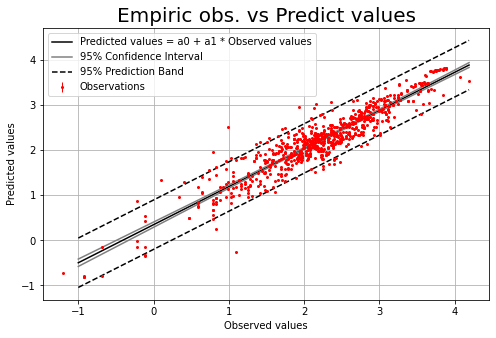

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.277, median - 0.279, CI - [0.264-0.29]

SHAP-values for: DBH_cm: mean - 0.029, median - 0.029, CI - [0.022-0.036]

SHAP-values for: H_m: mean - 0.267, median - 0.266, CI - [0.249-0.283]

SHAP-values for: Origin_ID: mean - 0.013, median - 0.013, CI - [0.009-0.017]

SHAP-values for: Species_ID: mean - 0.321, median - 0.321, CI - [0.314-0.329]



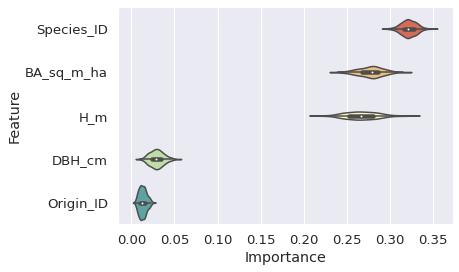

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 83.06, median: 79.5,
 pred. interval (P(0.025)-P(0.975)): 39.0-153.05, 
 conf. interval (p-value=0.95): 53.671-115.797 
***
Aggregate bias statistic: 
 mean: 0.0, median: 0.002,
 pred. interval (P(0.025)-P(0.975)): -0.047-0.045, 
 conf. interval (p-value=0.95): -0.023-0.023 
***
Aggregate RMSE statistic: 
 mean: 0.305, median: 0.307, pred. interval (P(0.025)-P(0.975)): 0.259-0.354, 
 conf. interval (p-value=0.95): 0.282-0.327 
***
Aggregate MSE statistic: 
 mean: 0.094, median: 0.094, pred. interval (P(0.025)-P(0.975)): 0.067-0.125, 
 conf. interval (p-value=0.95): 0.08-0.107 
***
Aggregate R^2 statistic: 
 mean: 0.854, median: 0.856, pred. interval (P(0.025)-P(0.975)): 0.785-0.9, 
 conf. interval (p-value=0.95): 0.832-0.88 
***
Aggregate bias(%) statistic: 
 mean: 0.025, median: 0.002, pred. interval (P(0.025)-P(0.975)): -2.15-2.085, 
 conf. interval (p-value=0.95): -1.042-1.041 
*

# ***Creating final XGBoost model using all obs. for its training***

In [29]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [30]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [31]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])

# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.67509
[1]	validation_0-rmse:1.49177
[2]	validation_0-rmse:1.33156
[3]	validation_0-rmse:1.18787
[4]	validation_0-rmse:1.06277
[5]	validation_0-rmse:0.95527
[6]	validation_0-rmse:0.86096
[7]	validation_0-rmse:0.77472
[8]	validation_0-rmse:0.69958
[9]	validation_0-rmse:0.63491
[10]	validation_0-rmse:0.58200
[11]	validation_0-rmse:0.53591


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.49489
[13]	validation_0-rmse:0.45972
[14]	validation_0-rmse:0.43051
[15]	validation_0-rmse:0.40471
[16]	validation_0-rmse:0.38243
[17]	validation_0-rmse:0.36457
[18]	validation_0-rmse:0.35087
[19]	validation_0-rmse:0.33768
[20]	validation_0-rmse:0.32635
[21]	validation_0-rmse:0.31655
[22]	validation_0-rmse:0.30920
[23]	validation_0-rmse:0.30371
[24]	validation_0-rmse:0.29835
[25]	validation_0-rmse:0.29369
[26]	validation_0-rmse:0.28936
[27]	validation_0-rmse:0.28662
[28]	validation_0-rmse:0.28386
[29]	validation_0-rmse:0.28132
[30]	validation_0-rmse:0.28003
[31]	validation_0-rmse:0.27834
[32]	validation_0-rmse:0.27650
[33]	validation_0-rmse:0.27373
[34]	validation_0-rmse:0.27158
[35]	validation_0-rmse:0.27091
[36]	validation_0-rmse:0.26927
[37]	validation_0-rmse:0.26704
[38]	validation_0-rmse:0.26645
[39]	validation_0-rmse:0.26529
[40]	validation_0-rmse:0.26396
[41]	validation_0-rmse:0.26176
[42]	validation_0-rmse:0.26050
[43]	validation_0-rmse:0.25921
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [32]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [33]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

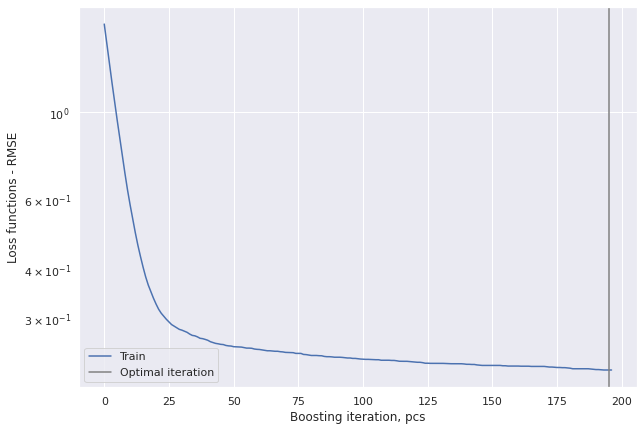

In [34]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [35]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.00
RMSE: 0.2
Relative RMSE(%):  10.078
MSE: 0.0
R square: 92.4%


In [36]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.925
Uncertainty
a0: 0.213+/-0.022
a1: 0.903+/-0.009


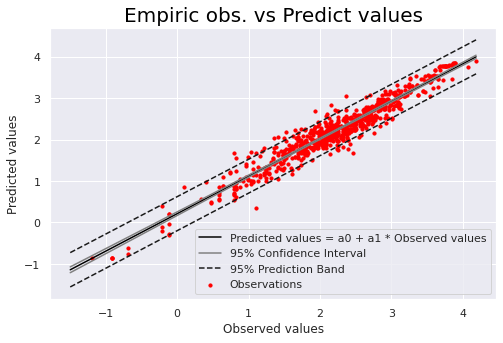

In [38]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

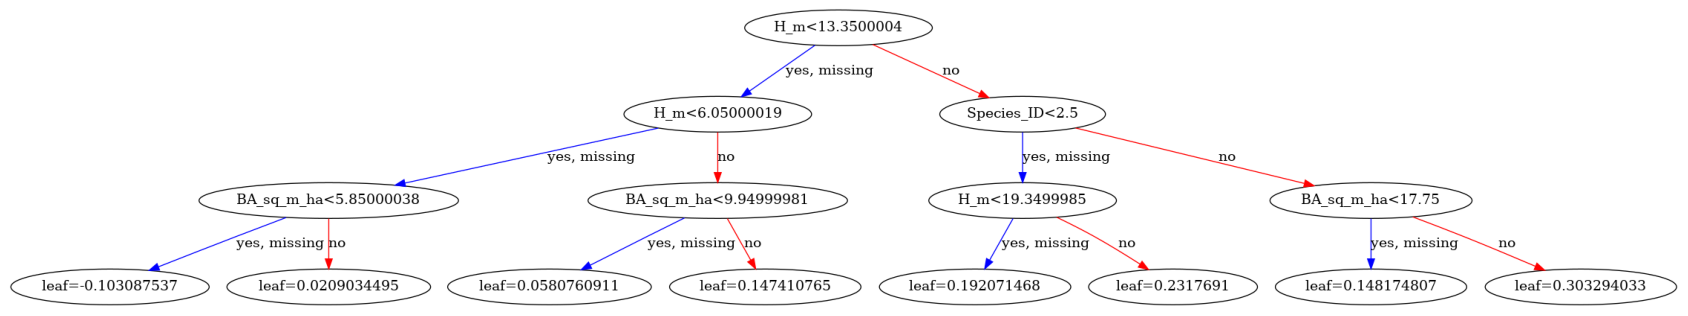

In [40]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

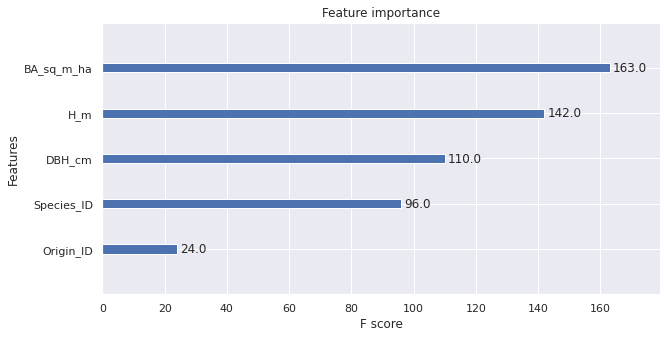

In [42]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

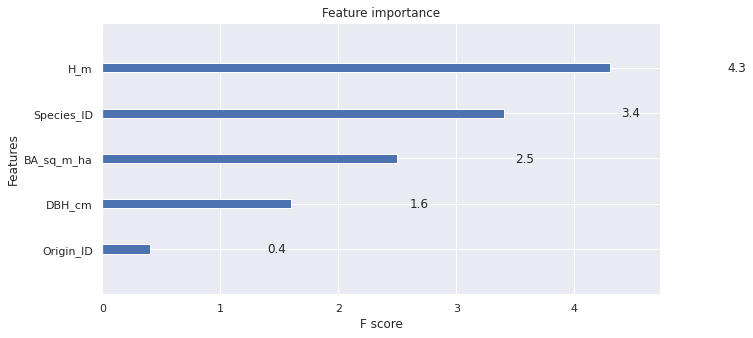

In [43]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

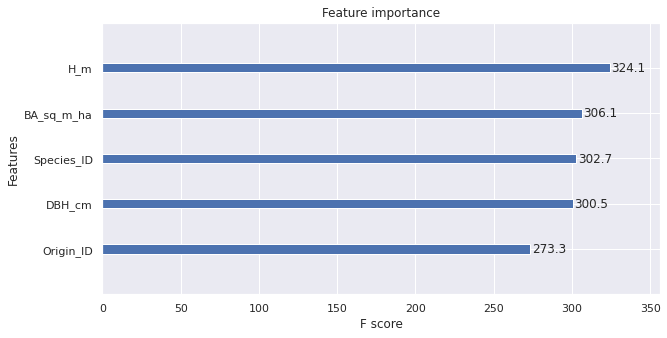

In [44]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [45]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


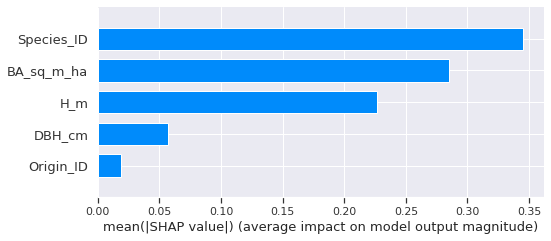

In [46]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

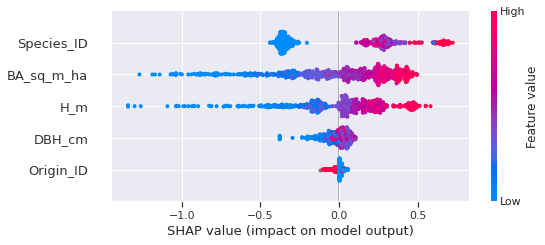

In [47]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

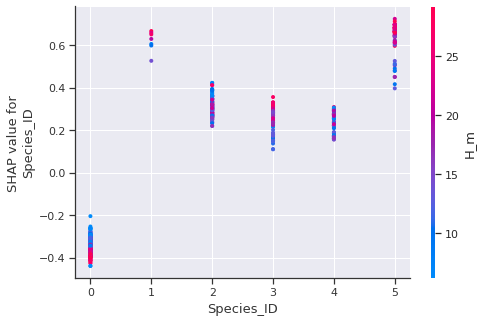

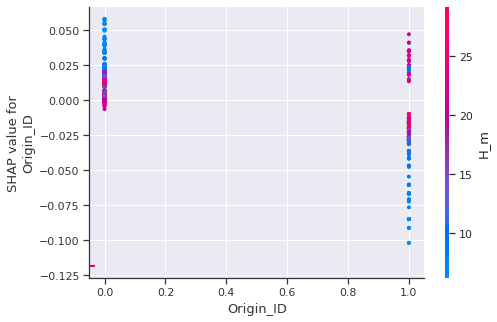

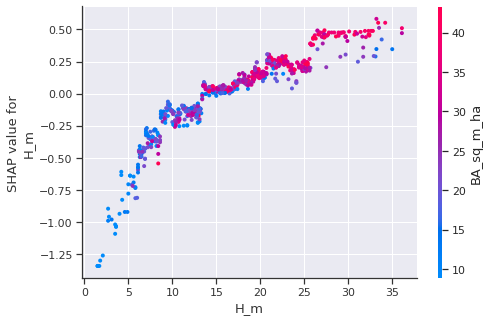

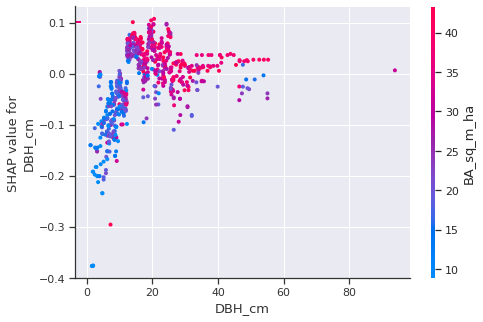

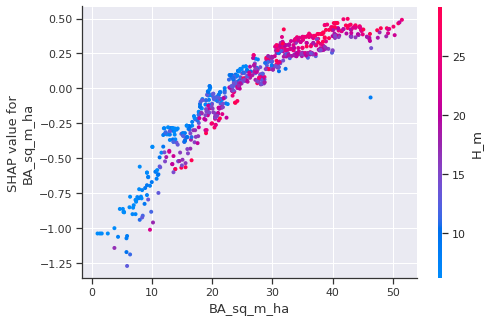

In [48]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [49]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_LN_M_stem_bark_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_LN_M_stem_bark_other_authors_XGB_model.txt")